In [1]:
suppressPackageStartupMessages({ 
    library(rgdal,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(ggmap,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(sp,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(maptools,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(viridis,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(magrittr,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(scales,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(gridExtra,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(data.table, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(tidyverse, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(lubridate, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(gridExtra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(tfplot, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(tsfa, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(factoextra, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(cluster, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(IRdisplay, warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(foreign,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(extrafont,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(showtext,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
    library(grid,warn.conflicts = FALSE, quietly = TRUE, verbose = FALSE)
})
# 라이브러리 로딩. suppressPackageStartupMessages 썼는데 왜 메시지 뜨는것일까...

Warning message:
"package 'rgdal' was built under R version 4.0.3"
Warning message:
"package 'sp' was built under R version 4.0.3"
Warning message:
"package 'ggmap' was built under R version 4.0.3"
Warning message:
"package 'maptools' was built under R version 4.0.3"
Warning message:
"package 'viridis' was built under R version 4.0.3"
Warning message:
"package 'magrittr' was built under R version 4.0.3"
Warning message:
"package 'scales' was built under R version 4.0.3"
Warning message:
"package 'gridExtra' was built under R version 4.0.3"
Warning message:
"package 'data.table' was built under R version 4.0.3"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
Warning message:
"package 'lubridate' was built under R version 4.0.3"
Warning message:
"package 'factoextra' was built under R version 4.0.3"
Warning message:
"package 'tfplot' was built under R version 4.0.3"
Warning message:
"package 'tframe' was built under R version 4.0.3"
Warning message:
"package 'tsfa'

In [172]:
options(repr.plot.width=6, repr.plot.height=4)
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }
set_plot_dimensions(15, 15) # 그래프 창 사이즈 좀 크게

In [2]:
getwd()

[1] "C:/Users/HAPPY/Desktop/KT_data_20200717"

# 지역별 확진자 시각화 해석


In [3]:
# 한국 지도 데이터 가져옴 http://www.gisdeveloper.co.kr/?p=2332
korea_map_shp = rgdal::readOGR("C:/Users/HAPPY/Desktop/KT_data_20200717/지도/CTPRVN.shp")
korea_map = fortify(korea_map_shp) # fortify로 데이터 프레임 화

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
"Discarded datum International_Terrestrial_Reference_Frame_2000 in CRS definition: +proj=tmerc +lat_0=38 +lon_0=127.5 +k=0.9996 +x_0=1000000 +y_0=2000000 +ellps=GRS80 +units=m +no_defs"


OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\HAPPY\Desktop\KT_data_20200717\지도\CTPRVN.shp", layer: "CTPRVN"
with 17 features
It has 3 fields


Regions defined for each Polygons



In [4]:
korea_map %>% str() # 데이터 구조 보기

'data.frame':	811814 obs. of  7 variables:
 $ long : num  966987 966987 966961 966931 966902 ...
 $ lat  : num  1941111 1941111 1941130 1941165 1941188 ...
 $ order: int  1 2 3 4 5 6 7 8 9 10 ...
 $ hole : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ piece: Factor w/ 2222 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id   : chr  "0" "0" "0" "0" ...
 $ group: Factor w/ 4724 levels "0.1","1.1","1.2",..: 1 1 1 1 1 1 1 1 1 1 ...


In [13]:
korea_map # 지역이 문자열이 아니라 id로 되어있다. 0이 서울 16이 제주도

long,lat,order,hole,piece,id,group
<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>
966987.2,1941111,1,FALSE,1,0,0.1
966987.1,1941111,2,FALSE,1,0,0.1
966961.3,1941130,3,FALSE,1,0,0.1
966930.6,1941165,4,FALSE,1,0,0.1
966902.1,1941188,5,FALSE,1,0,0.1
966886.0,1941201,6,FALSE,1,0,0.1
966873.3,1941210,7,FALSE,1,0,0.1
966868.1,1941214,8,FALSE,1,0,0.1
966867.1,1941215,9,FALSE,1,0,0.1


In [5]:
TimeProvince <-fread('COVID_19/TimeProvince.csv',
                     stringsAsFactors=FALSE, 
                     encoding = "UTF-8")


In [6]:
TimeProvince

date,time,province,confirmed,released,deceased
<date>,<int>,<chr>,<int>,<int>,<int>
2020-01-20,16,서울,0,0,0
2020-01-20,16,부산,0,0,0
2020-01-20,16,대구,0,0,0
2020-01-20,16,인천,1,0,0
2020-01-20,16,광주,0,0,0
2020-01-20,16,대전,0,0,0
2020-01-20,16,울산,0,0,0
2020-01-20,16,세종,0,0,0
2020-01-20,16,경기도,0,0,0


In [7]:
TimeProvince$date <- as.Date(TimeProvince$date)
TimeProvince$date <- as.character(TimeProvince$date,'%m/%d') # 년 데이터 제거, 월과 일만 남기고 문자열로
TimeProvince$province=TimeProvince$province %>% as.factor() # province 팩터로


In [8]:
TimeProvince

date,time,province,confirmed,released,deceased
<chr>,<int>,<fct>,<int>,<int>,<int>
01/20,16,서울,0,0,0
01/20,16,부산,0,0,0
01/20,16,대구,0,0,0
01/20,16,인천,1,0,0
01/20,16,광주,0,0,0
01/20,16,대전,0,0,0
01/20,16,울산,0,0,0
01/20,16,세종,0,0,0
01/20,16,경기도,0,0,0


In [9]:
# 지역별로 묶어 요약
confirm_added=TimeProvince %>%
  group_by(province)%>% 
  summarize(N=max(confirmed))

`summarise()` ungrouping output (override with `.groups` argument)



In [10]:
confirm_added

province,N
<fct>,<int>
강원도,65
경기도,1207
경상남도,134
경상북도,1389
광주,44
대구,6906
대전,117
부산,154
서울,1312


In [11]:
# 지역을 숫자로 바꿔서 다루자
confirm_added$province=plyr::revalue(confirm_added$province,c("서울"="0","부산"="1","대구"="2",
                                                              "인천"="3","광주"="4","대전"="5",
                                                              "울산"="6","세종"="7","경기도"="8",
                                                              "강원도"="9","충청북도"="10","충청남도"="11",
                                                              "전라북도"="12","전라남도"="13","경상북도"="14",
                                                              "경상남도"="15","제주도"="16"))
colnames(confirm_added)<-c("id","confirmed") # 변수 명을 id로 바꿈, 이건 지도 데이터와 맞춰주기 위해

In [12]:
confirm_added

id,confirmed
<fct>,<int>
9,65
8,1207
15,134
14,1389
4,44
2,6906
5,117
1,154
0,1312


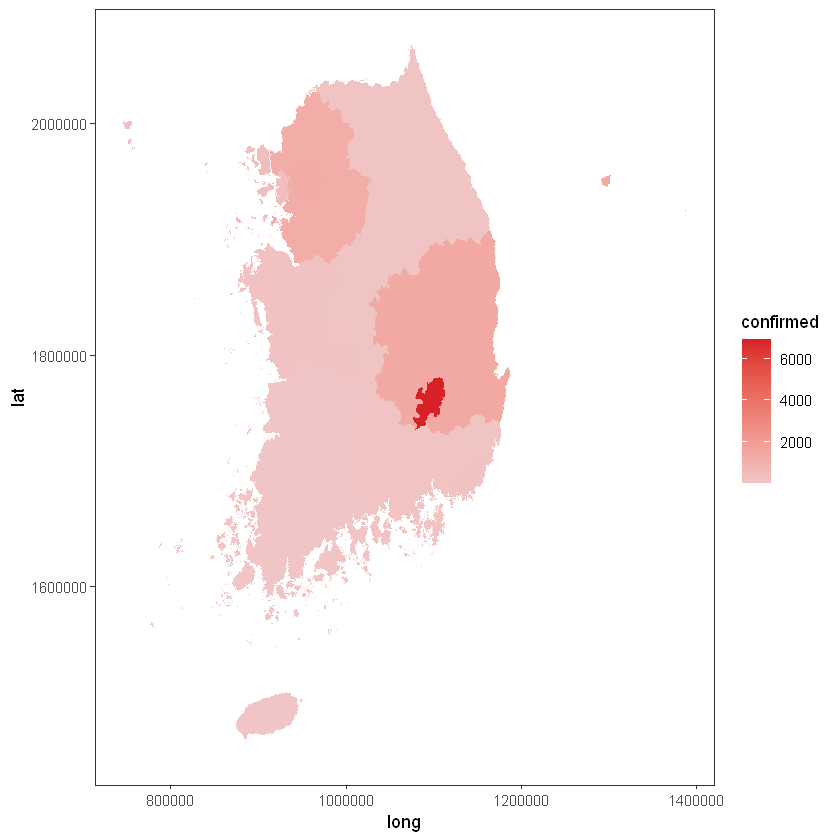

In [14]:
# 지도 데이터와 확진자 수 데이터를 해당하는 지역에 알맞게 병합하고, 지도에 나타내 줍니다.

korea_map=merge(korea_map,confirm_added, by="id") #머지시킴, 확진자 데이터를 추가한 것임

mycorona=ggplot() + geom_polygon(data=korea_map, aes(x=long, y=lat, group=group, fill=confirmed))

mycorona+scale_fill_gradient(low = "#F1C5C5", high = "#D92027")+ 
  theme_bw() +
  theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
        panel.grid.major.y = element_blank(), panel.grid.minor.y = element_blank(), 
        plot.title = element_text(face = "bold", size = 18, hjust = 0.5))

# 나이대별,성별 확진자 시각화 해석

In [17]:
#전처리

age <- fread('COVID_19/TimeAge.csv',
             stringsAsFactors=FALSE,
             data.table=FALSE,
             encoding = "UTF-8")
age <- age[age$date == '2020-06-30',] 
age <- age[c(3:7),]

In [18]:
age

,date,time,age,confirmed,deceased
,<date>,<int>,<chr>,<int>,<int>
1083,2020-06-30,0,20s,3362,0
1084,2020-06-30,0,30s,1496,2
1085,2020-06-30,0,40s,1681,3
1086,2020-06-30,0,50s,2286,15
1087,2020-06-30,0,60s,1668,41


In [23]:
# 파이 차트로 나이대별 확진자 수 보기

c <-ggplot(age, aes(x = "", y = confirmed, fill = age)) + 
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  geom_text(aes(label = paste0(age,"\n",round(confirmed/128,1),"%")),#각 조각에는 나이대, 확진자 %들어감
           position = position_stack(vjust = 0.5),color = "white") + # 텍스트 위치, 색깔
  scale_fill_manual(values = c("#CD0000","#F06E6E","#D25A5A","#CD4646","#FF7878","#F4A0A0","#FA8282")) +
  theme_void()   +
  theme(text =element_text(face = "bold"))

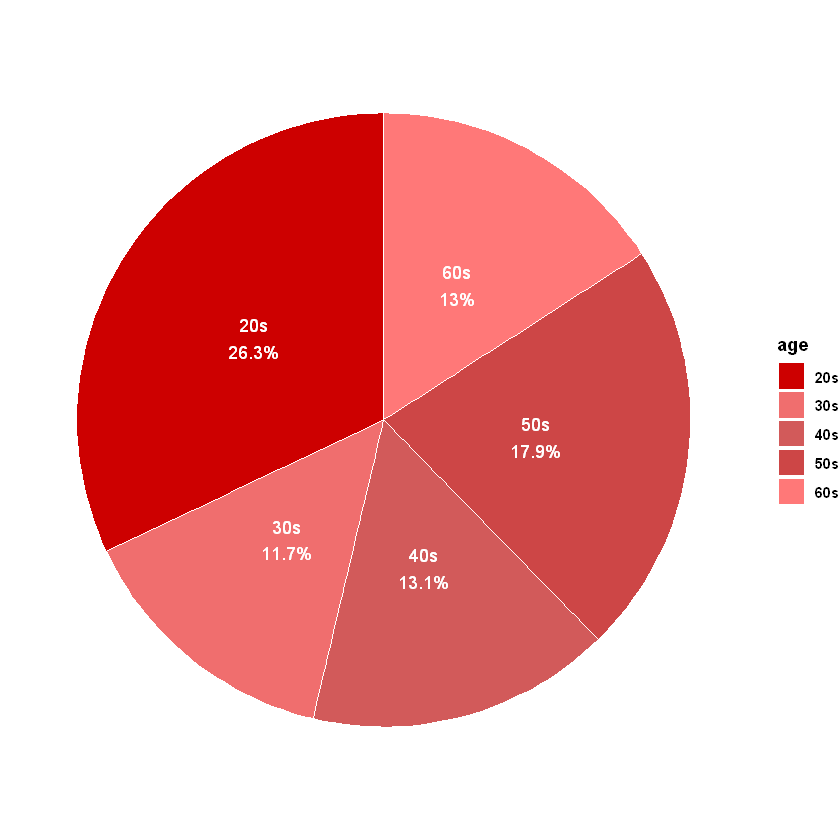

In [24]:
c

In [25]:
# 성별


gender <- fread('COVID_19/TimeGender.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")

gender <- gender[gender$date == '2020-06-30',]

In [27]:
d <-ggplot(gender, aes(x = "", y = confirmed, fill = sex)) + 
  geom_bar(width = 1, stat = "identity", color = "white") +
  coord_polar("y") +
  geom_text(aes(label = paste0(sex,"\n",round(confirmed/128,1),"%")), 
           position = position_stack(vjust = 0.5),color = "white") +
  scale_fill_manual(values = c("#45556b","#637a9a")) +
  theme_void() +theme(text =element_text(face = "bold"))


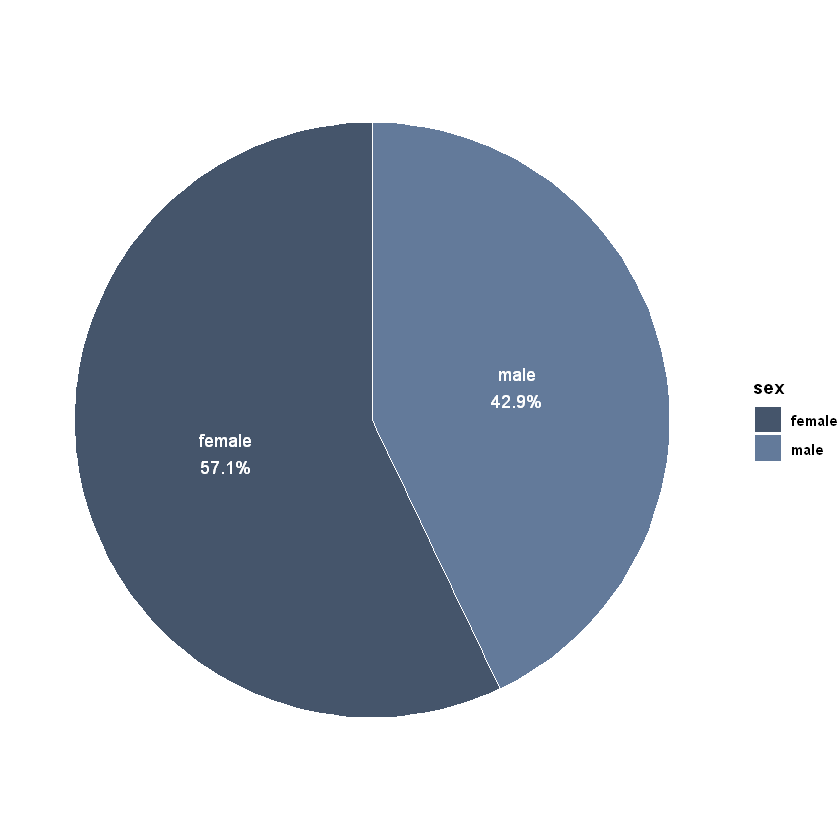

In [28]:
d

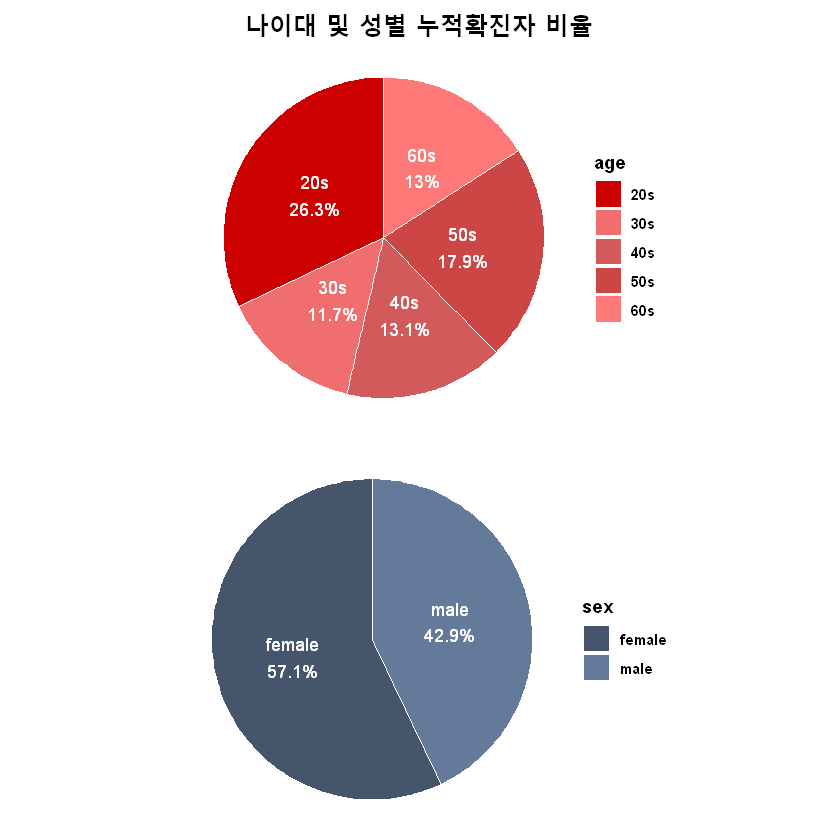

In [29]:

grid.arrange(c,d, nrow=2, top = textGrob("나이대 및 성별 누적확진자 비율",gp=gpar(fontsize=20,font=2)))  


# 실확진자 추이 시각화

In [31]:
##### 전처리
Time <-fread('COVID_19/Time.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
Time$date <- as.Date(Time$date)
str(Time)
Time

'data.frame':	163 obs. of  7 variables:
 $ date     : Date, format: "2020-01-20" "2020-01-21" ...
 $ time     : int  16 16 16 16 16 16 16 16 16 16 ...
 $ test     : int  1 1 4 22 27 27 51 61 116 187 ...
 $ negative : int  0 0 3 21 25 25 47 56 97 155 ...
 $ confirmed: int  1 1 1 1 2 2 3 4 4 4 ...
 $ released : int  0 0 0 0 0 0 0 0 0 0 ...
 $ deceased : int  0 0 0 0 0 0 0 0 0 0 ...


date,time,test,negative,confirmed,released,deceased
<date>,<int>,<int>,<int>,<int>,<int>,<int>
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0
2020-01-25,16,27,25,2,0,0
2020-01-26,16,51,47,3,0,0
2020-01-27,16,61,56,4,0,0
2020-01-28,16,116,97,4,0,0


In [35]:
# 일별 추가 확진자 보기
c <- c(rep(0,163))
c[1] <- 1
for (i in 2:length(Time$confirmed)){
  if (Time$confirmed[i] - Time$confirmed[i-1] > 0) {
    c[i] <- Time$confirmed[i] - Time$confirmed[i-1]
  }else{
    c[i] <- 0
  }
}


In [36]:
c

[1]   1   0   0   0   1   0   1   1   0   0   2   5   1   3   0   1   2   5
 [19]   1   0   3   0   1   0   0   0   0   1   1   1  20  53 100 229 169 231
 [37] 144 284 505 571 813 586 476 600 516 438 518 483 367 248 131 242 114 110
 [55] 107  40 110  84  93 152  87 147  98  64  76 100 104  91 146 105  78 125
 [73] 101  89  86  94  81  47  47  53  39  27  30  32  25  27  27  22  22  18
 [91]   8  13   9  11   8   6  10  10  10  14   9   4   9   6  13   8   3   2
[109]   4  12  18  34  35  27  26  29  27  19  13  15  13  32  12  20  23  25
[127]  16  19  40  79  58  39  27  35  38  49  39  39  51  57  38  38  50  45
[145]  56  48  34  36  34  43  59  49  67  48  17  46  51  28  39  51  62  42
[163]  43

In [37]:

Time <- cbind(Time, c)

Warning message:
"Use of `Time$date` is discouraged. Use `date` instead."
Warning message:
"Use of `Time$c` is discouraged. Use `c` instead."
Warning message:
"Use of `Time$date` is discouraged. Use `date` instead."


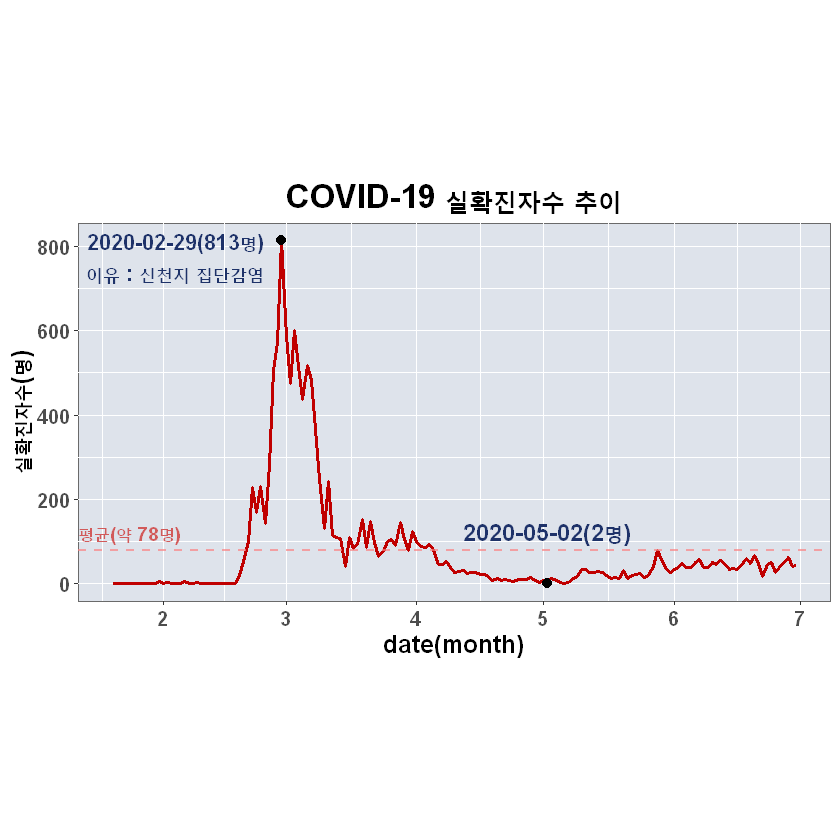

In [38]:
# 그래프 그리기
ggplot(Time, aes(x =date, y = `c`)) 
+ geom_line(color='#c00000', size = 0.9) 
+ coord_fixed(ratio = 0.1)
+theme(panel.background = element_rect(fill = "#dee3eb" , color = "#6a6a6a"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),panel.grid.major = element_line(color = "white"),
      plot.title = element_text(face = "bold",hjust = 0.5, size =20),text =element_text(face = "bold", size =15)) +

 ggtitle("COVID-19 실확진자수 추이") +  xlab("date(month)") + ylab("실확진자수(명)")+

 geom_point(mapping =aes(x =Time$date[which.max(Time$`c`)] ,y = 813 ), color="black", size =2.5)+ # 가장 많은 곳 찍기

 annotate("text", x=Time$date[which.max(Time$`c`)], y=813,fontface=2,label="\n2020-02-29(813명)\n이유 : 신천지 집단감염"
          ,hjust = 1.1, size = 4.6 , color = "#1E3269") + # 가장 많은 곳에 이유 표시
 
 geom_point(mapping =aes(x =Time$date[104] ,y = 2 ), color="black", size =2.5) + # 가장 적은 곳

 annotate("text", x=Time$date[104], y=2, label="2020-05-02(2명)\n\n\n", size = 5 ,fontface=2, color = "#1E3269") +

 geom_hline(yintercept=78.53, linetype='dashed', color='#FA8282', size=0.7,alpha = 0.7)+ #평균 선

 annotate("text", x=Time$date[5], y=120, label="평균(약 78명)", size = 4 , fontface=2, color = "#D25A5A")

# 유동인구 추이 시각화

In [47]:
#1. fpopl data 를 주별 유동인구 평균 데이터로 전처리
fpopl <-fread('fpopl.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
fpopl %<>% select(base_ymd,adstrd_code,popltn_cascnt) 
code <-fread('adstrd_master.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
code %<>% select(adstrd_code,signgu_nm)


In [52]:
fpopl
code

base_ymd,adstrd_code,popltn_cascnt
<int>,<int>,<int>
20200101,11650560,15
20200101,11590620,6
20200101,11560710,4
20200101,11470680,12
20200101,11350665,6
20200101,11305575,10
20200101,11290725,12
20200101,11740540,12
20200101,11680600,16


adstrd_code,signgu_nm
<dbl>,<chr>
11110515,종로구
11110530,종로구
11110540,종로구
11110550,종로구
11110560,종로구
11110570,종로구
11110580,종로구
11110600,종로구
11110615,종로구


In [53]:
doraga <- left_join(fpopl,code,by="adstrd_code")
doraga %<>% select(-adstrd_code)
doraga$base_ymd <- as.character(doraga$base_ymd)
doraga$base_ymd <- as.Date(doraga$base_ymd,"%Y%m%d")
doraga$base_ymd <- week(doraga$base_ymd)
doraga

base_ymd,popltn_cascnt,signgu_nm
<dbl>,<int>,<chr>
1,15,서초구
1,6,동작구
1,4,영등포구
1,12,양천구
1,6,노원구
1,10,강북구
1,12,성북구
1,12,강동구
1,16,강남구


In [54]:

week <- c(1:24)
fpopl_mean <- c(rep(0,24))
df <- data.frame(week,fpopl_mean)

In [55]:
for (i in 1:24){
  a <- doraga %>% filter(base_ymd == i) %>% summarise(n=mean(popltn_cascnt))
  df$fpopl_mean[i] <- a$n
}

In [57]:
df # 주별 평균 유동인구

week,fpopl_mean
<int>,<dbl>
1,188.8481
2,201.6492
3,204.0180
4,178.4705
5,191.1058
6,188.4180
7,192.3606
8,184.3912
9,168.0411


# 전처리한 유동인구 데이터와 실확진자 수 비교를 위해time 데이터와 병합

In [59]:

Time$date <- week(Time$date)
Time %<>% group_by(date) %>% summarize(c_mean= mean(c)) %>% unique() # 주별 실확진자 수
colnames(Time) <- c("week","c_mean")

time_fpopl <- plyr::join(Time, df, by = "week")
time_fpopl <- time_fpopl[time_fpopl$week <= 24,] 

`summarise()` ungrouping output (override with `.groups` argument)



In [62]:
time_fpopl

,week,c_mean,fpopl_mean
,<dbl>,<dbl>,<dbl>
1,3,0.5000000,204.0180
2,4,0.4285714,178.4705
3,5,1.7142857,191.1058
4,6,1.7142857,188.4180
5,7,0.4285714,192.3606
6,8,135.1428571,184.3912
7,9,547.8571429,168.0411
8,10,385.8571429,169.5604
9,11,115.2857143,170.9601


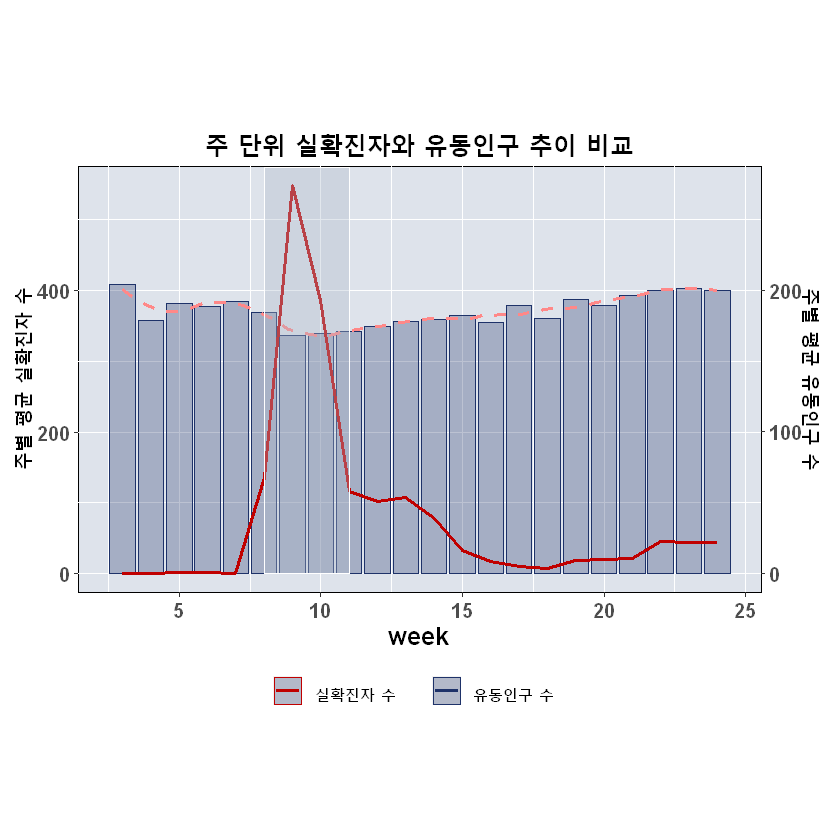

In [67]:
period <-data.frame(시기 = c("2"),start =c(8), end=c(11))
ggplot() +
  geom_bar(data=time_fpopl, aes(x = week, y = fpopl_mean*2 ,color = "유동인구 수") # 유동인구는 막대로
           ,fill = '#1E3269',alpha= 0.3,stat ="identity", position="dodge")+ 

  ylab("명") +
  geom_smooth(data=time_fpopl, aes(x = week, y = fpopl_mean*2)
                         ,method = 'loess', formula ='y ~ x',span = 0.3, color = "#ff8888",size = 0.9,se =F, linetype= "dashed")+

  geom_line(data=time_fpopl, aes(x = week, y = c_mean, color = "실확진자 수"),size =0.9)+ # 실 확진자 수는 선으로

  scale_colour_manual("", values=c("실확진자 수" = "#c00000", "유동인구 수" = "#1E3269"))  + coord_fixed(ratio = 0.025) +

  theme(panel.background = element_rect(fill = "#dee3eb" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid")
        ,legend.position="bottom", plot.title = element_text(face = "bold",hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5, size =15)) +

  ggtitle("주 단위 실확진자와 유동인구 추이 비교")+

  scale_y_continuous(
    
    # Features of the first axis
    name = "주별 평균 실확진자 수",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2, name="주별 평균 유동인구 수"))+

 geom_rect(data=period, aes(NULL,NULL,xmin=start,xmax=end),fill="#adb9ca",
            ymin=0,ymax=573, colour="white", size=0.5, alpha=0.35)

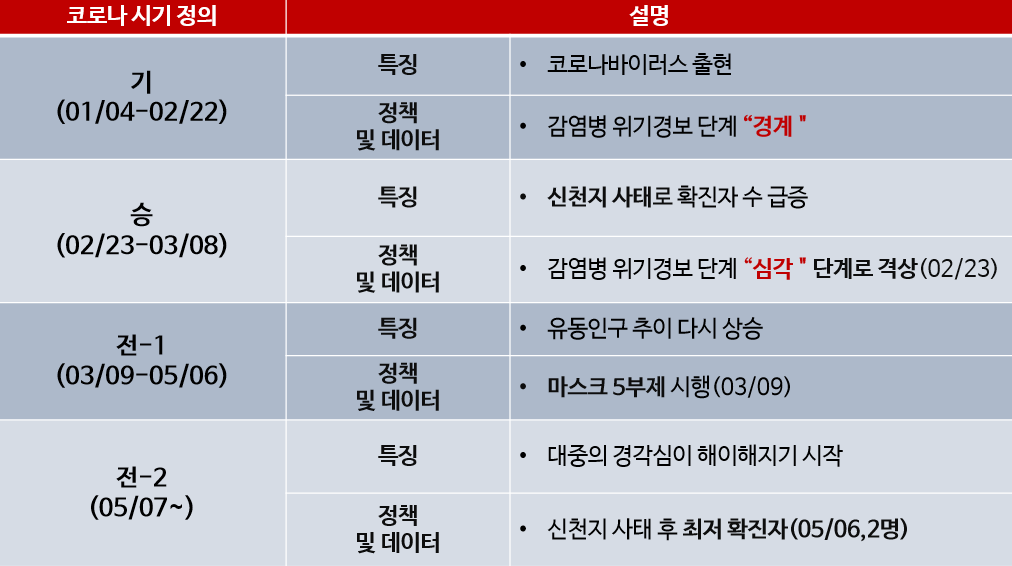

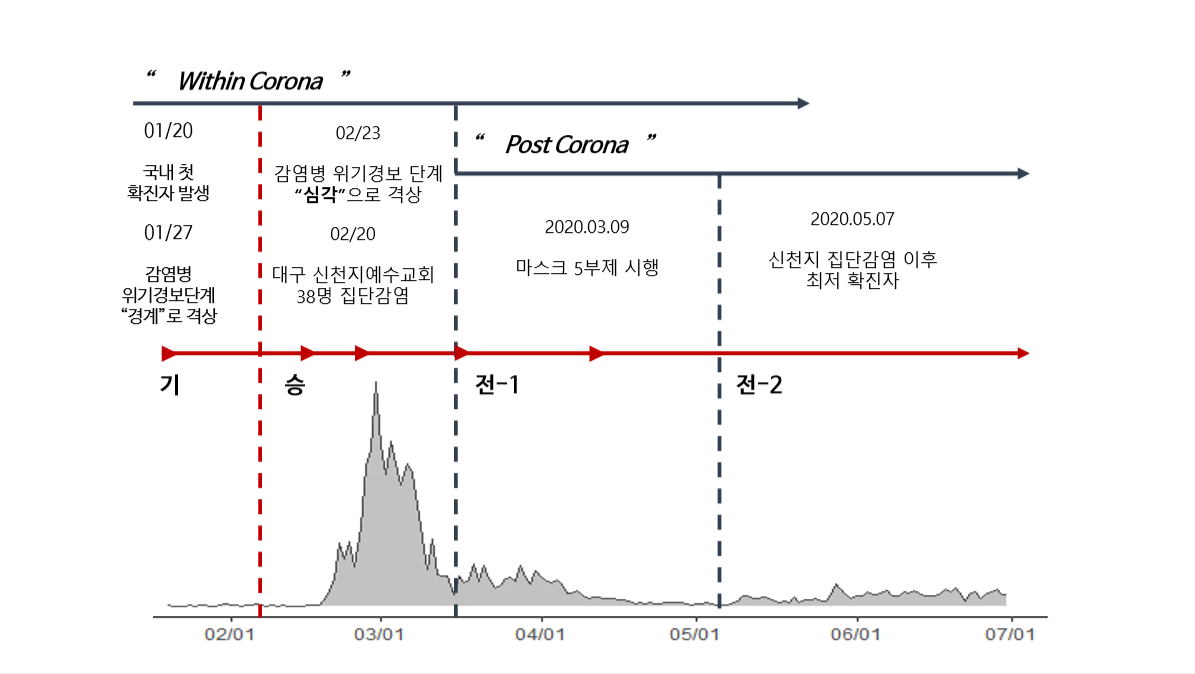

# Delivery data로 유망 산업 살펴보기


In [68]:
########################
### Delivery 전처리 ###
#######################
delivery <- fread('delivery.csv', 
                  header = T, 
                  stringsAsFactors = F, 
                  data.table = F, 
                  encoding = 'UTF-8'
                  )

Warning message in require_bit64_if_needed(ans):
"Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again."


In [71]:
delivery

SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
<int>,<date>,<chr>,<int>,<chr>,<chr>,<chr>,<int64>,<chr>,<chr>,...,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,2.377795e-314,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,
4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,2.036050e-314,경기도,광명시,...,D0003269,4800,200,49000,2,,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,
4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,5.622518e-315,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,
4577989,2020-01-01,C000029,1,C000043,S0039634,한식,2.033085e-314,경기도,의정부시,...,D0005061,4500,300,20000,2,,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,
4577991,2020-01-01,C000130,1,C000130,S0002237,한식,2.039559e-314,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,
4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,2.035062e-314,경기도,부천시,...,D0004834,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,
4577994,2020-01-01,C000049,1,C000049,S0022461,분식,5.696630e-315,서울특별시,구로구,...,D0004461,3800,300,28000,2,,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,
4577995,2020-01-01,C000238,1,C000238,S0001037,야식,2.035061e-314,경기도,부천시,...,D0004936,3500,200,28500,2,,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,
4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,5.711465e-315,서울특별시,영등포구,...,D0006259,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,


In [69]:
# 필요없는 데이터 열
code = delivery %>% select(ends_with('code')) %>% colnames()
code

[1] "DLVR_STORE_LEGALDONG_CODE" "DLVR_STORE_ADSTRD_CODE"   
[3] "DLVR_STORE_RDNMADR_CODE"   "DLVR_DSTN_LEGALDONG_CODE" 
[5] "DLVR_DSTN_ADSTRD_CODE"     "DLVR_DSTN_RDNMADR_CODE"

In [70]:
# 필요없는 열
id = c('SERIAL_NUMBER', colnames(select(delivery, ends_with('ID'))))
id

[1] "SERIAL_NUMBER"       "DLVR_RQESTER_ID"     "DLVR_RCEPT_CMPNY_ID"
[4] "DLVR_STORE_ID"       "DLVR_MAN_ID"

In [72]:
delivery = delivery %>% select(-c(code, id)) # 제외하기
delivery = delivery %>% separate(PROCESS_DT, sep = '-', into = c('year', 'month', 'day'), remove = FALSE) # 년월일 구분

Note: Using an external vector in selections is ambiguous.
i Use `all_of(code)` instead of `code` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.

Note: Using an external vector in selections is ambiguous.
i Use `all_of(id)` instead of `id` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [73]:
rm(list = c('code', 'id'))

In [74]:
delivery

PROCESS_DT,year,month,day,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,...,DLVR_DSTN_RI,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
<date>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2020-01-01,2020,01,01,1,치킨,경상남도,창원시 마산회원구,합성동,,...,,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,
2020-01-01,2020,01,01,1,찜탕,경기도,광명시,철산동,,...,,4800,200,49000,2,,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,
2020-01-01,2020,01,01,1,치킨,서울특별시,은평구,갈현동,,...,,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,
2020-01-01,2020,01,01,1,한식,경기도,의정부시,의정부동,,...,,4500,300,20000,2,,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,
2020-01-01,2020,01,01,1,한식,경기도,고양시 덕양구,행신동,,...,,6500,300,32000,2,,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,
2020-01-01,2020,01,01,1,족발/보쌈,경기도,부천시,중동,,...,,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,
2020-01-01,2020,01,01,1,분식,서울특별시,구로구,오류동,,...,,3800,300,28000,2,,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,
2020-01-01,2020,01,01,1,야식,경기도,부천시,심곡동,,...,,3500,200,28500,2,,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,
2020-01-01,2020,01,01,1,치킨,서울특별시,영등포구,대림동,,...,,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,


## 일자별 평균 배달 건수 및 매출 추이

In [76]:
index <- data.frame('period' = c('기', '승', '전-1', '전-2'),
                    'start' = c('2020-01-01', '2020-02-22', '2020-03-08', '2020-05-06'),
                    'end' = c('2020-02-22', '2020-03-08', '2020-05-06', '2020-06-21'))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



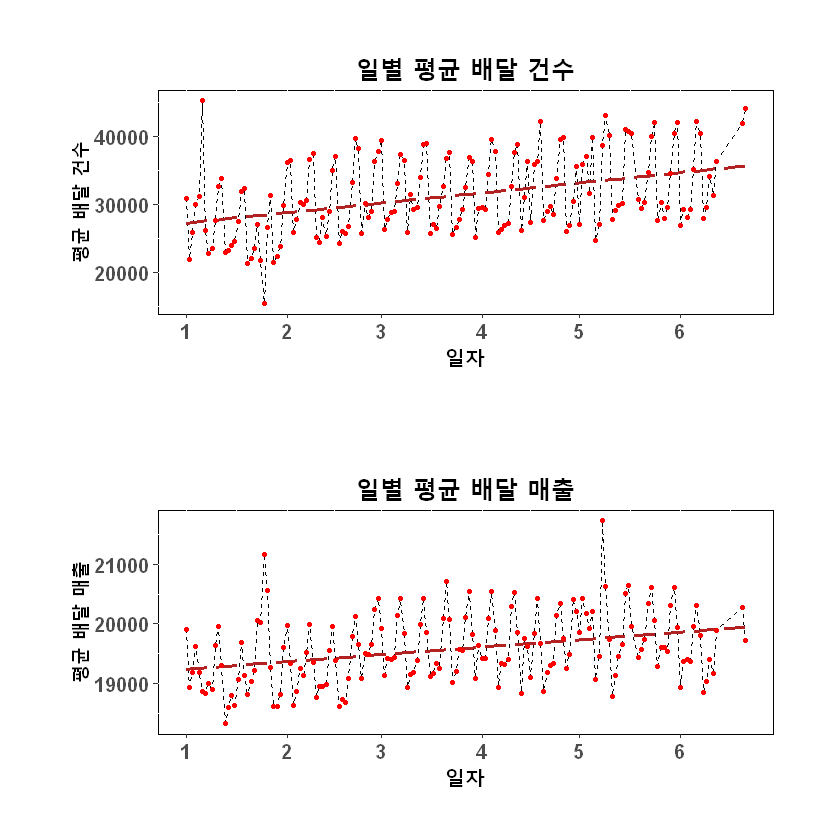

In [118]:
# 에러남

p1 <- delivery %>% group_by(PROCESS_DT) %>% 
  summarize(N = n()) %>% 
  ungroup() %>% 
  ggplot(aes(x = PROCESS_DT, y = N, group = 1)) + 
  geom_line(linetype = "dashed", color = 'black') + 
  geom_smooth(method = 'lm', se = FALSE, formula = y~x, color = 'firebrick', linetype = 'longdash') +
  geom_point(color = "red", size = 1) +
#   geom_rect(data = index,
#             aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
#             ymin = 0, ymax = 47000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  labs(x = "일자", y = '평균 배달 건수', title = '일별 평균 배달 건수', fill = '코로나 시기') +
#  scale_x_discrete(breaks = NULL) +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

p2 <- delivery %>% filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(PROCESS_DT) %>% 
  summarize(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  ggplot(aes(x = PROCESS_DT, y = MEAN, group = 1)) + 
  geom_line(linetype = "dashed", color = 'black') + 
  geom_smooth(method = 'lm', se = FALSE, formula = y~x, color = 'firebrick', linetype = 'longdash') +
  geom_point(color = "red", size = 1) +
#   geom_rect(data = index,
#             aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
#             ymin = 0, ymax = 45224, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  labs(x = "일자", y = '평균 배달 매출', title = '일별 평균 배달 매출', fill = '코로나 시기') +
#  scale_x_discrete(breaks = NULL) +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))
grid.arrange(p1, p2, ncol = 1)

## 코로나 심각 지역(서울, 경기도, 대구, 경상북도)와 그 외 지역 배달 건수 비교

In [119]:
delivery$bad = ifelse(delivery$DLVR_STORE_SIDO %in% c('경기도', '경상북도', '대구광역시', '서울'), 1, 0)
# 경기, 경북, 대구, 서울=1 vs  나머지 =0

`summarise()` regrouping output by 'PROCESS_DT' (override with `.groups` argument)



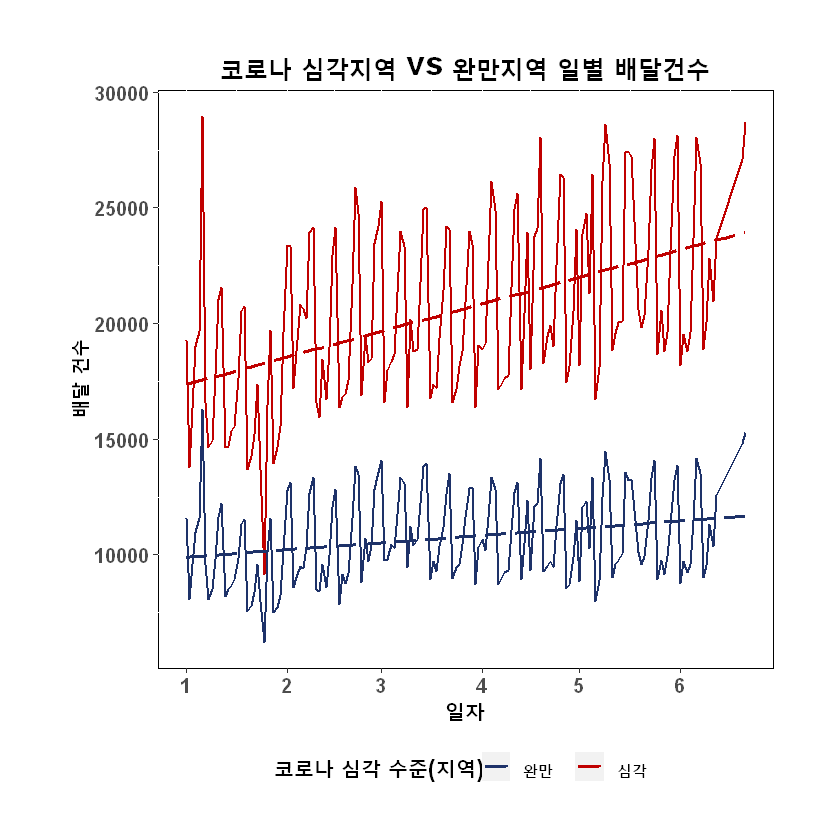

In [121]:
delivery %>% 
  group_by(PROCESS_DT, bad) %>% 
  summarize(N = n()) %>% 
  ungroup() %>%
  ggplot(aes(x = PROCESS_DT, y = N)) + 
  geom_line(aes(group = as.factor(bad), color = as.factor(bad)), size = 0.6) +
  geom_smooth(aes(group = as.factor(bad), color = as.factor(bad)), 
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
#   geom_rect(data = index,
#             aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
#             ymin = 0, ymax = 30000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5', '전-2' = '#adb9ca')) +
  scale_linetype_discrete('코로나 심각 수준(지역)', labels = c('완만', '심각'), aes(Color = as.factor(bad))) +
  scale_color_manual(labels = c('완만', '심각'),values=c( "#1E3269","#c00000")) +
#  scale_x_discrete(breaks = NULL) +
  labs(x = '일자', color = '코로나 심각 수준(지역)', y = '배달 건수', fill = '코로나 시기') +
  ggtitle('코로나 심각지역 vs 완만지역 일별 배달건수') +
  theme(legend.position = 'bottom', legend.box = 'vertical') + 
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

## 배달 품목별 건수를 통한 유망 품목 확인

In [111]:
month_index <- data.frame('period' = c('기', '승', '전-1'),
                          'start' = c('01', '02', '03'),
                          'end' = c('02', '03', '05'))

In [112]:

p1 <- delivery  %>% 
  filter(DLVR_REQUST_STTUS_VALUE == 1) %>% # 배달있는거만 뽑기
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% # 판매액=상품금액-배달료-세금?
  group_by(month, DLVR_STORE_INDUTY_NM) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>%
  filter(month != "06") %>% # 6월달의 경우 6월 21일까지 밖에 없어 제외하고 추세 확인
  mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0)) %>%  # 도시락, 심부름과 그 외로 구분할거
  ggplot(aes(x = month, y = MEAN)) +
  geom_smooth(aes(group = DLVR_STORE_INDUTY_NM, 
                  color= DLVR_STORE_INDUTY_NM, 
                  linetype = as.factor(NEW_cate), 
                  size = as.factor(NEW_cate)), method = 'lm', se = FALSE, formula = y~x) +
   geom_rect(data = month_index,
             aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
             ymin = 0, ymax = 33000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_linetype_manual(values=c("dashed", "solid"),labels = c('그외', '심부름&도시락'))+
  scale_size_manual(values = c(1, 1.1), guide = 'none') +
  guides(color = FALSE) +
  labs(x = '월', y = '평균 배달 매출', linetype = '매출 성장 추세', fill = '코로나 시기', color = '배달품목') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

`summarise()` regrouping output by 'month' (override with `.groups` argument)



In [113]:

p2 <- delivery  %>%
  filter(DLVR_REQUST_STTUS_VALUE == 1) %>% 
  mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% 
  group_by(month, DLVR_STORE_INDUTY_NM) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != "06") %>%
  filter(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락')) %>%  # 도시락, 심부름만 볼거임
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM)) +
  geom_point(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM) ,size = 1) + 
  geom_smooth(aes(group = DLVR_STORE_INDUTY_NM, color= DLVR_STORE_INDUTY_NM), 
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 30000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(values=c( "#1E3269","#c00000")) +
  labs(x = '월', y = '평균 배달 매출', fill = '코로나 시기', color = '배달품목') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


`summarise()` regrouping output by 'month' (override with `.groups` argument)



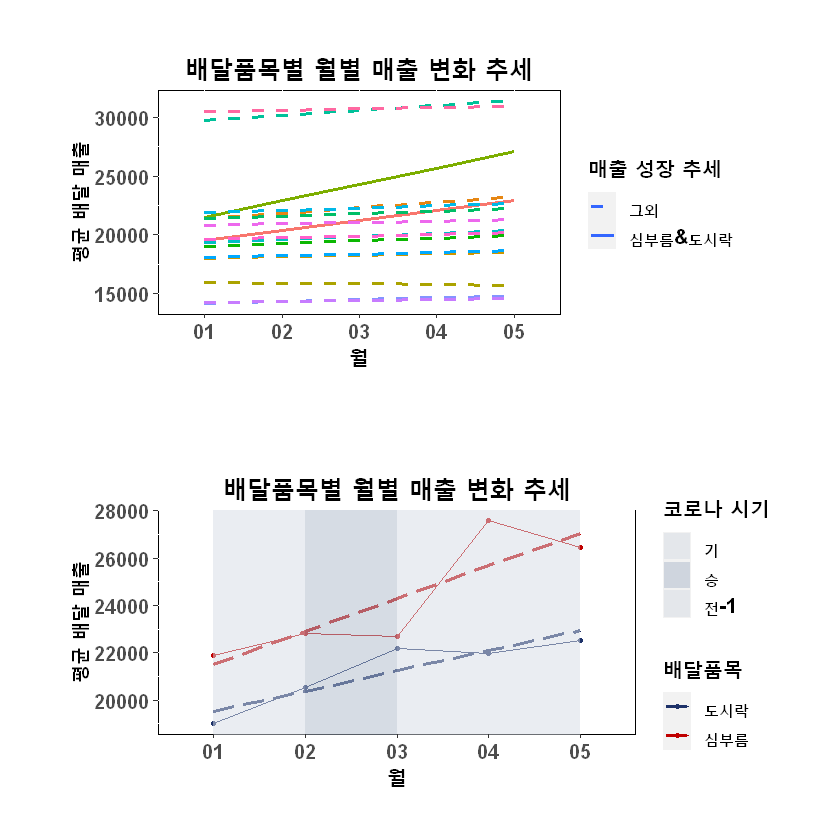

In [116]:
grid.arrange(p1, p2, ncol = 1)

### 도시락,심부름 vs 그외품목 : 월별 건수>% mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>% mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0))

In [132]:
delivery=delivery %>% mutate('SELL_AMOUNT' = GOODS_AMOUNT - DLVR_AMOUNT - CALL_RLAY_FEE_AMOUNT) %>%
mutate('NEW_cate' = ifelse(DLVR_STORE_INDUTY_NM %in% c('심부름', '도시락') , 1, 0))

p1 <- delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(SELL_AMOUNT)) %>% 
  ungroup() %>% 
  filter(month != "06") %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate))) +
  geom_point(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)), size = 1) +
  geom_smooth(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)),
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 33000, alpha=0.5) + 
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(labels = c('그외', '심부름&도시락'), values=c( "#1E3269","#c00000")) +
  labs(x = '월', color = '배달품목', y = '월별 평균 배달 매출', fill = '코로나 시기') +
  ggtitle('배달품목별 월별 매출 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))

`summarise()` regrouping output by 'month' (override with `.groups` argument)



In [133]:
p2 <- delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(n())) %>%
  ungroup() %>%
  filter(month != "06") %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate))) +
  geom_point(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)), size = 1) +
  geom_smooth(aes(group = as.factor(NEW_cate), color = as.factor(NEW_cate)),
              method = 'lm', se = FALSE, formula = y~x, linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = -1000000, ymax = 1200000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  scale_color_manual(labels = c('그외', '심부름&도시락'), values=c( "#1E3269","#c00000")) +
  labs(x = '월', color = '배달품목', y = '월별 배달 건수', fill = '코로나 시기') +
  ggtitle('배달품목별 월별 건수 변화 추세') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,40,30,40))


`summarise()` regrouping output by 'month' (override with `.groups` argument)



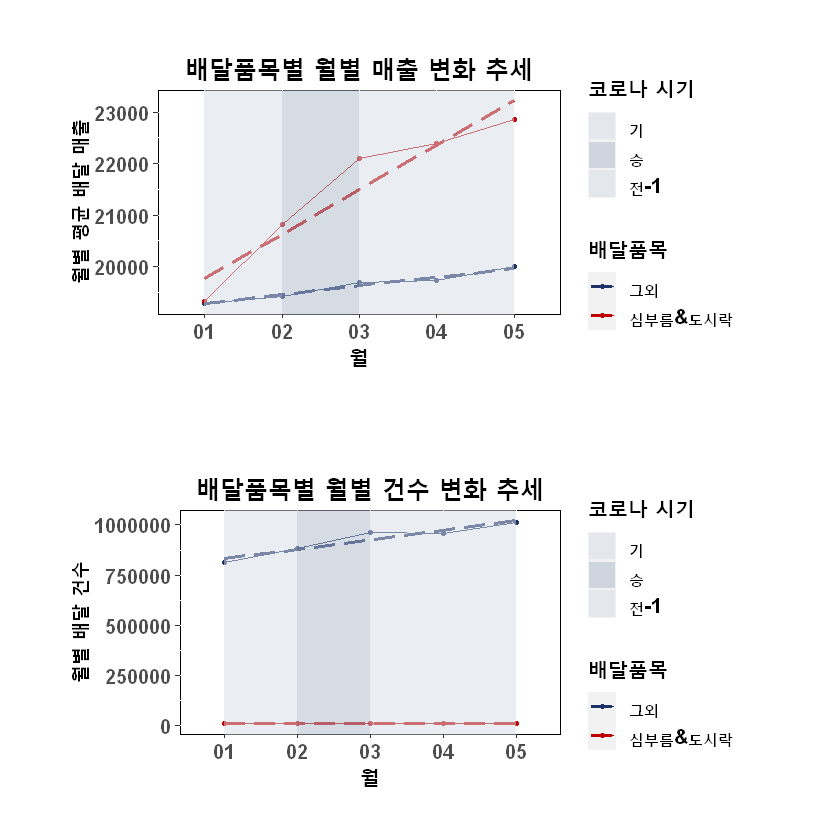

In [134]:
grid.arrange(p1, p2, ncol = 1)

### 도시락,심부름 : 월별 건수 변화 및 추세

`summarise()` regrouping output by 'month' (override with `.groups` argument)



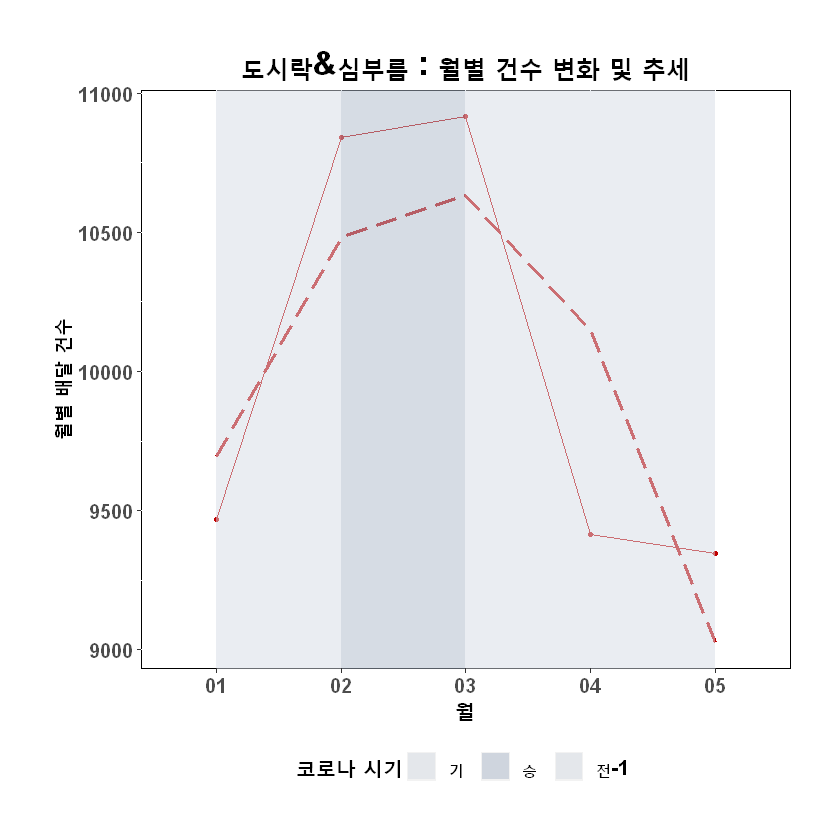

In [135]:
delivery %>% group_by(month, NEW_cate) %>% 
  summarise(MEAN = mean(n())) %>%
  ungroup() %>%
  filter(month != "06") %>%
  filter(NEW_cate == 1) %>% 
  ggplot(aes(x = month, y = MEAN)) +
  geom_line(group = 1, color = "#c00000") +
  geom_point(group = 1, color = "#c00000", size = 1) +
  geom_smooth(aes(group = 1), 
              color = "#c00000", method = 'lm', se = FALSE, formula = y ~ x + I(x^2), linetype = 'longdash') +
  geom_rect(data = month_index,
            aes(NULL, NULL, fill = period, xmin = start, xmax = end), 
            ymin = 0, ymax = 15000, alpha=0.5) +
  scale_fill_manual(values=c("기" = "#d6dce5", "승" = "#adb9ca", '전-1' = '#d6dce5')) +
  labs(x = '월', y = '월별 배달 건수', fill = '코로나 시기') +
  ggtitle('도시락&심부름 : 월별 건수 변화 및 추세') +
  theme(legend.position = 'bottom') +
  theme(panel.background = element_rect(fill = "white" , color = "black"),
        plot.title = element_text(face = "bold", hjust = 0.5, size =20),
        text = element_text(face = "bold",hjust = 0.5,size =15),
        plot.margin = margin(30,30,30,30))

### 코로나 심각에 따른 심부름&도시락 vs 그외품목 매출 비교'

`summarise()` regrouping output by 'month', 'bad' (override with `.groups` argument)



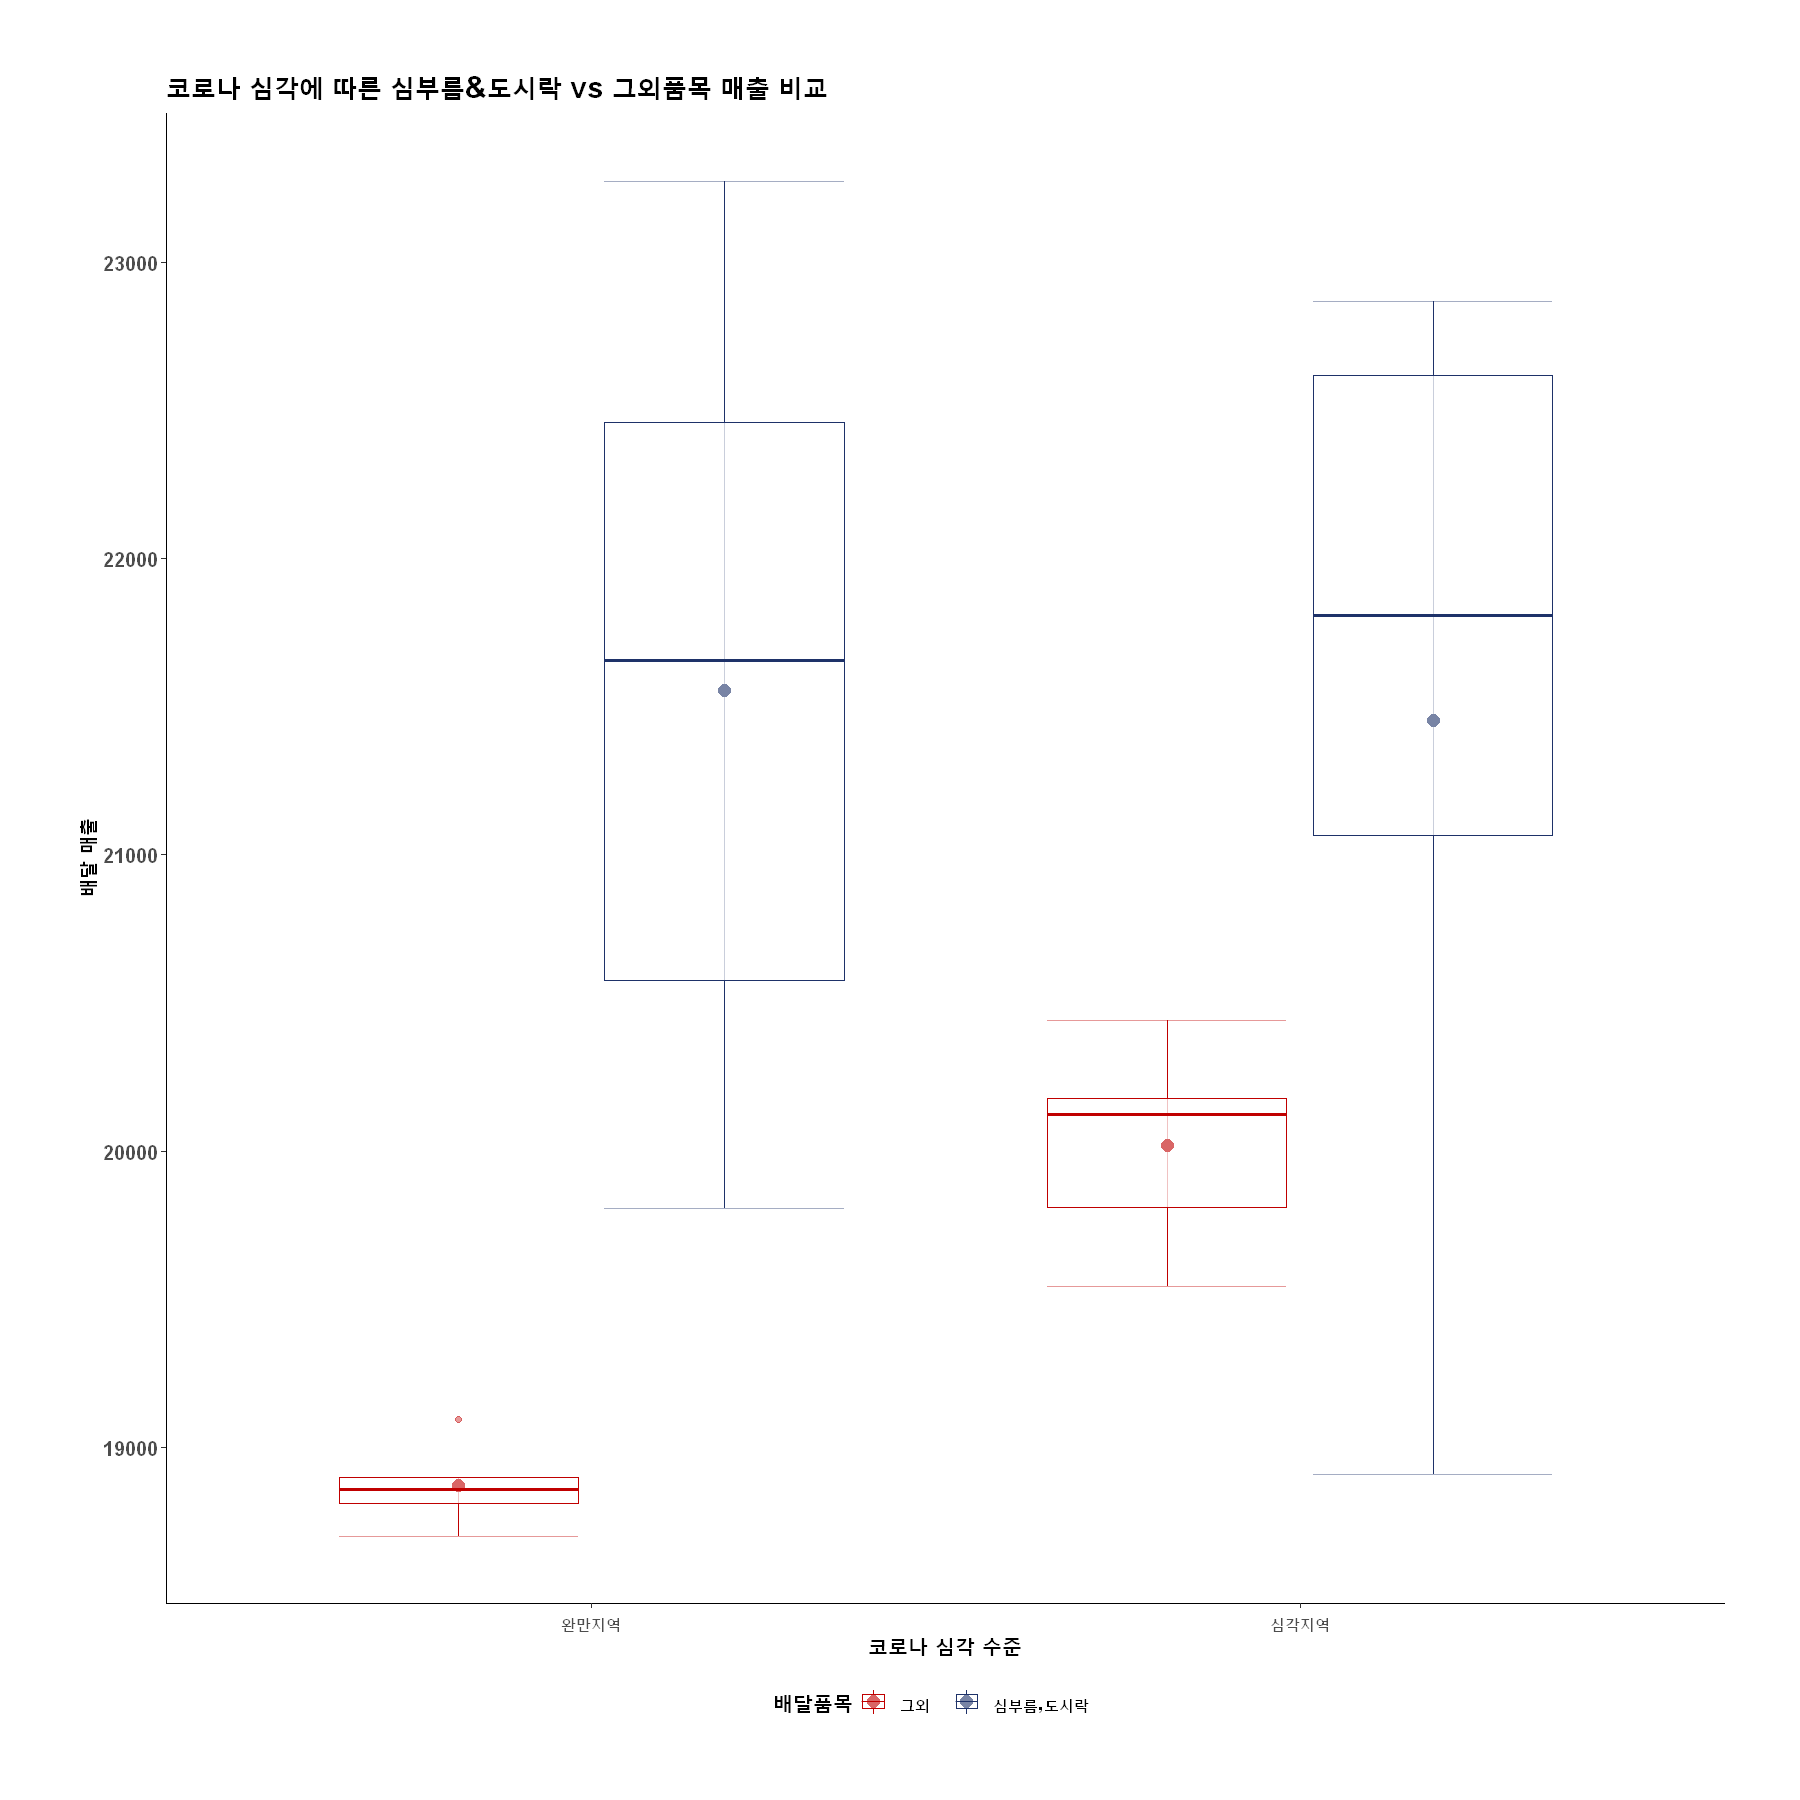

In [173]:
delivery %>% group_by(month, bad,NEW_cate) %>% 
summarise(MEAN = mean(SELL_AMOUNT)) %>% 
ungroup() %>% 
filter(month != '06') %>% 
ggplot(aes(y = MEAN, x = as.factor(bad), color = as.factor(NEW_cate))) +
stat_boxplot(alpha = 0.4, geom = 'errorbar') + 
stat_summary(aes(fill = as.factor(NEW_cate)), fun = mean, size= 5, geom="point", 
               shape=20, position = position_dodge(width = .75)) + 
geom_boxplot(alpha = 0.4) + scale_color_manual(labels = c('그외', '심부름,도시락'), values=c("#c00000", "#1E3269")) + 
scale_fill_discrete(guide = 'none') + 
scale_x_discrete(labels = c('완만지역', '심각지역')) +
labs(x = '코로나 심각 수준', color = '배달품목', y = '배달 매출') +
ggtitle('코로나 심각에 따른 심부름&도시락 vs 그외품목 매출 비교') +
theme_classic() +
theme(legend.position = "bottom", title = element_text(size = 15, face = 'bold'), 
        text = element_text(face = "bold",hjust = 0.5,size =15), plot.margin = margin(45,45,45,45))

## Index data로 유망 산업 살펴보기- Factor analysis

In [151]:
#전처리
index <- fread('index.csv', data.table = FALSE, encoding = 'UTF-8')

index %<>% group_by(period,catm,age,gender) %>% 
mutate(cgi_mean = mean(cgi)) %>% 
select(period,catm,age,gender,cgi_mean) %>% 
ungroup() %>% 
unique()

index <- index[index$period ==  202003 | index$period == 202005,]

index


period,catm,age,gender,cgi_mean
<int>,<chr>,<chr>,<chr>,<dbl>
202003,건강관리용품,20,F,101.55035
202003,건강관리용품,20,M,131.77539
202003,건강관리용품,20,all,114.49255
202003,가공식품,20,F,118.39691
202003,가공식품,20,M,120.04731
202003,가공식품,20,all,118.70326
202003,기호식품,20,F,84.94915
202003,기호식품,20,M,86.77547
202003,기호식품,20,all,85.69755


In [152]:

a <- c(rep(0,594))

month03 <- filter(index,index$period == 202003)

month05 <- filter(index,index$period == 202005)

change <- plyr::join(month03, month05, by = c("catm","age","gender"))
change

period,catm,age,gender,cgi_mean,period,cgi_mean
<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>
202003,건강관리용품,20,F,101.55035,202005,105.76775
202003,건강관리용품,20,M,131.77539,202005,132.52874
202003,건강관리용품,20,all,114.49255,202005,116.41905
202003,가공식품,20,F,118.39691,202005,89.31560
202003,가공식품,20,M,120.04731,202005,97.79870
202003,가공식품,20,all,118.70326,202005,91.20160
202003,기호식품,20,F,84.94915,202005,68.94370
202003,기호식품,20,M,86.77547,202005,72.72965
202003,기호식품,20,all,85.69755,202005,69.50745


In [153]:

colnames(change) <- c("period","catm","age","gender","mean1","period2","mean2")
change %<>% mutate(change = (mean2-mean1)/mean1) %>% na.omit() %>% select(catm,age,gender,change,period2)


change%<>% spread(key='catm', value='change') %>% select(-period2) # 5월과 3월의 cgi평균 차 볼것

change

age,gender,가공식품,건강관리용품,기호식품,담배,바디/헤어용품,뷰티소품,빙과류,빵류,생활용품,신선식품,애완동물용품,유제품류,음료,제과류,주류,화장품
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,all,-0.2316841,0.016826397,-0.1889213,-0.06221495,-0.107613476,-0.12941869,-0.10105152,-0.2097176,-0.091085715,-0.18593819,-0.11782080,-0.18463490,-0.021895467,-0.27516866,-0.0627554992,-0.220630136
20,F,-0.2456256,0.041530067,-0.1884121,-0.06989544,-0.079760146,-0.09359911,-0.12647124,-0.2550143,-0.150253481,-0.19671237,-0.06654687,-0.21179663,-0.039790300,-0.28535737,-0.0692921998,-0.075014701
20,M,-0.1853320,0.005716926,-0.1618639,-0.05317896,-0.095461792,-0.04812171,-0.04588769,-0.1262142,0.100936203,-0.17486634,-0.27642697,-0.08357210,0.024395482,-0.24232801,-0.0615255789,-0.465055927
30,all,-0.2203805,-0.007998865,-0.1938060,-0.05562005,-0.001186867,-0.22203395,-0.10812355,-0.2188768,-0.061136575,-0.18900568,-0.04051205,-0.18521338,0.319776471,-0.13395292,-0.1104431463,0.198959941
30,F,-0.2153747,0.024791878,-0.1801236,-0.05664355,-0.037447065,-0.20481001,-0.11631645,-0.2289154,-0.087024302,-0.18660996,-0.07568834,-0.18665825,0.501137015,-0.19572540,-0.1068206617,0.220681314
30,M,-0.2285409,-0.036160788,-0.2288126,-0.05157633,-0.126142883,-0.21779843,-0.08458331,-0.2083181,-0.002662533,-0.19230817,0.16666143,-0.17699383,0.080304160,-0.01461076,-0.1163617388,0.126935438
40,all,-0.1830026,0.091384223,-0.2601712,-0.09450994,-0.118325728,-0.24730751,-0.05044160,-0.2379172,-0.131765040,-0.15725958,-0.04069939,-0.18301088,0.013681302,-0.18070570,-0.0868379955,0.006967523
40,F,-0.1827169,0.121953795,-0.2049970,-0.10131912,-0.098590435,-0.21454655,-0.04333046,-0.2470979,-0.095732702,-0.16045336,-0.02872726,-0.19075487,0.018366688,-0.21890187,-0.0836413351,0.160383643
40,M,-0.1821159,-0.027697218,-0.3320951,-0.08301637,-0.124680410,-0.17761290,-0.06920051,-0.2227611,-0.184016810,-0.14729546,-0.10070850,-0.16478168,-0.001319842,-0.09971091,-0.0923138524,-0.236135975


In [155]:
#scaling 하기
change_factor = change %>% select(-age,-gender) %>% na.omit
change_factor = scale(change_factor) %>% na.omit %>% as.tibble()

Warning message:
"`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


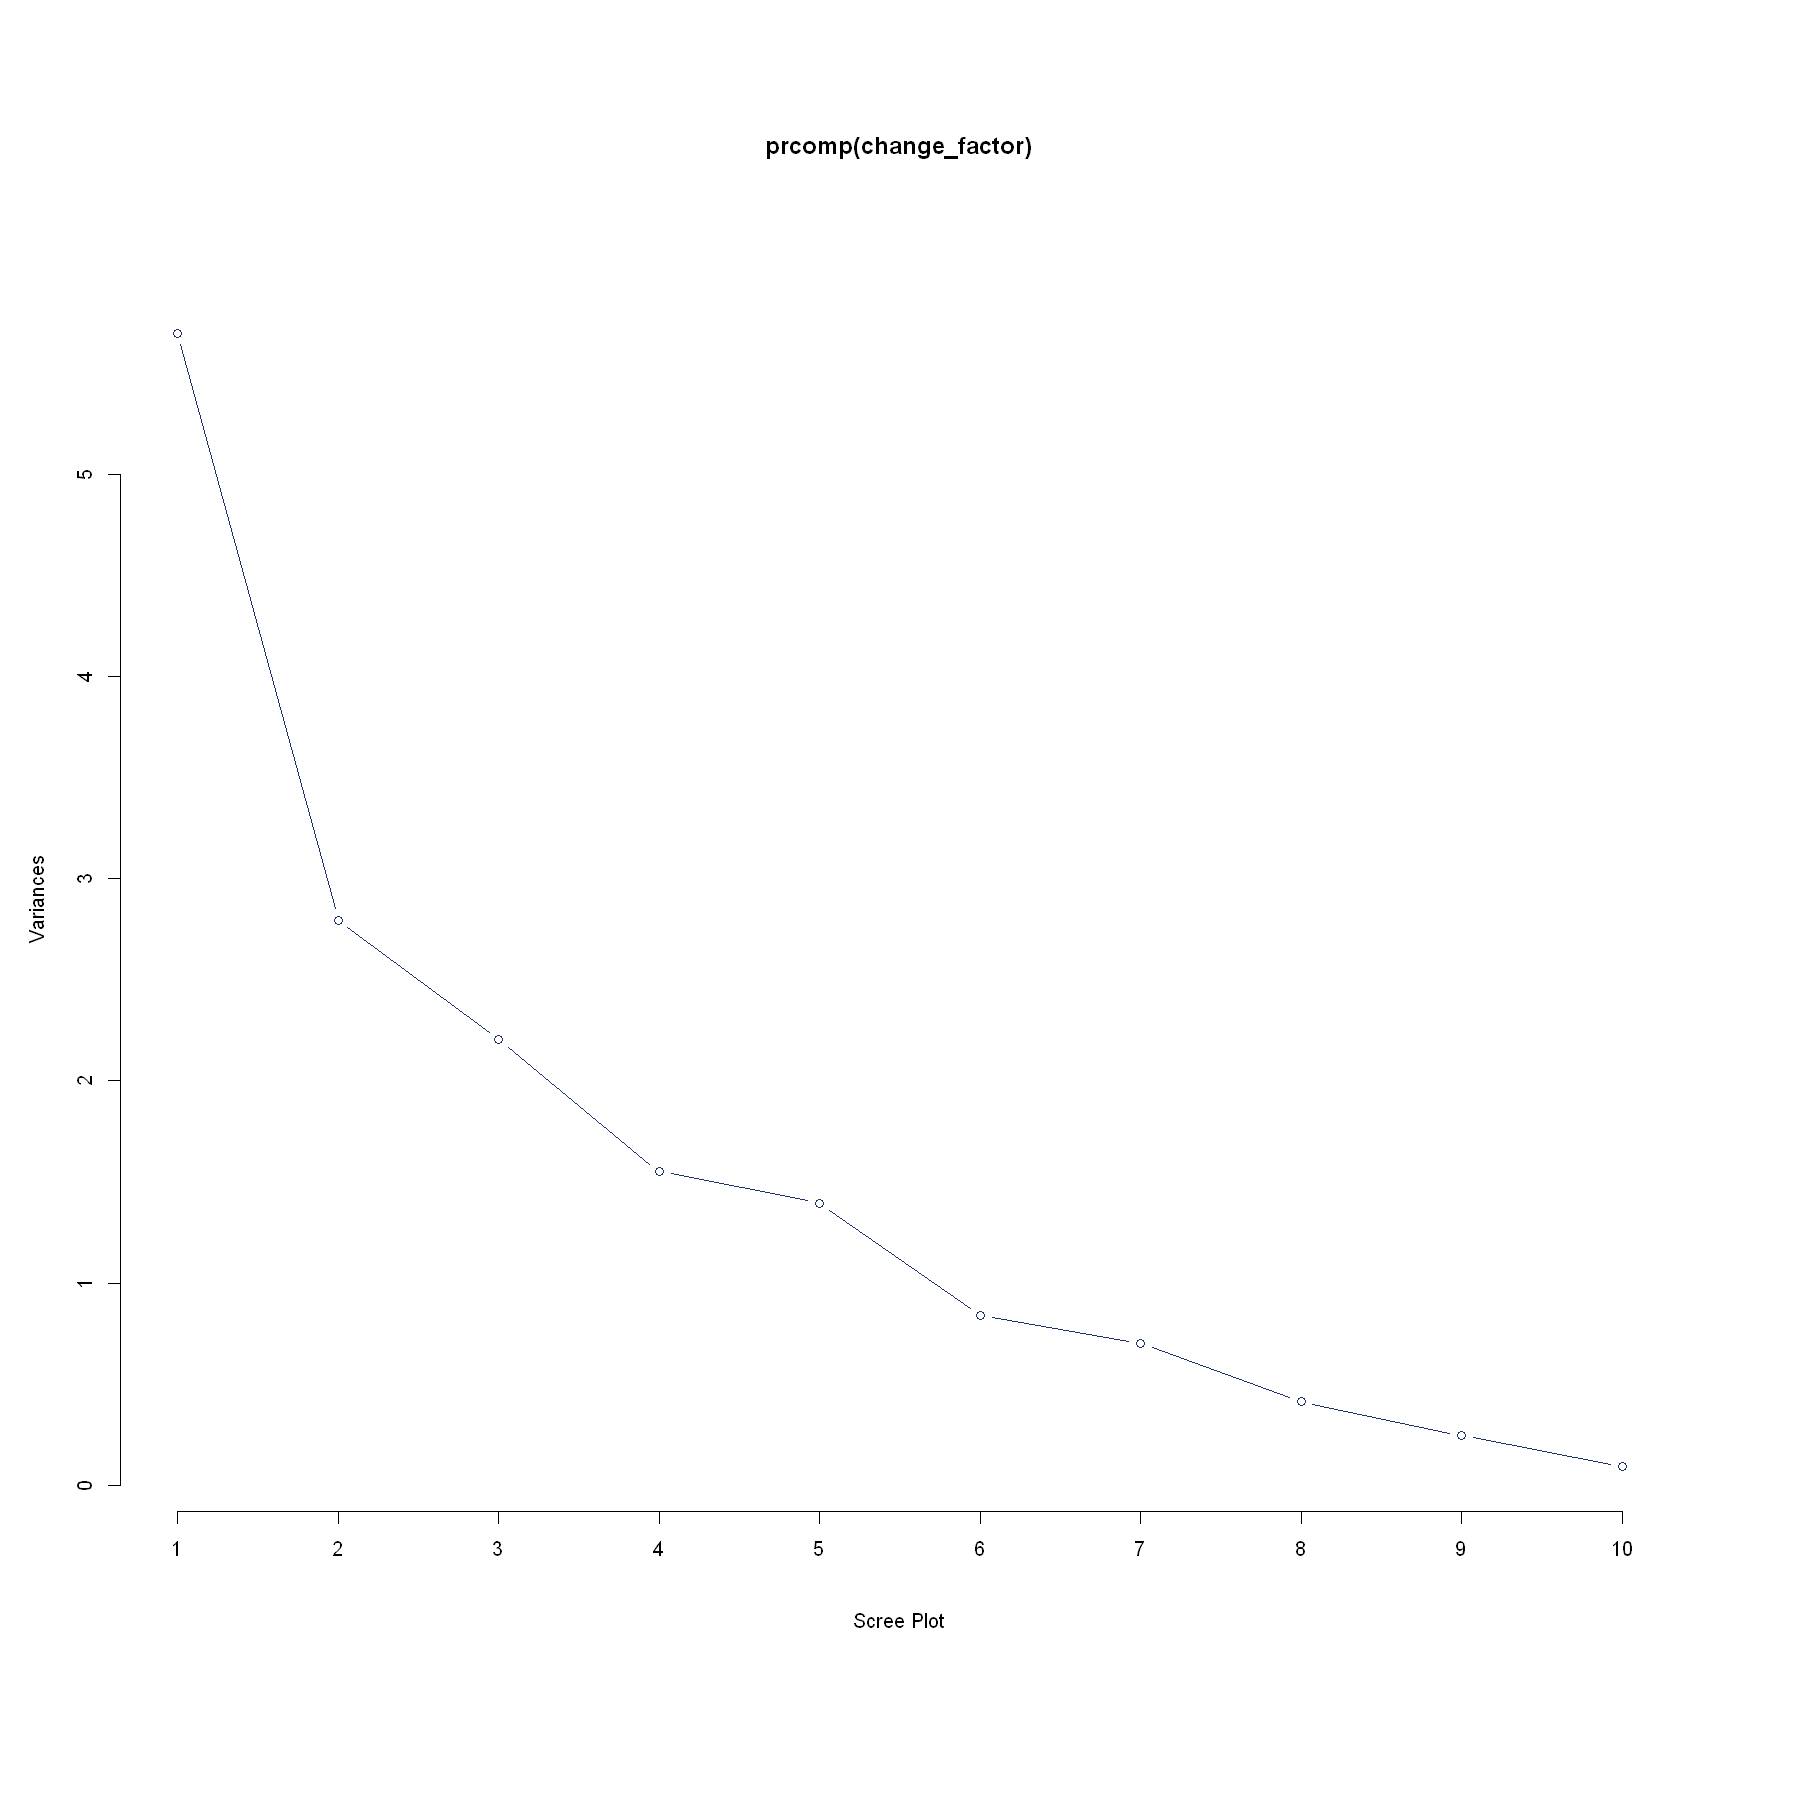

In [174]:
#scree plot을 통해 factor 수 정하기
par(mar = c(12,5,12,5))
plot(prcomp(change_factor),type="l",sub = 'Scree Plot' , col = "#1E3269")

factor를 2개로 잡겠다

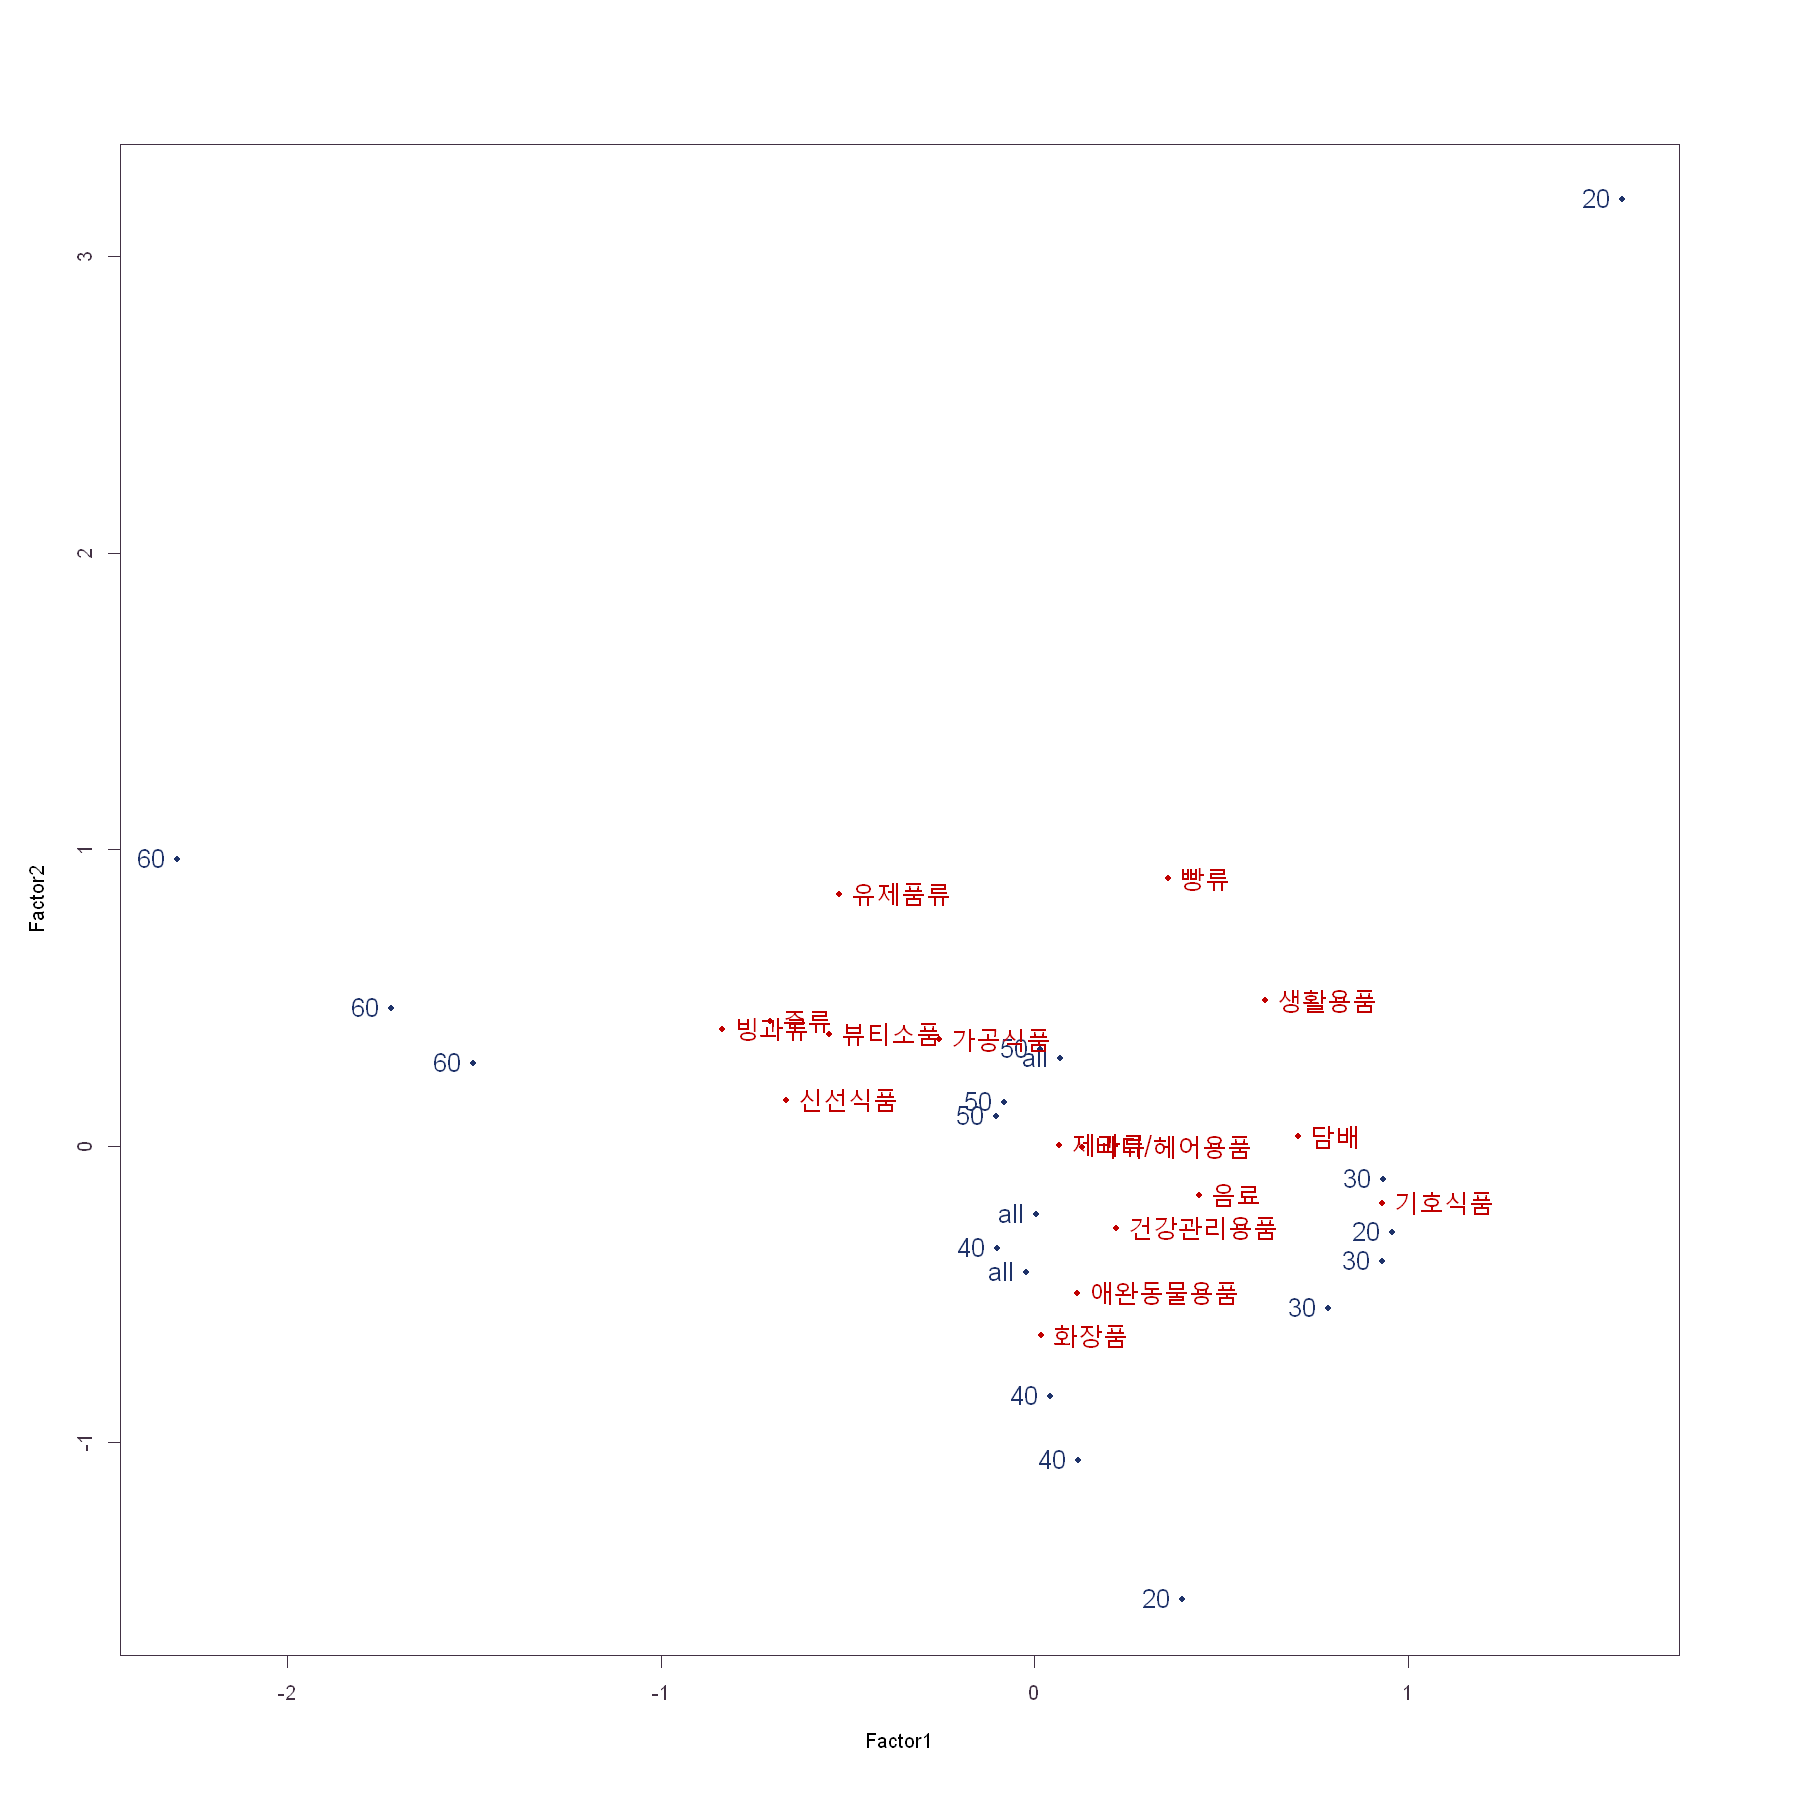

In [171]:

change_fa <- factanal(change_factor,factors=2,rotation = "varimax",scores = "regression")
par(mar = c(6,5,6,5))
plot(change_fa$scores, col = "#1E3269",pch = 20, fg = "#423144",col.axis ='#423144')
text(change_fa$scores[,1], change_fa$scores[,2], labels = change$age, cex = 1.3, pos = 2, col = "#1E3269")
points(change_fa$loadings, pch= 20, col = "#c00000")
text(change_fa$loadings[,1], change_fa$loadings[,2],labels = rownames(change_fa$loadings), cex = 1.5, pos = 4, col = "#c00000")

Scree plot 그래프가 급격히 떨어지는 지점과 열 수 (17)를 고려하여 factor 수를 2개로 보겠습니다.

factor1과 factor2가 명확히 구분되지는 않지만, 그 중 factor1은 '건강관리용품, 애완동물용품, 화장품, 담배, 기호식품' 등 생활에 필요한 물품들이고, factor2는 '유제품류, 신선식품,주류,빙과류' 등 식품군이 밀집되어 있다고 볼 수 있습니다.

또한 화장품, 애완동물용품, 건강관리용품 의 3-5월 변화율이 같이 묶였고, 그에 해당하는 주 타겟이 40대 임을 확인할 수 있습니다. 즉, 화장품, 애완동물용품, 건강관리용품과 40대의 cgi 변화율이 비슷하다고 볼 수 있습니다. 따라서 이들의 변화율이 상승세라면, 40대에게 이 품목을 타겟팅했을 때 유망산업으로 발전할 수 있다는 가능성이 있다고 볼 수 있습니다.

다음으로, 이 세 품목의 추이를 확인해보겠습니다.

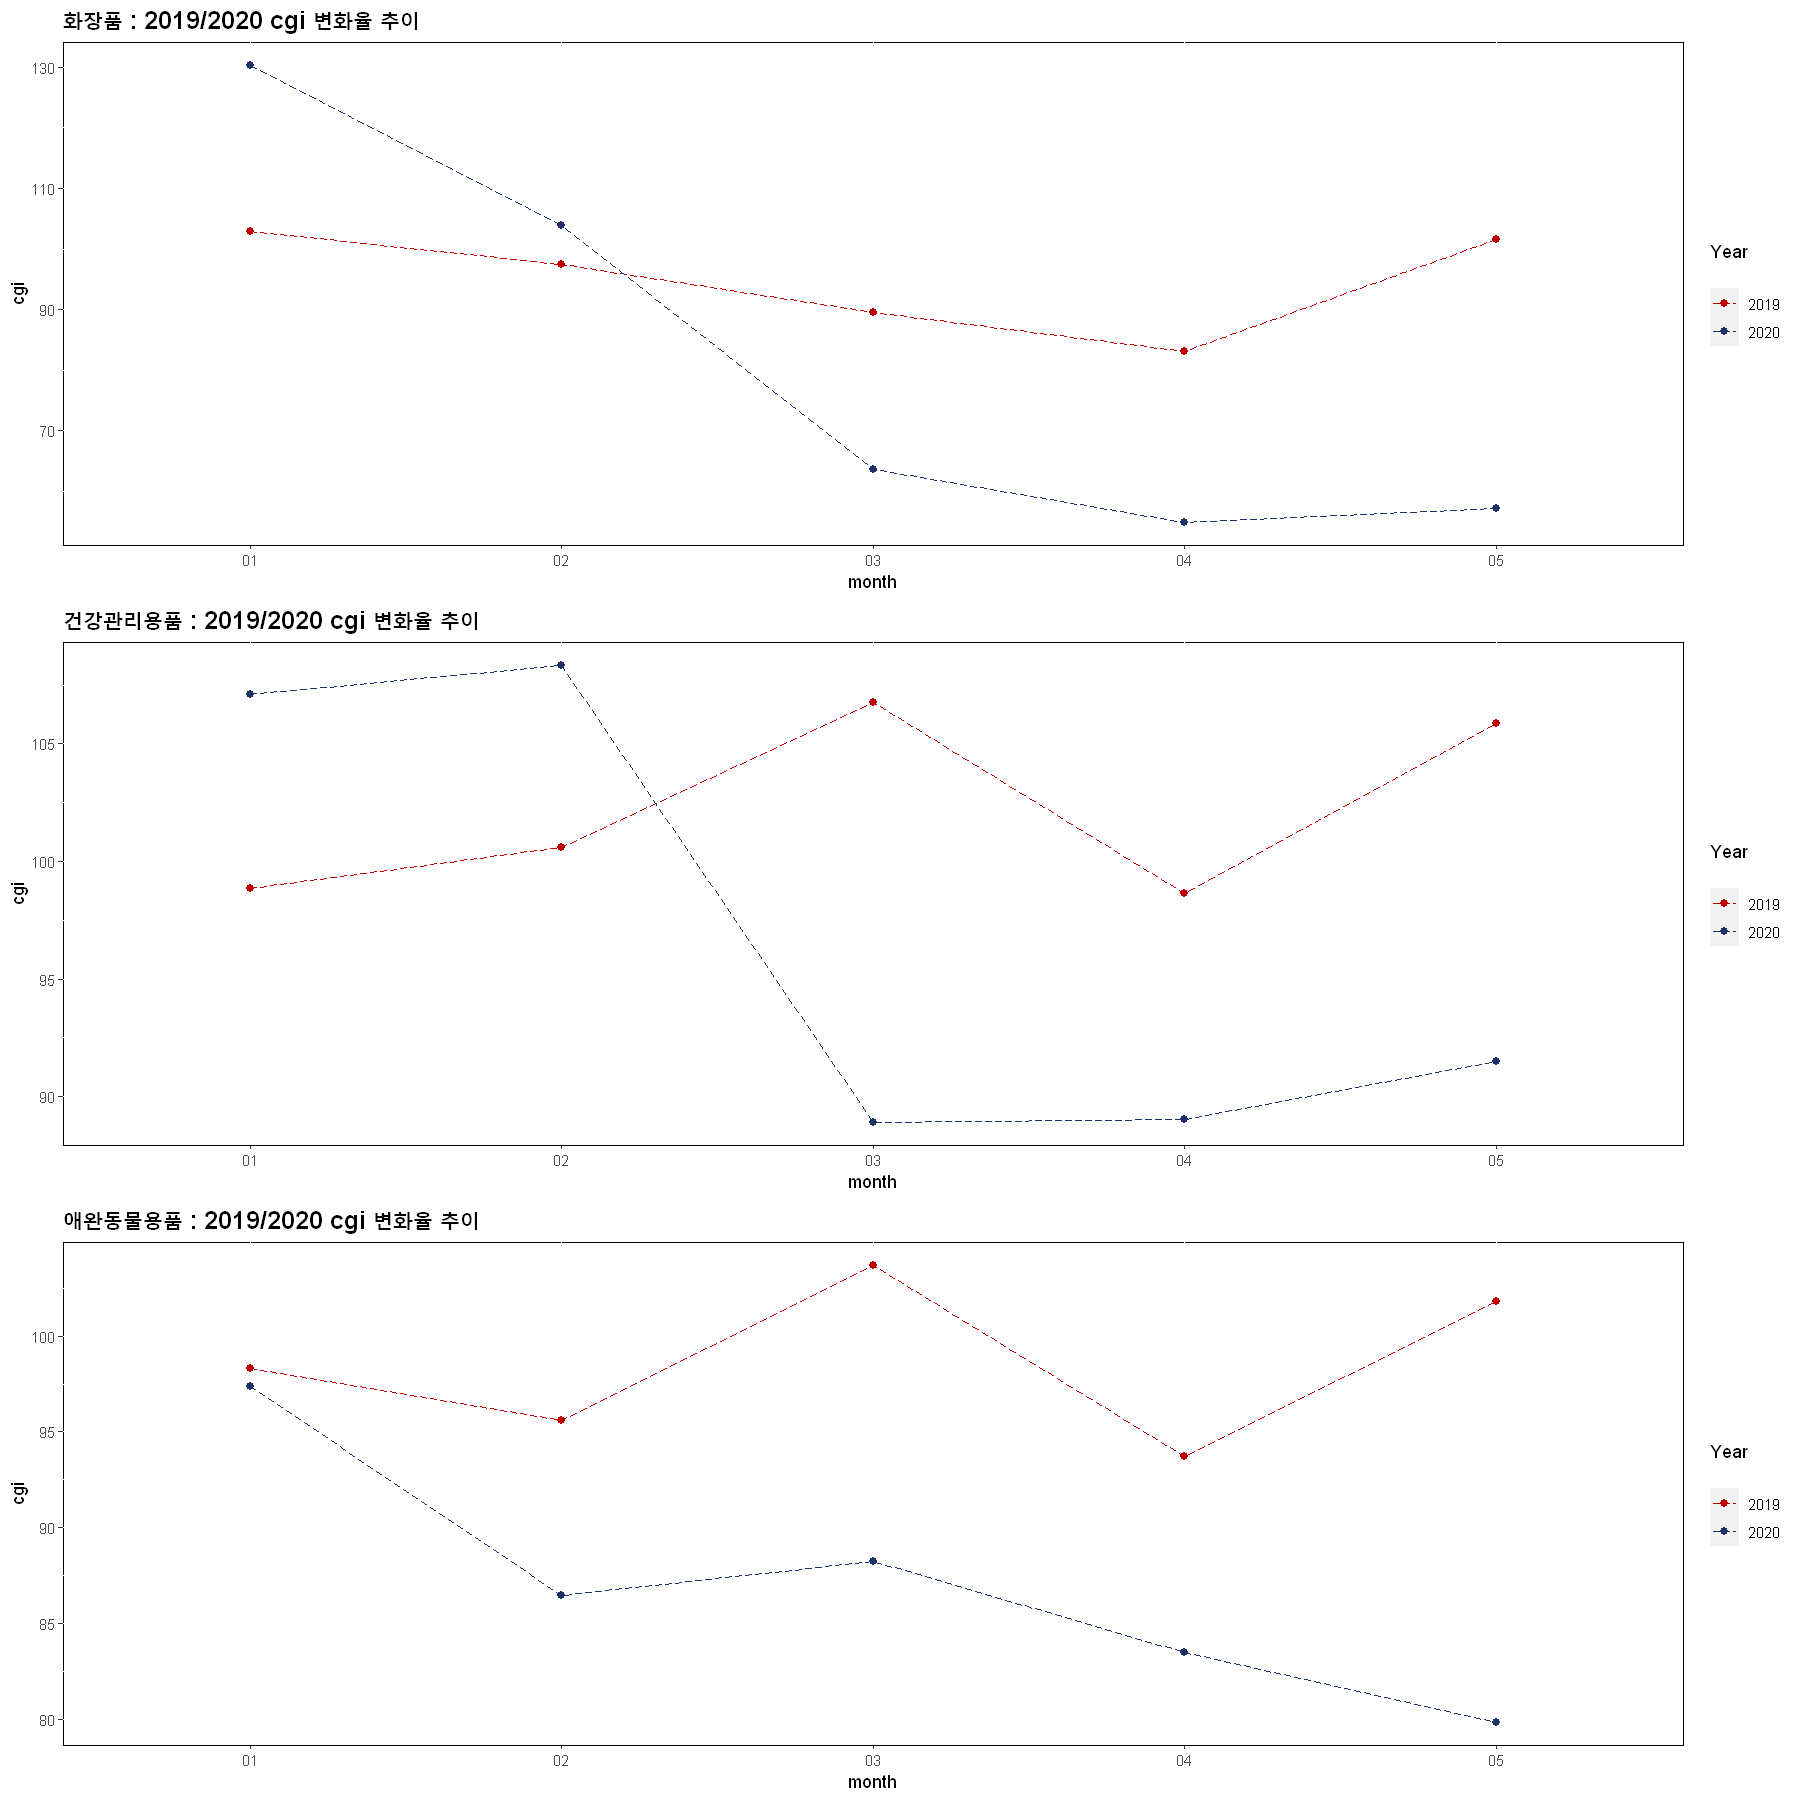

In [175]:
index <- fread('index.csv', stringsAsFactors=FALSE,data.table=FALSE, encoding = "UTF-8")
index %<>% mutate(year = ifelse(period>202000,2020,2019))
index %<>% group_by(period,catm) %>% mutate(n=mean(cgi)) %>% filter(period < 201906 | period >= 202001 )
index %<>% select(period, catm, n, year) %>% unique()


index %<>% mutate(month = substr(as.character(period),5,6)) 
a <- index %>% filter(catm == "화장품")%>%
  ggplot(aes(x = month, y = n, group = as.character(year) ,color =as.character(year))) +geom_line(size = 0.4, linetype="longdash")+labs(color = "Year\n")+
  ggtitle("화장품 : 2019/2020 cgi 변화율 추이") +  scale_color_manual(values=c("#c00000", "#1E3269"))+ylab("cgi") +geom_point(size=2)+
  theme(legend.position="right", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15))

b <- index %>% filter(catm == "건강관리용품")%>%
  ggplot(aes(x = month, y = n, group = as.character(year) ,color =as.character(year))) +geom_line(size = 0.4, linetype="longdash")+labs(color = "Year\n")+
   ggtitle("건강관리용품 : 2019/2020 cgi 변화율 추이") +geom_point(size=2)+
   scale_color_manual(values=c("#c00000", "#1E3269"))+ylab("cgi") +
  theme(legend.position="right", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15))


c <- index %>% filter(catm == "애완동물용품")%>%
  ggplot(aes(x = month, y = n, group = as.character(year) ,color =as.character(year))) +geom_line(size = 0.4, linetype="longdash")+labs(color = "Year\n")+
  ggtitle("애완동물용품 : 2019/2020 cgi 변화율 추이") + geom_point(size=2)+
  scale_color_manual(values=c("#c00000", "#1E3269"))+ylab("cgi") +
  theme(legend.position="right", panel.background = element_rect(fill = "white" , color = "black"),plot.background = element_rect(fill = "white",
                                size = 0.5, linetype = "solid"),plot.title = element_text(face = "bold",hjust = 0,size =15))

grid.arrange(a,b,c)

#  Card data로 유망 산업 살펴보기_Clustering 시각화

In [225]:
card<- read.table('card.txt',sep=',',header=T)
# card <- fread('card_20200717.csv',
#               header = T, sep=',',
#               stringsAsFactors = F,
#               data.table = F,
#               encoding = 'UTF-8')


## 한글 없애기 ##
data <- card %>% filter(! (selng_cascnt %in% grep('[ㄱ-힣]',unique(card$selng_cascnt), value = T)),
                        ! (salamt %in% grep('[ㄱ-힣]',unique(card$salamt), value = T))) %>% 
  mutate(selng_cascnt = as.numeric(selng_cascnt),
         salamt = as.numeric(salamt)) %>%
  select(- c(adstrd_code, mrhst_induty_cl_code))

data$receipt_dttm=data$receipt_dttm %>% as.character() %>% as.Date('%Y%m%d')

In [226]:
data %>% head()

receipt_dttm,adstrd_nm,mrhst_induty_cl_nm,selng_cascnt,salamt
<date>,<chr>,<chr>,<dbl>,<dbl>
2020-01-04,성내3동,약국,463,5843230
2020-01-04,성내3동,치과의원,33,7835550
2020-01-04,성내3동,한의원,53,4589800
2020-01-04,성내3동,의원,339,9267240
2020-01-04,성내3동,자동차정비,19,4441000
2020-01-04,성내3동,기타 교육,54,1446900
2020-01-04,성내3동,보습학원,12,3876000
2020-01-04,성내3동,일반 서적,58,1292090
2020-01-04,성내3동,정장,13,743000


In [227]:
## 음수 값 확인 - 양수만 넣기## 
data$selng_cascnt %>% summary()
data$salamt %>% summary()

data = data %>% filter(selng_cascnt > 0, salamt > 0) %>% 
  mutate(receipt_dttm = ymd(receipt_dttm),
         week = week(receipt_dttm))

data %>% glimpse()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1892       2       9     213      47 5729589 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.937e+09  1.150e+05  4.721e+05  8.662e+06  1.818e+06  5.422e+11 

Rows: 3,685,535
Columns: 6
$ receipt_dttm       <date> 2020-01-04, 2020-01-04, 2020-01-04, 2020-01-04,...
$ adstrd_nm          <chr> "성내3동", "성내3동", "성내3동", "성내3동", "성내3동", "성내3동", ...
$ mrhst_induty_cl_nm <chr> "약국", "치과의원", "한의원", "의원", "자동차정비", "기타 교육", "보습...
$ selng_cascnt       <dbl> 463, 33, 53, 339, 19, 54, 12, 58, 13, 919, 1249,...
$ salamt             <dbl> 5843230, 7835550, 4589800, 9267240, 4441000, 144...
$ week               <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...


In [228]:
#코로나 시기를 새로운 period변수로 나타내 줍니다.
index1 = which(data$receipt_dttm == '2020-02-22') %>% max() #기 
index2 = which(data$receipt_dttm == '2020-03-08') %>% max() #승
index3 = which(data$receipt_dttm == '2020-05-06') %>% max() #전-1
index4 = nrow(data) #전-2

data_period = data 
data_period$period = c(rep(1, index1),
                       rep(2, index2 - index1),
                       rep(3, index3 - index2),
                       rep(4, index4 - index3))

receipt_dttm          adstrd_nm mrhst_induty_cl_nm       selng_cascnt 
                 0                  0                  0                  0 
            salamt               week             period 
                 0                  0                  0

`summarise()` ungrouping output (override with `.groups` argument)



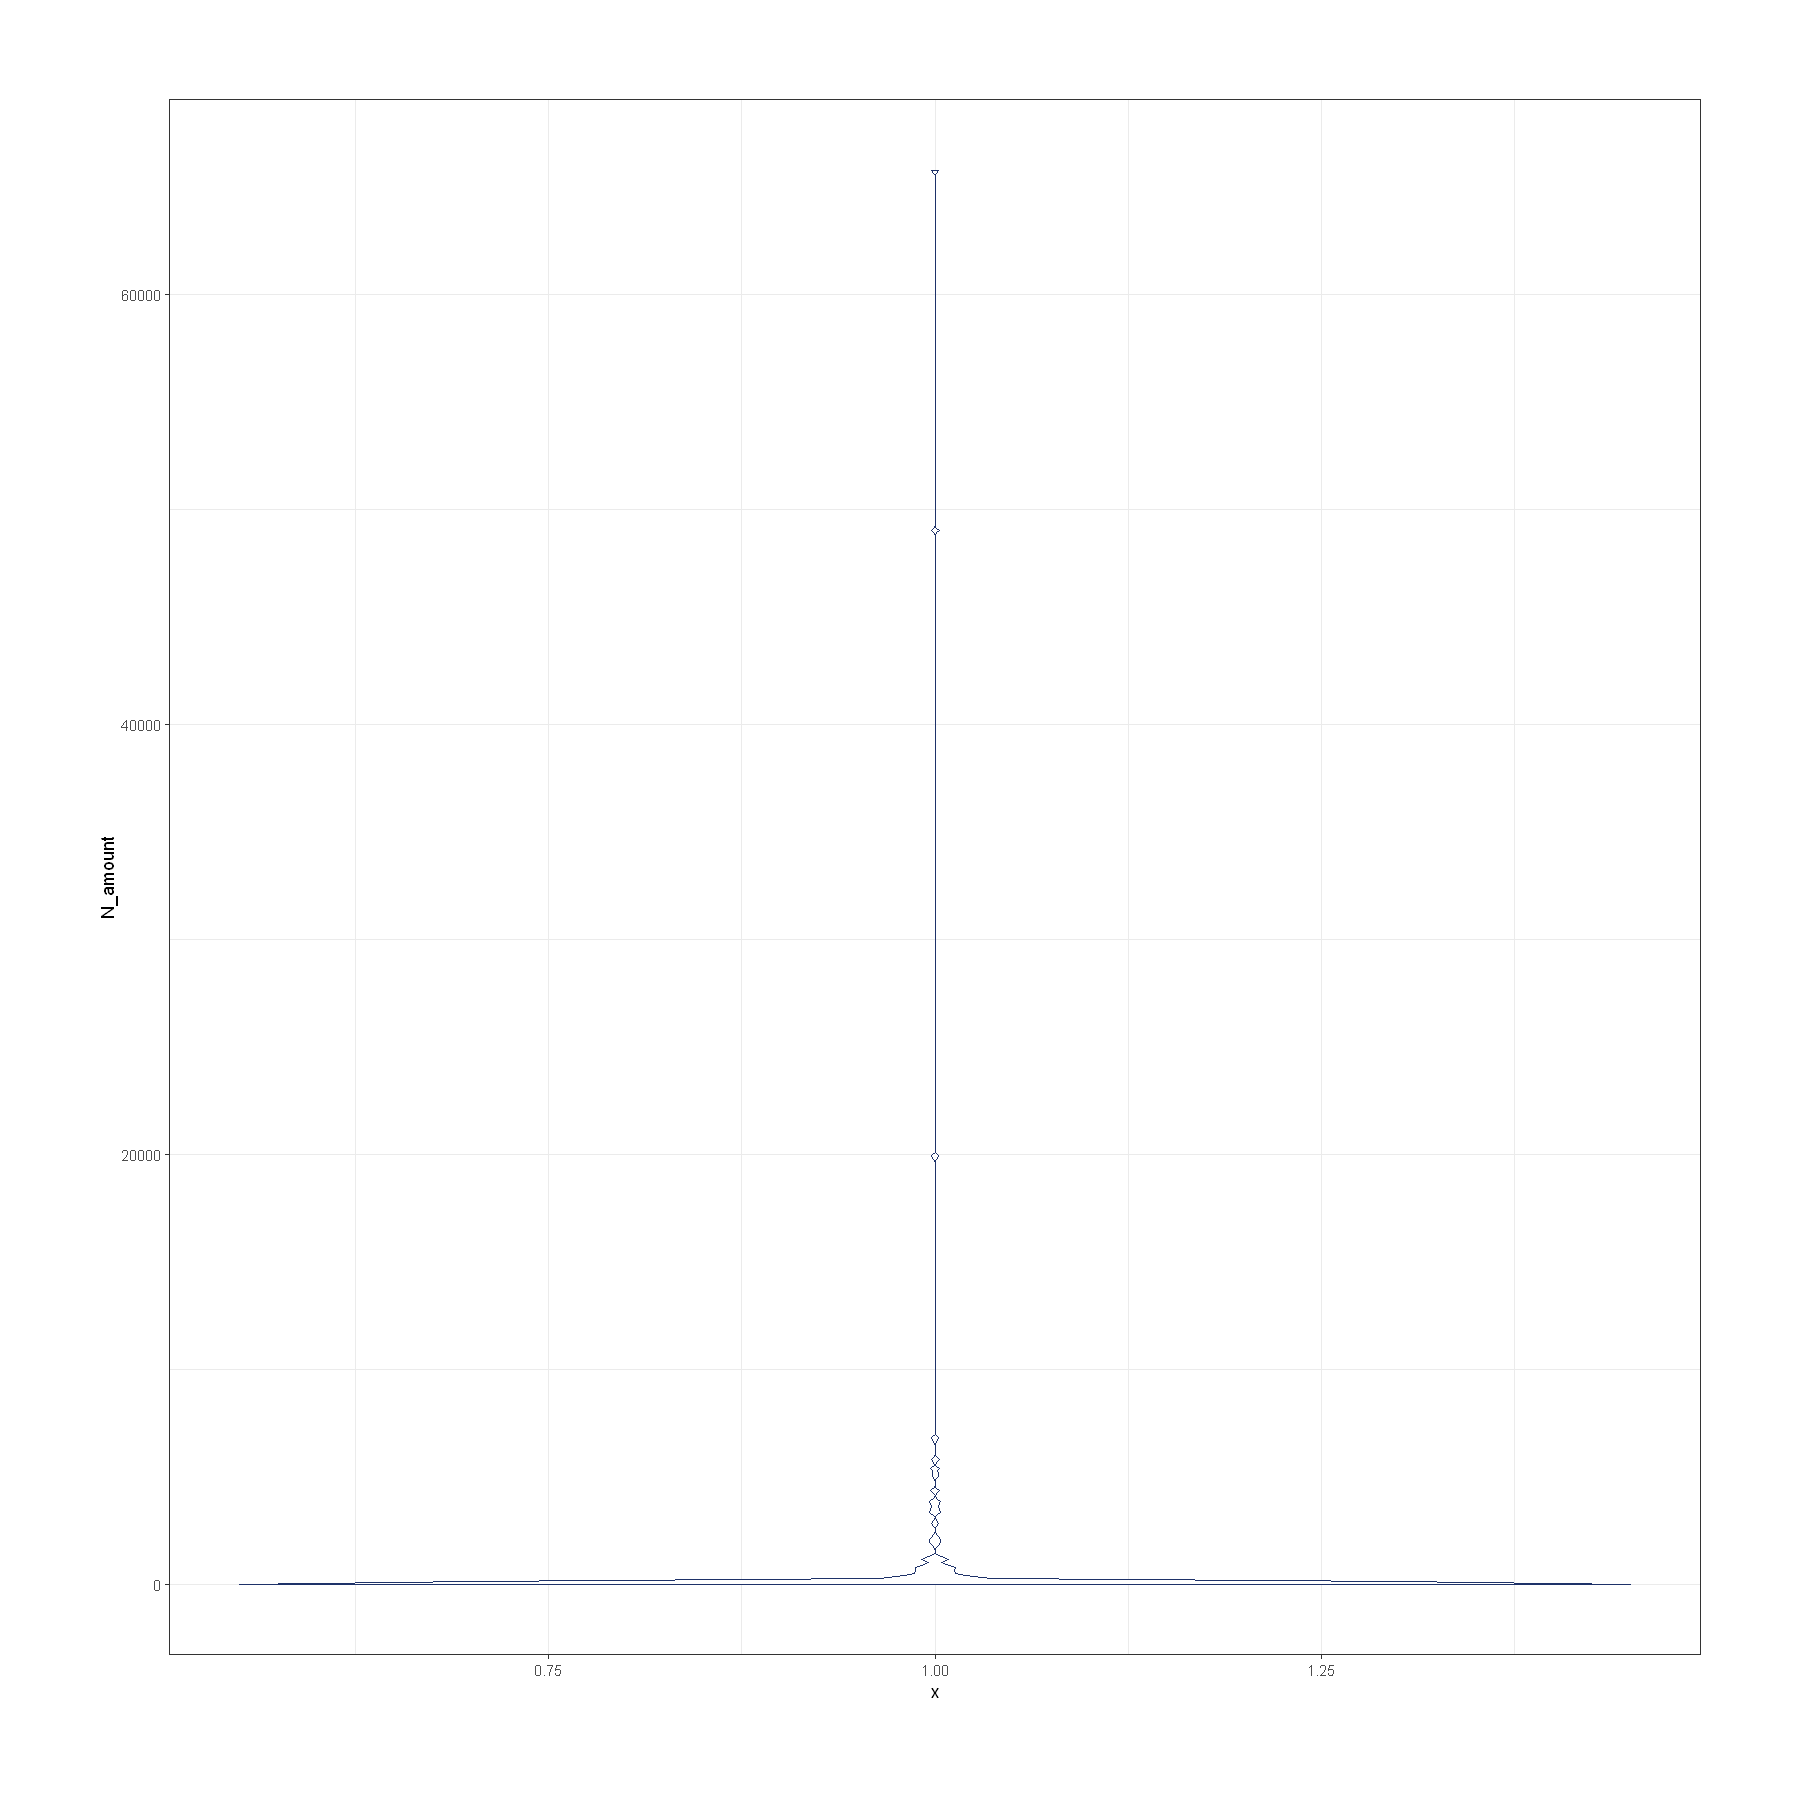

In [229]:
##이상치 및 결측치 처리##

data_period %>% is.na() %>% colSums()

mean_amount=data_period %>%
  group_by(mrhst_induty_cl_nm) %>% 
  summarise(N_amount=mean(selng_cascnt)) %>% 
  arrange(N_amount)

mean_amount %>%
  ggplot(aes(x=1, y=N_amount))+
  geom_violin( color = "#1E3269",size=0.3)+theme_bw() +theme(plot.margin = margin(60,60,60,60))  #바이올린

데이터에 NA값이 없는 것을 확인했습니다. 각 범주 별로 전체 기간을 대상으로 한 평균 판매량의 분포를 violinplot으로 확인해 보았습니다. 데이터가 아래쪽으로 많이 쏠려 있는 것을 볼 수 있습니다. 평균 판매량이 적은 품목의 경우 유망 품목이라고 보기 어렵습니다. 따라서 평균 판매량의 상위 75%에 해당하는 범주들을 필터링하여 k-means 클러스터링을 진행해 보겠습니다.

k-means방법은 이상치의 영향을 다른 클러스터링 기법보다 크게 받게 됩니다. 앞서 평균 판매량이 하위 25%인 이상치 카테고리를 제거하고, 상위 25%의 데이터는 그대로 두었습니다. 이는 특정 범주가 포스트 코로나 시대의 유망 산업 품목일 경우 판매량이 상위권일 가능성이 높고, 이를 발굴하는 것을 본 조사의 목적으로 하기 때문입니다. 따라서 이상치의 영향을 극대화하여 유망 산업을 좀더 효율적으로 발굴하기 위해 k-means 기법을 사용하였습니다.

In [230]:
categories_new=mean_amount %>%
  filter(N_amount>=quantile(mean_amount$N_amount)[2]) %>% # 판매량 하위 25% 빼고 볼것임
  arrange(desc(N_amount)) %>% select(mrhst_induty_cl_nm)%>% 
  ungroup()

categories_new <- as.data.frame(categories_new)

categories_new



mrhst_induty_cl_nm
<chr>
택 시
인터넷P/G
이동통신요금
연 쇄 점
생명 보험
철 도
인터넷Mall
통신판매(일반)
인터넷종합Mall


In [231]:
data_period <- data_period %>% 
  filter(mrhst_induty_cl_nm%in%
           as.matrix(categories_new,nrow = 1))
head(data_period)

,receipt_dttm,adstrd_nm,mrhst_induty_cl_nm,selng_cascnt,salamt,week,period
,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-04,성내3동,약국,463,5843230,1,1
2,2020-01-04,성내3동,치과의원,33,7835550,1,1
3,2020-01-04,성내3동,한의원,53,4589800,1,1
4,2020-01-04,성내3동,의원,339,9267240,1,1
5,2020-01-04,성내3동,자동차정비,19,4441000,1,1
6,2020-01-04,성내3동,보습학원,12,3876000,1,1


# K-means 클러스터링

(1) 시기별 평균 판매량, 평균 매출, 평균 판매 가격을 이용한 클러스터링

(1)-1 필요한 데이터 생성 및 scaling

In [232]:
data_amount_period <- data_period %>% 
  group_by(period, mrhst_induty_cl_nm) %>% # 기간, 산업별
  summarise(mean_amount = mean(selng_cascnt)) %>% 
  ungroup() %>% 
  spread(period, value = mean_amount) # 평균 판매량

data_selling_period <- data_period %>% 
  group_by(period, mrhst_induty_cl_nm) %>% 
  summarise(mean_selling = mean(salamt)) %>% 
  ungroup() %>% 
  spread(period, value = mean_selling) #평균 매출

data_price_period <- data_period %>%
  group_by(period,mrhst_induty_cl_nm) %>% 
  summarize(once_price=sum(salamt)/sum(selng_cascnt)) %>% 
  ungroup() %>% 
  spread(period,value = once_price) #평균 판매 가격

colnames(data_amount_period)[-1] = c('amount_1', 'amount_2', 'amount_3', 'amount_4') 
colnames(data_selling_period)[-1] = c('selling_1', 'selling_2', 'selling_3', 'selling_4')
colnames(data_price_period)[-1] = c('price_1','price_2','price_3','price_4')

`summarise()` regrouping output by 'period' (override with `.groups` argument)

`summarise()` regrouping output by 'period' (override with `.groups` argument)

`summarise()` regrouping output by 'period' (override with `.groups` argument)



In [233]:
head(data_amount_period)
head(data_selling_period)
head(data_price_period)

mrhst_induty_cl_nm,amount_1,amount_2,amount_3,amount_4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1급 호텔,27.92205,20.19157,22.08760,24.02946
2급 호텔,15.12176,12.05614,10.45037,13.40000
CATV,35.33333,12.41379,21.87591,15.40206
CATV홈쇼핑,3154.94828,4241.25000,3966.60000,3703.17123
L P G,35.33362,32.79613,35.07146,39.01433
PG 상품권,427.74786,407.42105,442.54008,453.24925


mrhst_induty_cl_nm,selling_1,selling_2,selling_3,selling_4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1급 호텔,4403976,2302948.7,1865341,2385896
2급 호텔,3850576,2053241.4,1663914,2431877
CATV,2354778,632701.1,2528909,1922629
CATV홈쇼핑,333337529,410119249.5,409689625,376119576
L P G,1227057,1148436.7,1168181,1165527
PG 상품권,45235137,40131524.4,52008110,58113853


mrhst_induty_cl_nm,price_1,price_2,price_3,price_4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1급 호텔,157723.95,114054.96,84451.96,99290.46
2급 호텔,254638.11,170306.69,159220.60,181483.33
CATV,66644.67,50967.59,115602.45,124829.31
CATV홈쇼핑,105655.47,96697.73,103284.83,101566.89
L P G,34727.75,35017.45,33308.59,29874.32
PG 상품권,105751.87,98501.35,117521.81,128216.10


In [234]:
# 데이터 합치기
data_clust = data_period %>% group_by(mrhst_induty_cl_nm) %>% 
  summarise(MEAN_SELLING = mean(salamt),
            MEAN_AMOUNT = mean(selng_cascnt),
            once_price = sum(salamt)/sum(selng_cascnt)
            ) %>%
  ungroup %>% 
  left_join(data_amount_period) %>% 
  left_join(data_selling_period) %>% 
  left_join(data_price_period)

#클러스터링하려면 numeric 변수만 필요합니다. 각 카테고리의 이름을 제거해 줍니다.
clust1 = data_clust %>%
  select(-c(mrhst_induty_cl_nm))

clust_scaled = scale(clust1) %>% as_tibble()

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "mrhst_induty_cl_nm"

Joining, by = "mrhst_induty_cl_nm"

Joining, by = "mrhst_induty_cl_nm"



In [235]:
clust_scaled%>% head()

MEAN_SELLING,MEAN_AMOUNT,once_price,amount_1,amount_2,amount_3,amount_4,selling_1,selling_2,selling_3,selling_4,price_1,price_2,price_3,price_4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.21429853,-0.1700792,-0.14309844,-0.1587131,-0.16215811,-0.1728891,-0.1752628,-0.2232320,-0.19773716,-0.20401246,-0.21397240,-0.1114148,-0.1400547,-0.1598664,-0.14240226
-0.21494338,-0.1719226,-0.09267179,-0.1603192,-0.16373370,-0.1749024,-0.1770940,-0.2247044,-0.19852675,-0.20450073,-0.21384557,-0.0448055,-0.1043347,-0.1137938,-0.09085214
-0.21547699,-0.1704289,-0.14916941,-0.1577831,-0.16366443,-0.1729258,-0.1767491,-0.2286841,-0.20301854,-0.20240393,-0.21525027,-0.1740138,-0.1801153,-0.1406714,-0.12638468
0.80602699,0.4407422,-0.14752180,0.2336453,0.65533377,0.5095315,0.4585571,0.6519255,1.09179138,0.78457646,0.81692760,-0.1472016,-0.1510765,-0.1482615,-0.14097452
-0.21806016,-0.1680564,-0.19136573,-0.1577831,-0.15971699,-0.1706429,-0.1726813,-0.2316845,-0.20138777,-0.20570241,-0.21733865,-0.1959503,-0.1902436,-0.1913810,-0.18593901
-0.08460916,-0.1019933,-0.13875995,-0.1085456,-0.08716343,-0.1001487,-0.1013194,-0.1145970,-0.07812196,-0.08246358,-0.06025345,-0.1471353,-0.1499312,-0.1394887,-0.12426053


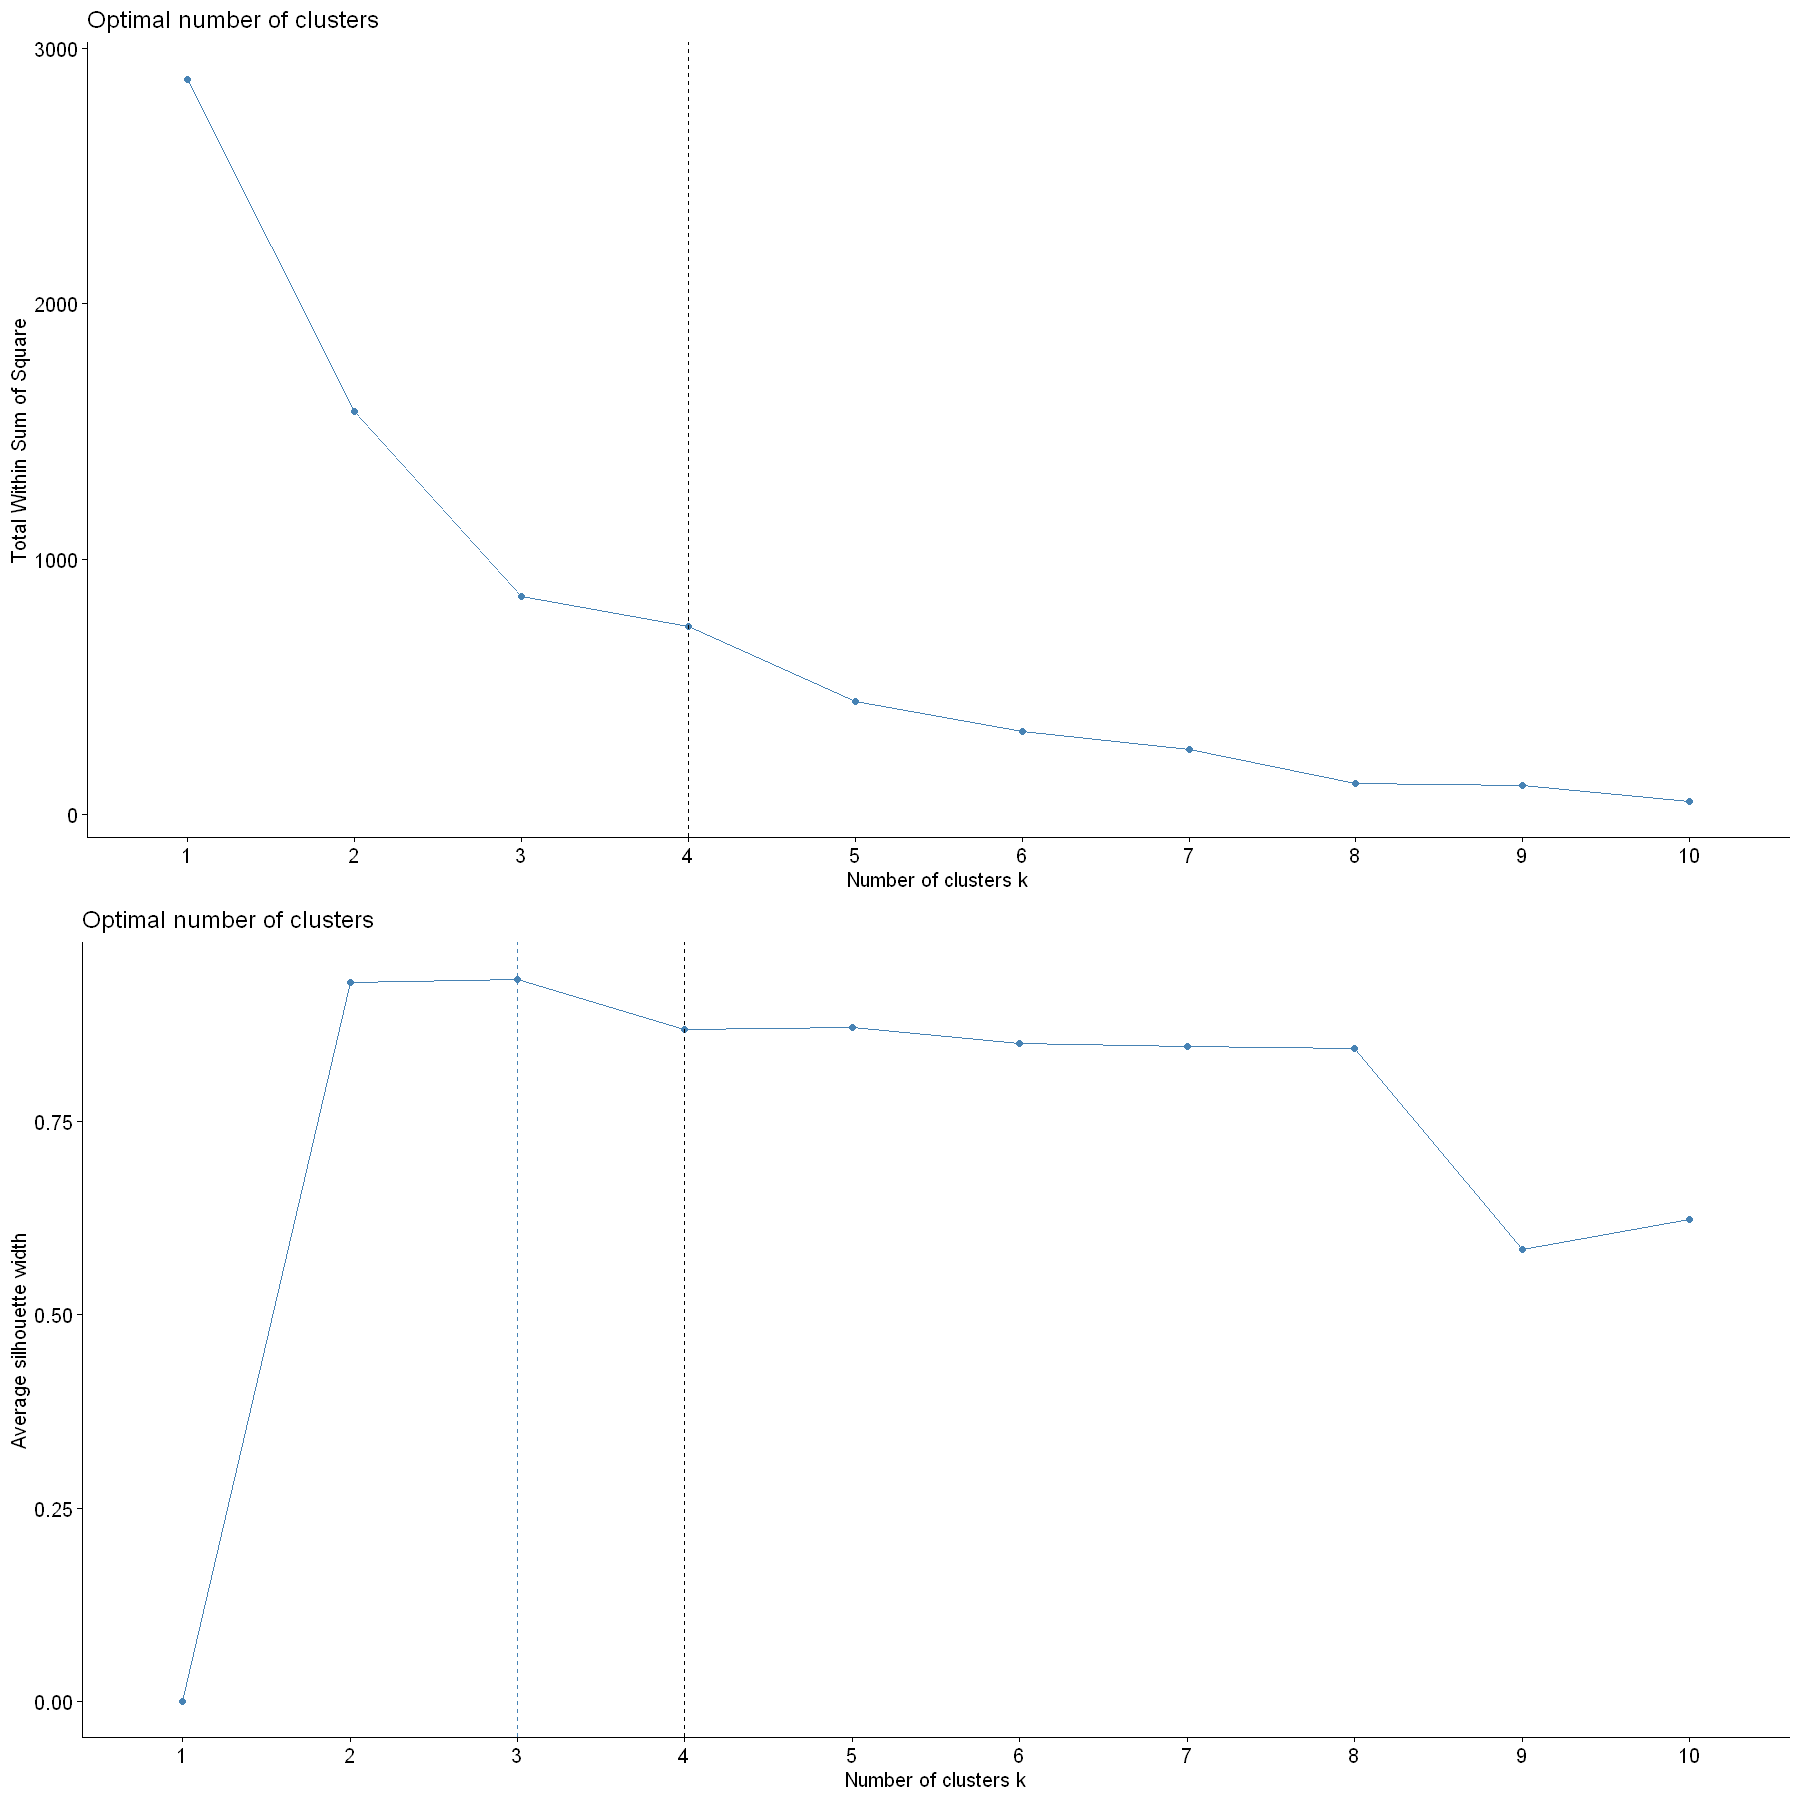

In [236]:
set.seed("19990107")

kmeans1 <- kmeans(clust_scaled, nstart = 10, iter.max = 15, centers = 4)

a<-fviz_nbclust(x = clust_scaled, FUNcluster = kmeans, method='wss') + 
  geom_vline(xintercept = 4, linetype = 2)

b<-fviz_nbclust(x = clust_scaled, FUNcluster = kmeans, method = "silhouette") +
  geom_vline(xintercept = 4, linetype = 2)
grid.arrange(a,b)

k=4로 보자

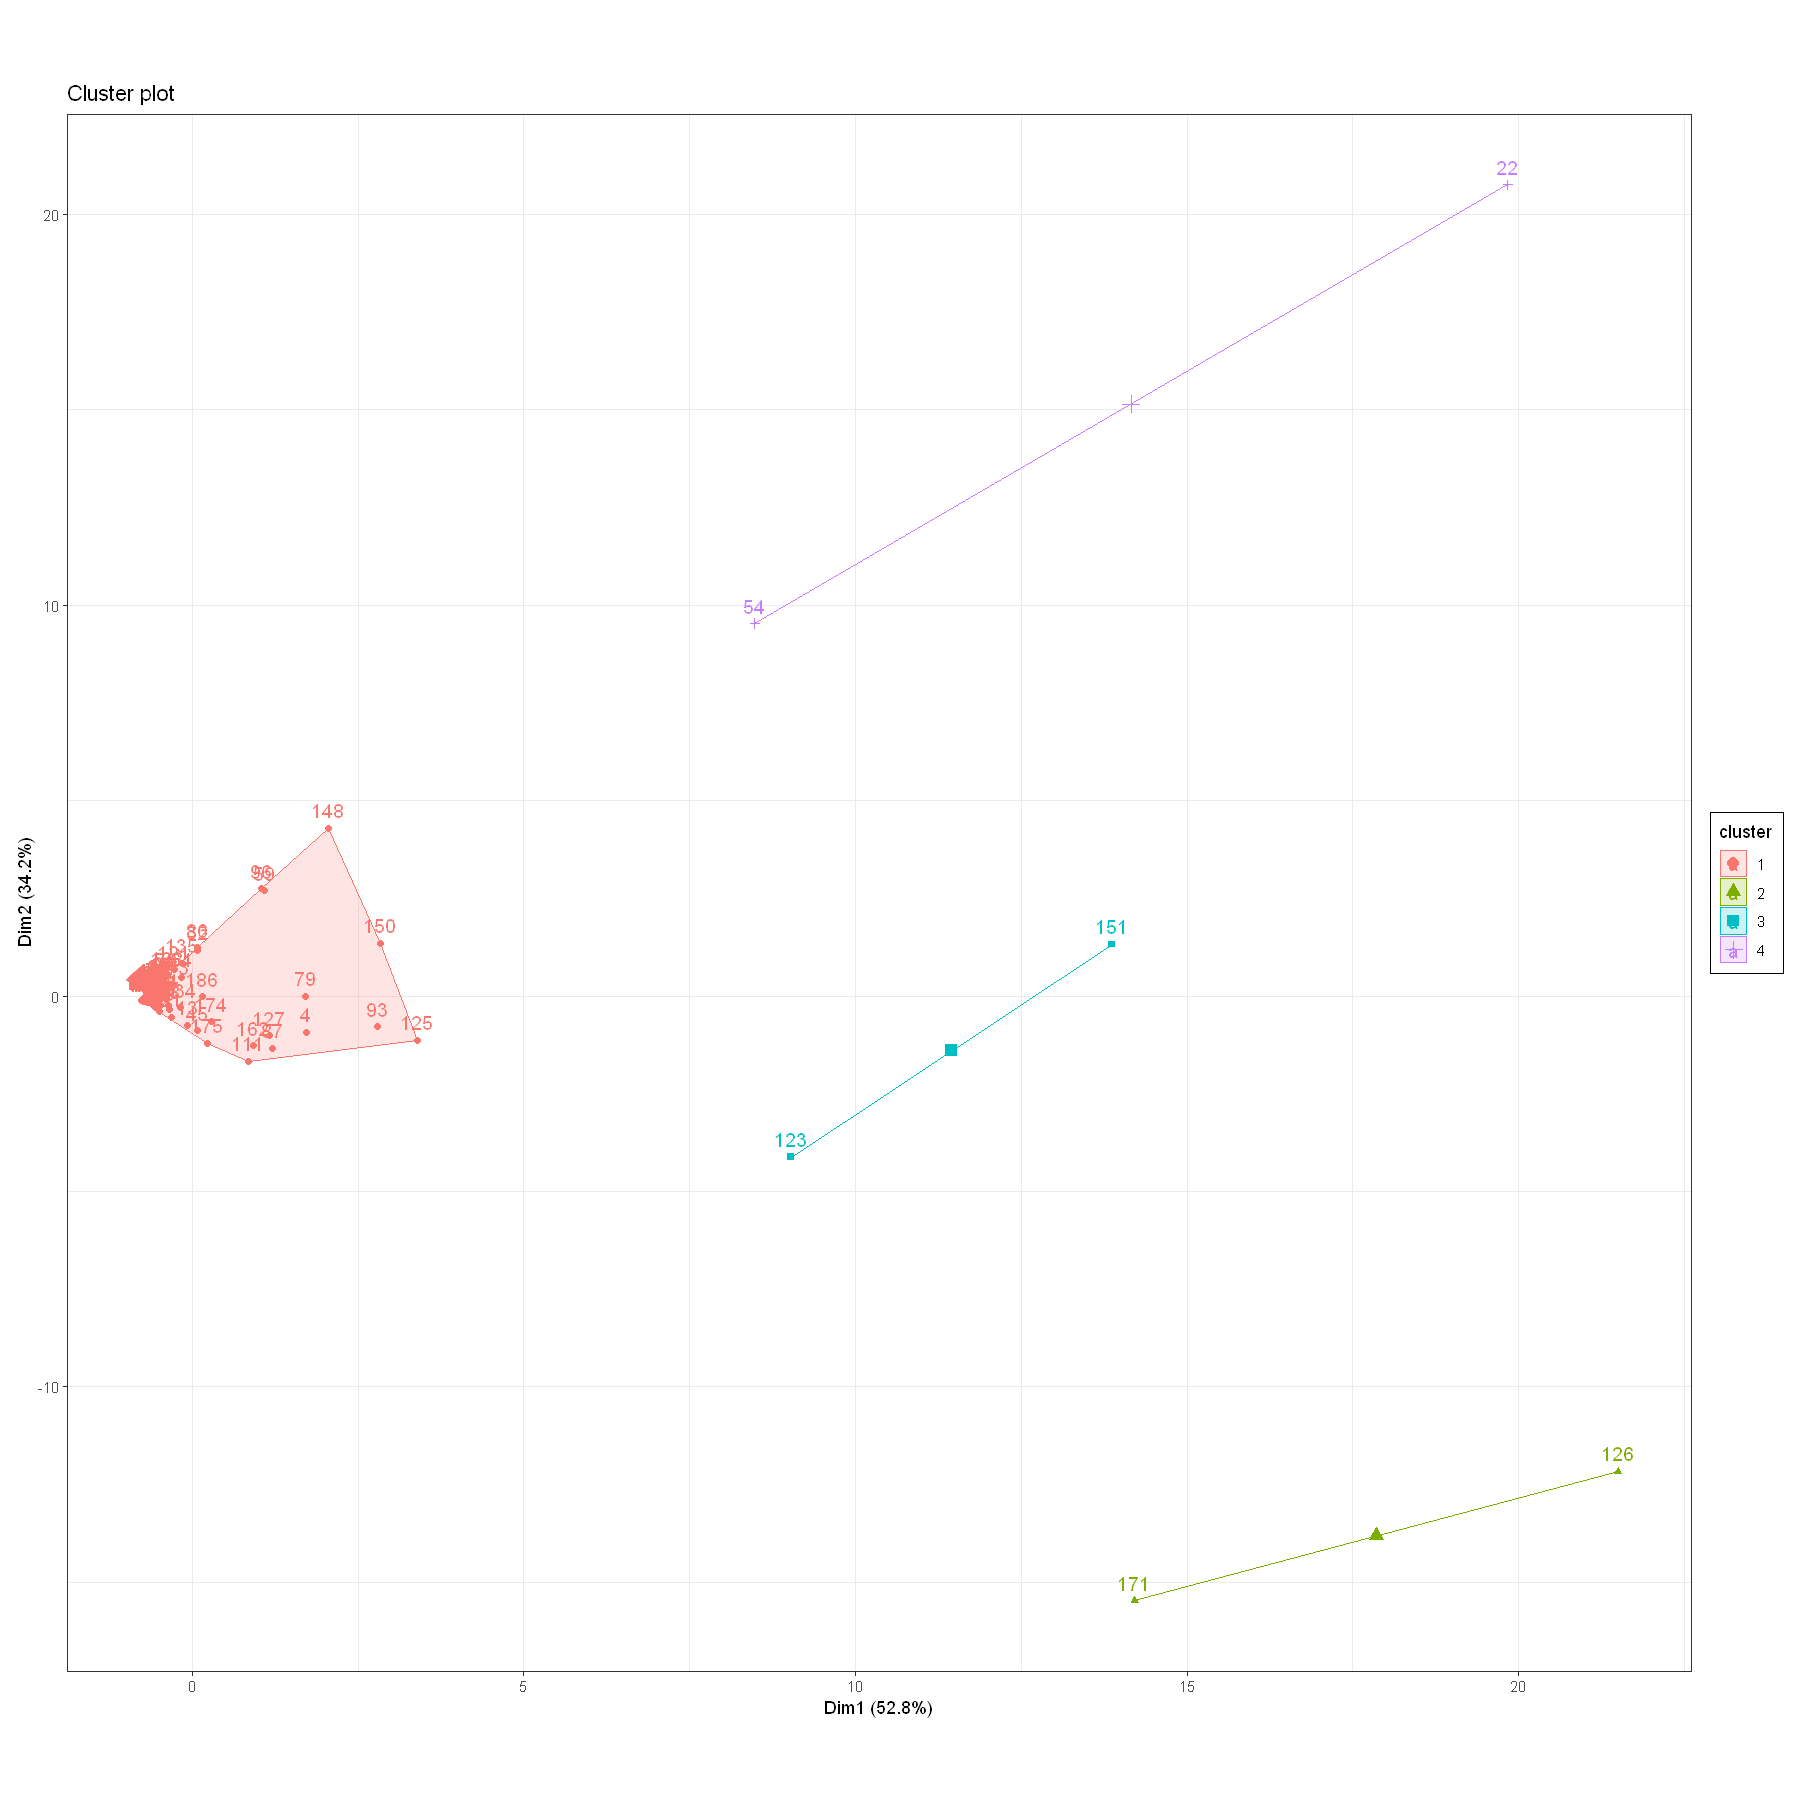

In [237]:
data_clust$cluster = kmeans1$cluster

fviz_cluster(kmeans1, clust_scaled)+ theme_bw()+theme(
    legend.background = element_rect(color = 'black', 
                                            size = 0.5),plot.margin=margin(50,10,50,10))

이제 각 클러스터의 품목들이 어떠한 특성을 갖고 있는지 알아보고, 본 조사에서 정의한 포스트 코로나 시기에 따른 소비 패턴을 분석해 봅니다. 이를 시각화하기 위한 데이터를 만들어 보고, 각 항목별로 클러스터들의 시기별 추이를 시각화해 보았습니다.



Joining, by = "mrhst_induty_cl_nm"

`summarise()` regrouping output by 'period' (override with `.groups` argument)



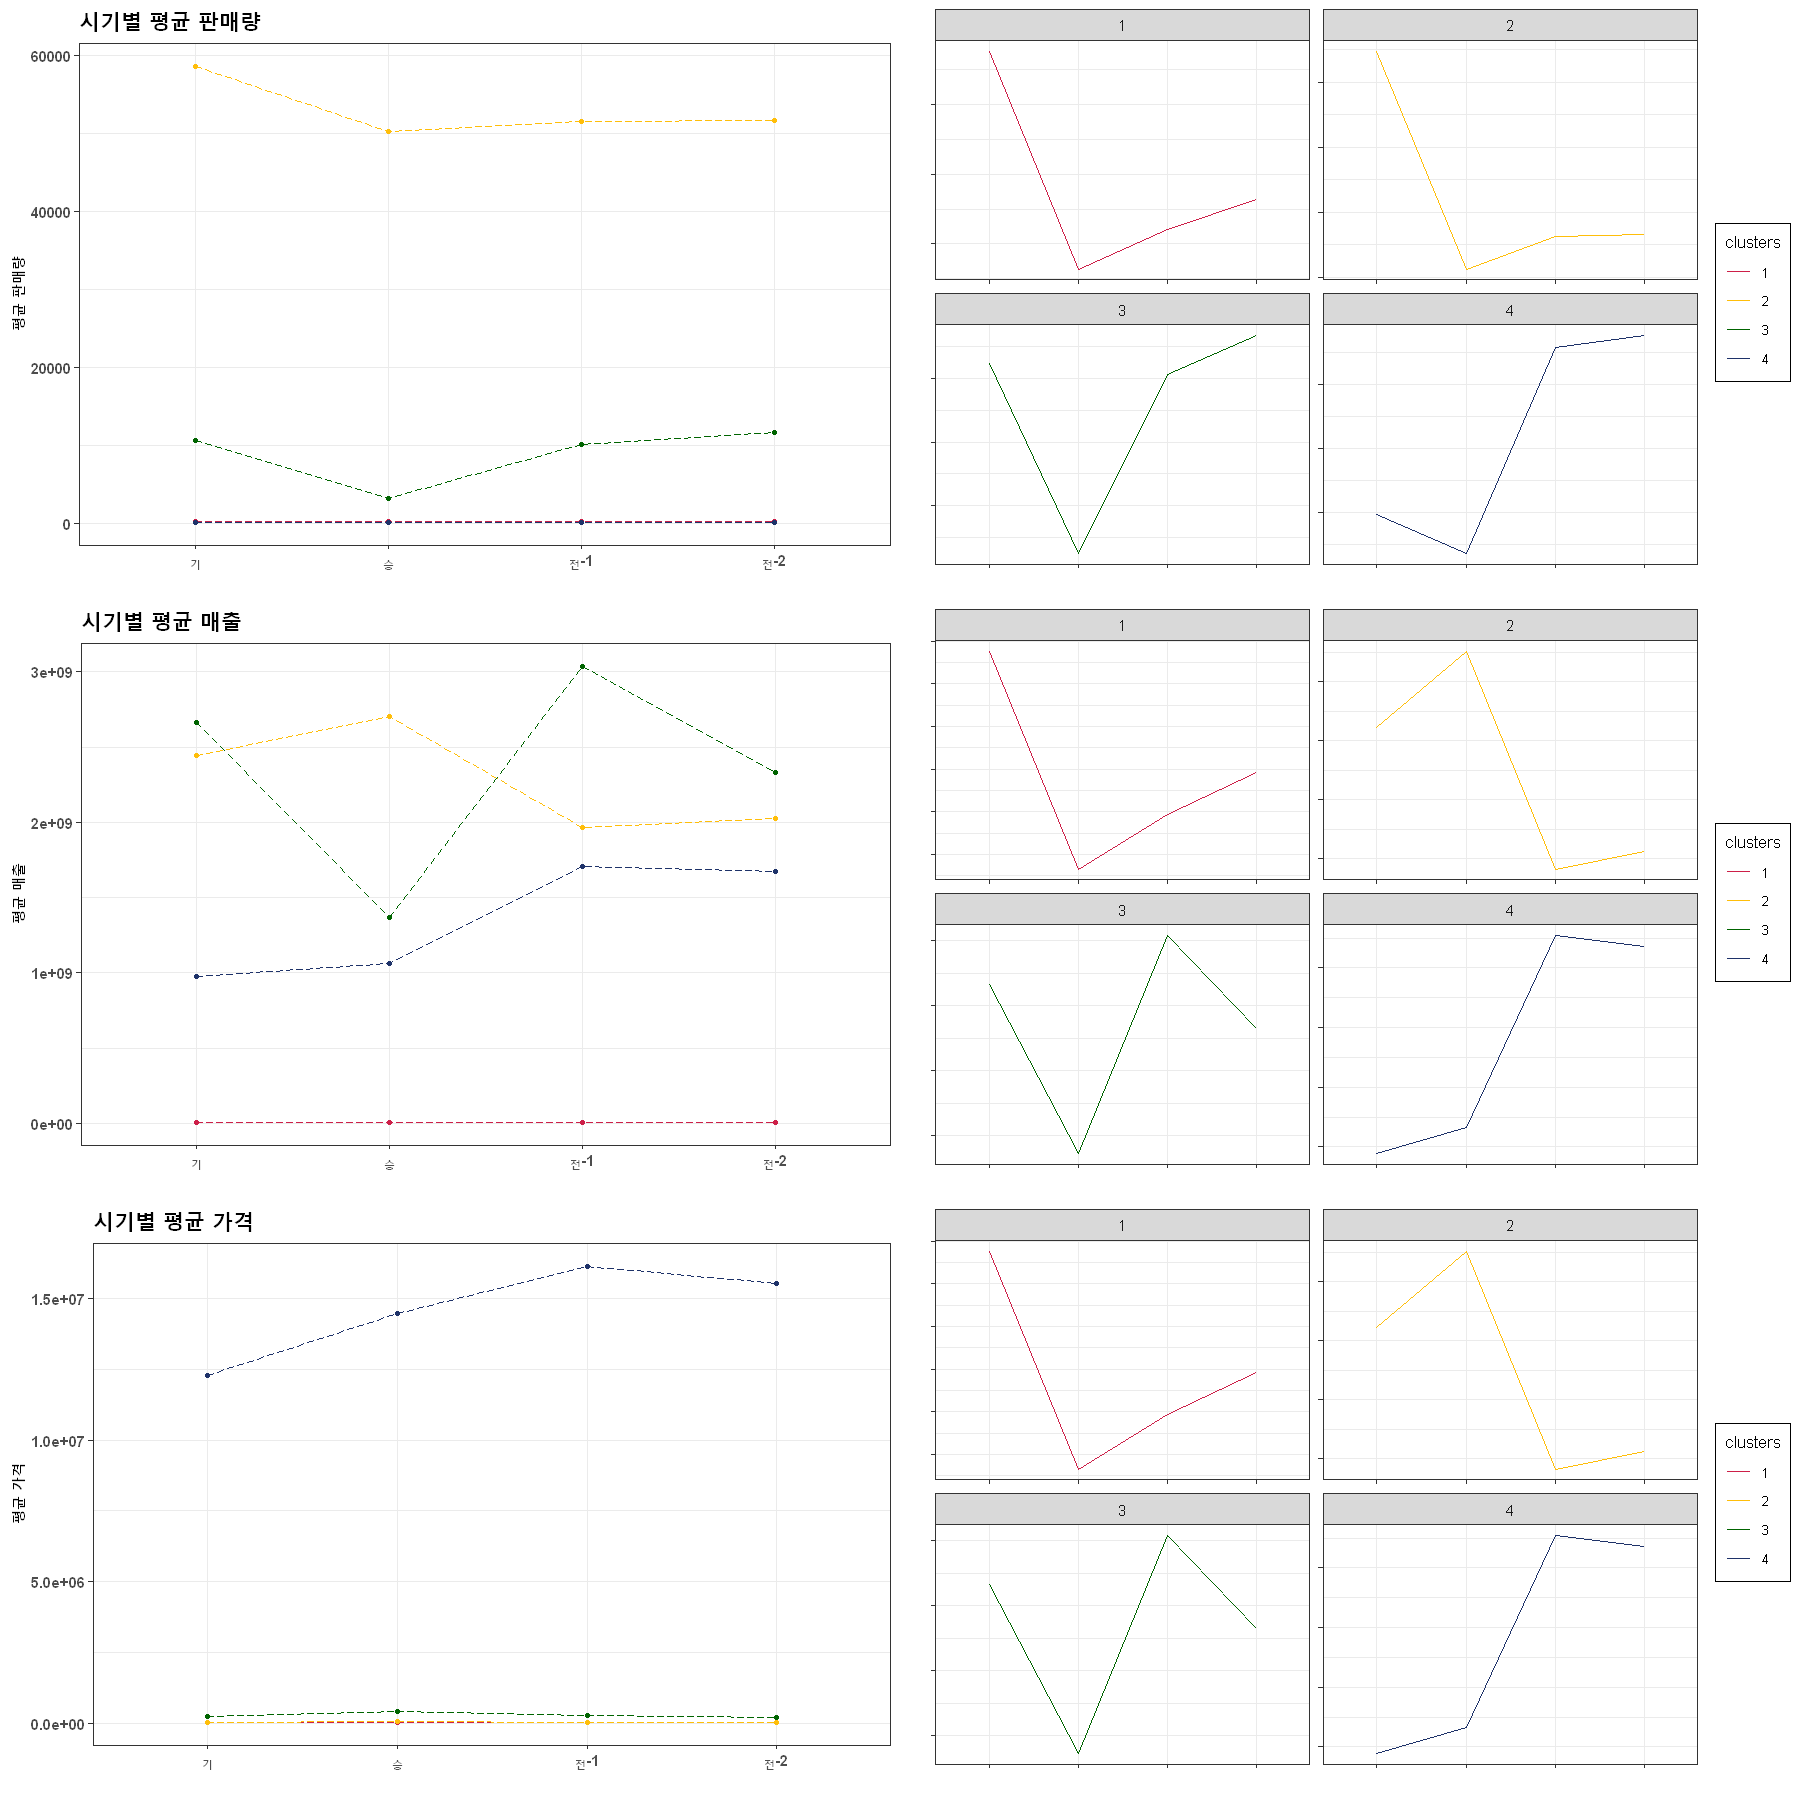

In [238]:
final_test_k = data_period %>% 
  left_join(data_clust) %>% 
  group_by(period, cluster) %>% 
  summarise(mean_amount = mean(selng_cascnt),
            mean_selling = mean(salamt),
            once_price = sum(salamt)/sum(selng_cascnt)
            ) %>% ungroup() %>% 
  select(c(period, cluster, mean_amount, mean_selling,once_price))

p1 <- final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_amount,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) +
geom_line(size=0.3,linetype="longdash")+geom_point(size=1)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13),
    legend.position = "none",
    text = element_text(face = "bold")) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 판매량",x="",title="시기별 평균 판매량")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))

p1_2 <-  final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_amount,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13,hjust = 0.5),legend.background = element_rect(color = 'black', size = 0.5),
    legend.title = element_text(face="plain",size=10),
    legend.text = element_text(size=8)) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 판매량",x="")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))+facet_wrap(~cluster,scales="free")+theme(axis.text.x=element_blank(),
                                                    axis.text.y=element_blank())+labs(y="",x="")

p2 <- final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_selling,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3,linetype="longdash")+
geom_point(size=1)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13),legend.position = "none",text = element_text(face = "bold")) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 매출",x="",title="시기별 평균 매출")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))

p2_2<-final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_selling,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13,hjust = 0.5),
    legend.background = element_rect(color = 'black', size = 0.5),
    legend.title = element_text(face="plain",size=10),
    legend.text = element_text(size=8)) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 매출",x="")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))+facet_wrap(~cluster,scales="free")+theme(axis.text.x=element_blank(),
                                                    axis.text.y=element_blank())+labs(y="",x="")
p3 <- final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = once_price,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3,linetype="longdash")+geom_point(size=1)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13),legend.position = "none",text = element_text(face = "bold")) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 가격",x="",title="시기별 평균 가격")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))


p3_2<-final_test_k %>%  ggplot(aes(x = as.factor(period), 
                                 y = mean_selling,
                                 group = as.factor(cluster), 
                                 color = as.factor(cluster))) + geom_line(size=0.3)+theme_bw()+theme(
    axis.title = element_text(face = "bold",size =11),
    title = element_text(face="bold",size=13,hjust = 0.5),
    legend.background = element_rect(color = 'black', size = 0.5),
    legend.title = element_text(face="plain",size=10),
    legend.text = element_text(size=8)
    ) +
    scale_color_manual(values=c('#CD1F48','#FFBE0A',"#006400",'#1E3269'))+labs(
        color = "clusters",y="평균 가격",x="")+ 
    scale_x_discrete(labels = c("기","승","전-1","전-2"))+facet_wrap(~cluster,scales="free")+theme(axis.text.x=element_blank(),
                                                    axis.text.y=element_blank())+labs(y="",x="")
gridExtra::grid.arrange(p1,p1_2,p2,p2_2,p3,p3_2, ncol = 2, nrow = 3)

In [241]:
data_period %>% left_join(data_clust) %>% filter(cluster == 1) %>% select(mrhst_induty_cl_nm) %>% unique()

Joining, by = "mrhst_induty_cl_nm"



,mrhst_induty_cl_nm
,<chr>
1,약국
2,치과의원
3,한의원
4,의원
5,자동차정비
6,보습학원
7,일반 서적
8,정장
9,슈퍼 마켓


In [243]:
data_period %>% left_join(data_clust) %>% filter(cluster == 2) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)


Joining, by = "mrhst_induty_cl_nm"



"인터넷P/G, 택 시"


In [244]:
data_period %>% left_join(data_clust) %>% filter(cluster == 3) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)

Joining, by = "mrhst_induty_cl_nm"



"조세서비스(특약), 이동통신요금"


In [245]:
data_period %>% left_join(data_clust) %>% filter(cluster == 3) %>% select(mrhst_induty_cl_nm) %>% unique() %>% matrix(nrow=1)

Joining, by = "mrhst_induty_cl_nm"



"조세서비스(특약), 이동통신요금"


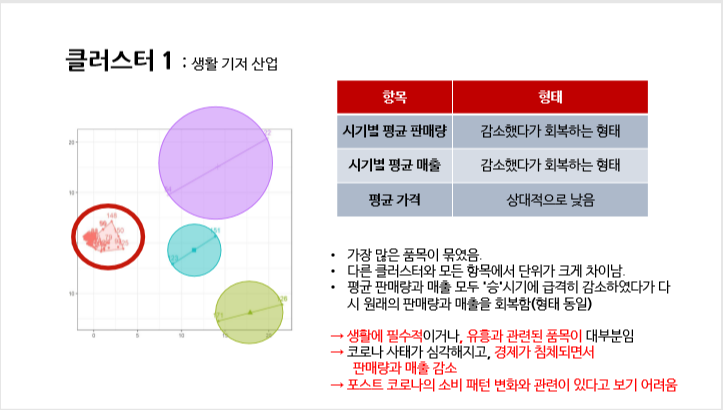

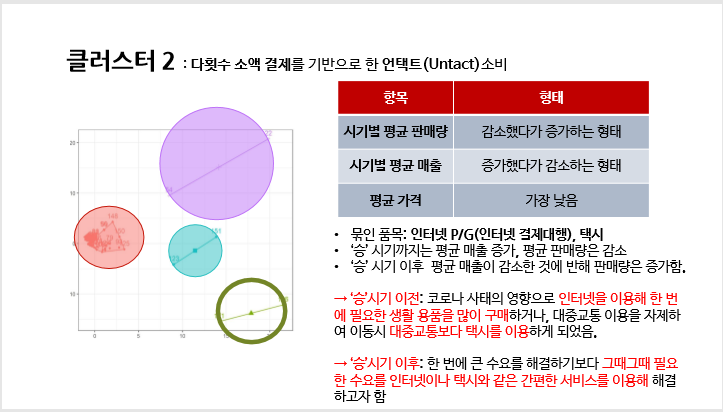

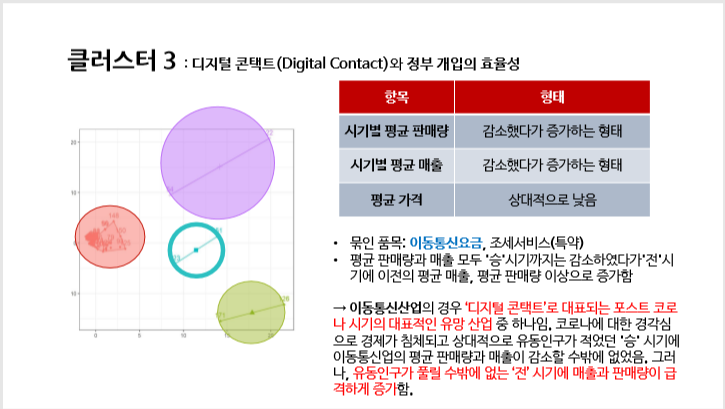

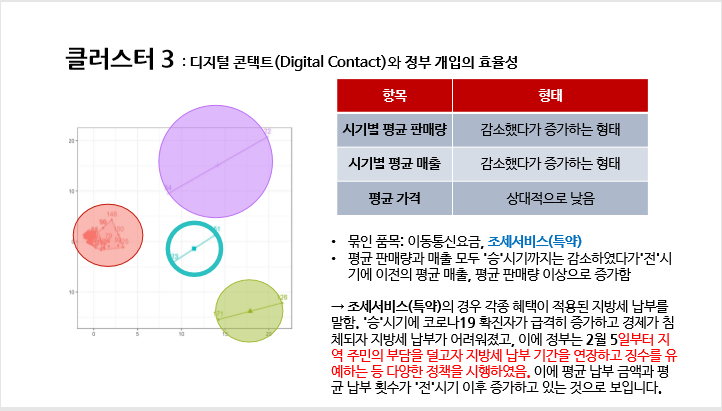

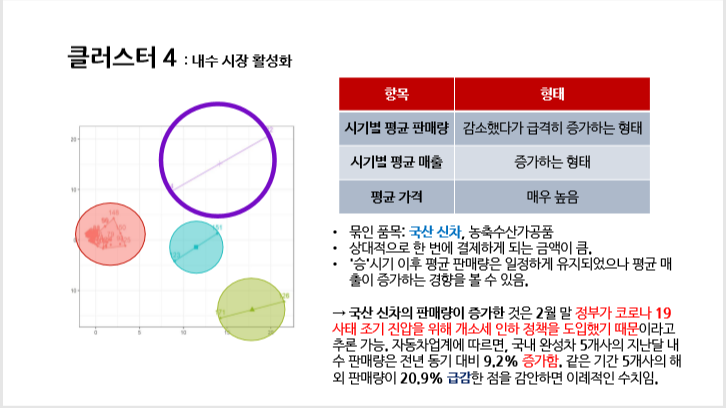

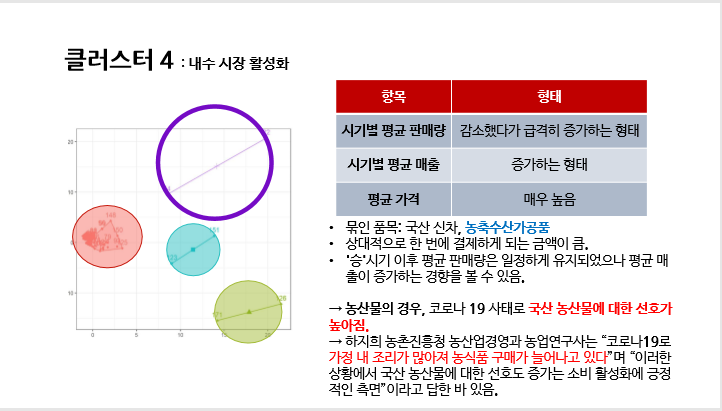

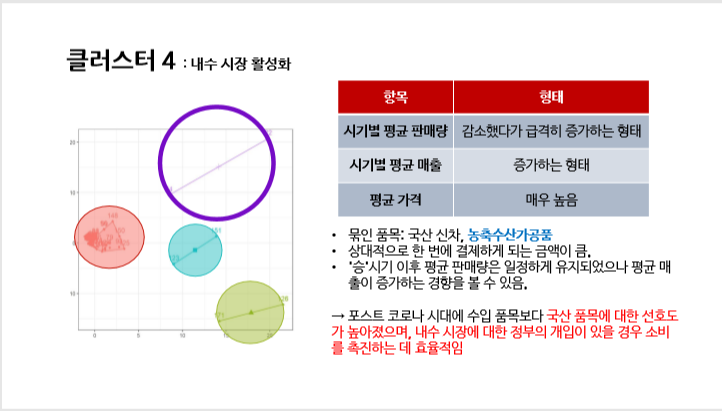

# Card data로 유망 산업 살펴보기_시계열 Factor Analysis 시각화

In [246]:

card <- card %>% 
        filter(! (selng_cascnt %in% grep('[ㄱ-힣]',unique(card$selng_cascnt), value = T)),
               ! (salamt %in% grep('[ㄱ-힣]',unique(card$salamt), value = T))) %>% 
        mutate(selng_cascnt = as.numeric(selng_cascnt),
               salamt = as.numeric(salamt),
               receipt_dttm = ymd(receipt_dttm)) %>% 
        select(-c(adstrd_code, mrhst_induty_cl_code))

card$selng_cascnt = ifelse(card$selng_cascnt < 0, 0, card$selng_cascnt)
card$salamt = ifelse(card$salamt < 0, 0, card$salamt)

In [247]:
card

receipt_dttm,adstrd_nm,mrhst_induty_cl_nm,selng_cascnt,salamt
<date>,<chr>,<chr>,<dbl>,<dbl>
2020-01-04,성내3동,약국,463,5843230
2020-01-04,성내3동,치과의원,33,7835550
2020-01-04,성내3동,한의원,53,4589800
2020-01-04,성내3동,의원,339,9267240
2020-01-04,성내3동,자동차정비,19,4441000
2020-01-04,성내3동,기타 교육,54,1446900
2020-01-04,성내3동,보습학원,12,3876000
2020-01-04,성내3동,일반 서적,58,1292090
2020-01-04,성내3동,정장,13,743000


In [248]:
#########################################
## CARD 품목별 NA(결제 안된 일수) 확인 ##
#########################################

card_amount = card %>%  
  group_by(receipt_dttm, mrhst_induty_cl_nm) %>% 
  summarize(mean_amount = mean(selng_cascnt)) %>% 
  ungroup() %>% 
  spread(key = mrhst_induty_cl_nm, value = mean_amount) 

data_missing = card_amount[,-1] %>% is.na() %>% colSums() %>% as_tibble()
data_missing = cbind(colnames(card_amount)[-1], data_missing)
colnames(data_missing) = c('name', 'num_missing')

`summarise()` regrouping output by 'receipt_dttm' (override with `.groups` argument)



In [249]:
data_missing %>% head()

,name,num_missing
,<chr>,<dbl>
1,1급 호텔,7
2,2급 호텔,5
3,CATV,18
4,CATV홈쇼핑,0
5,L P G,18
6,P2P송금,153


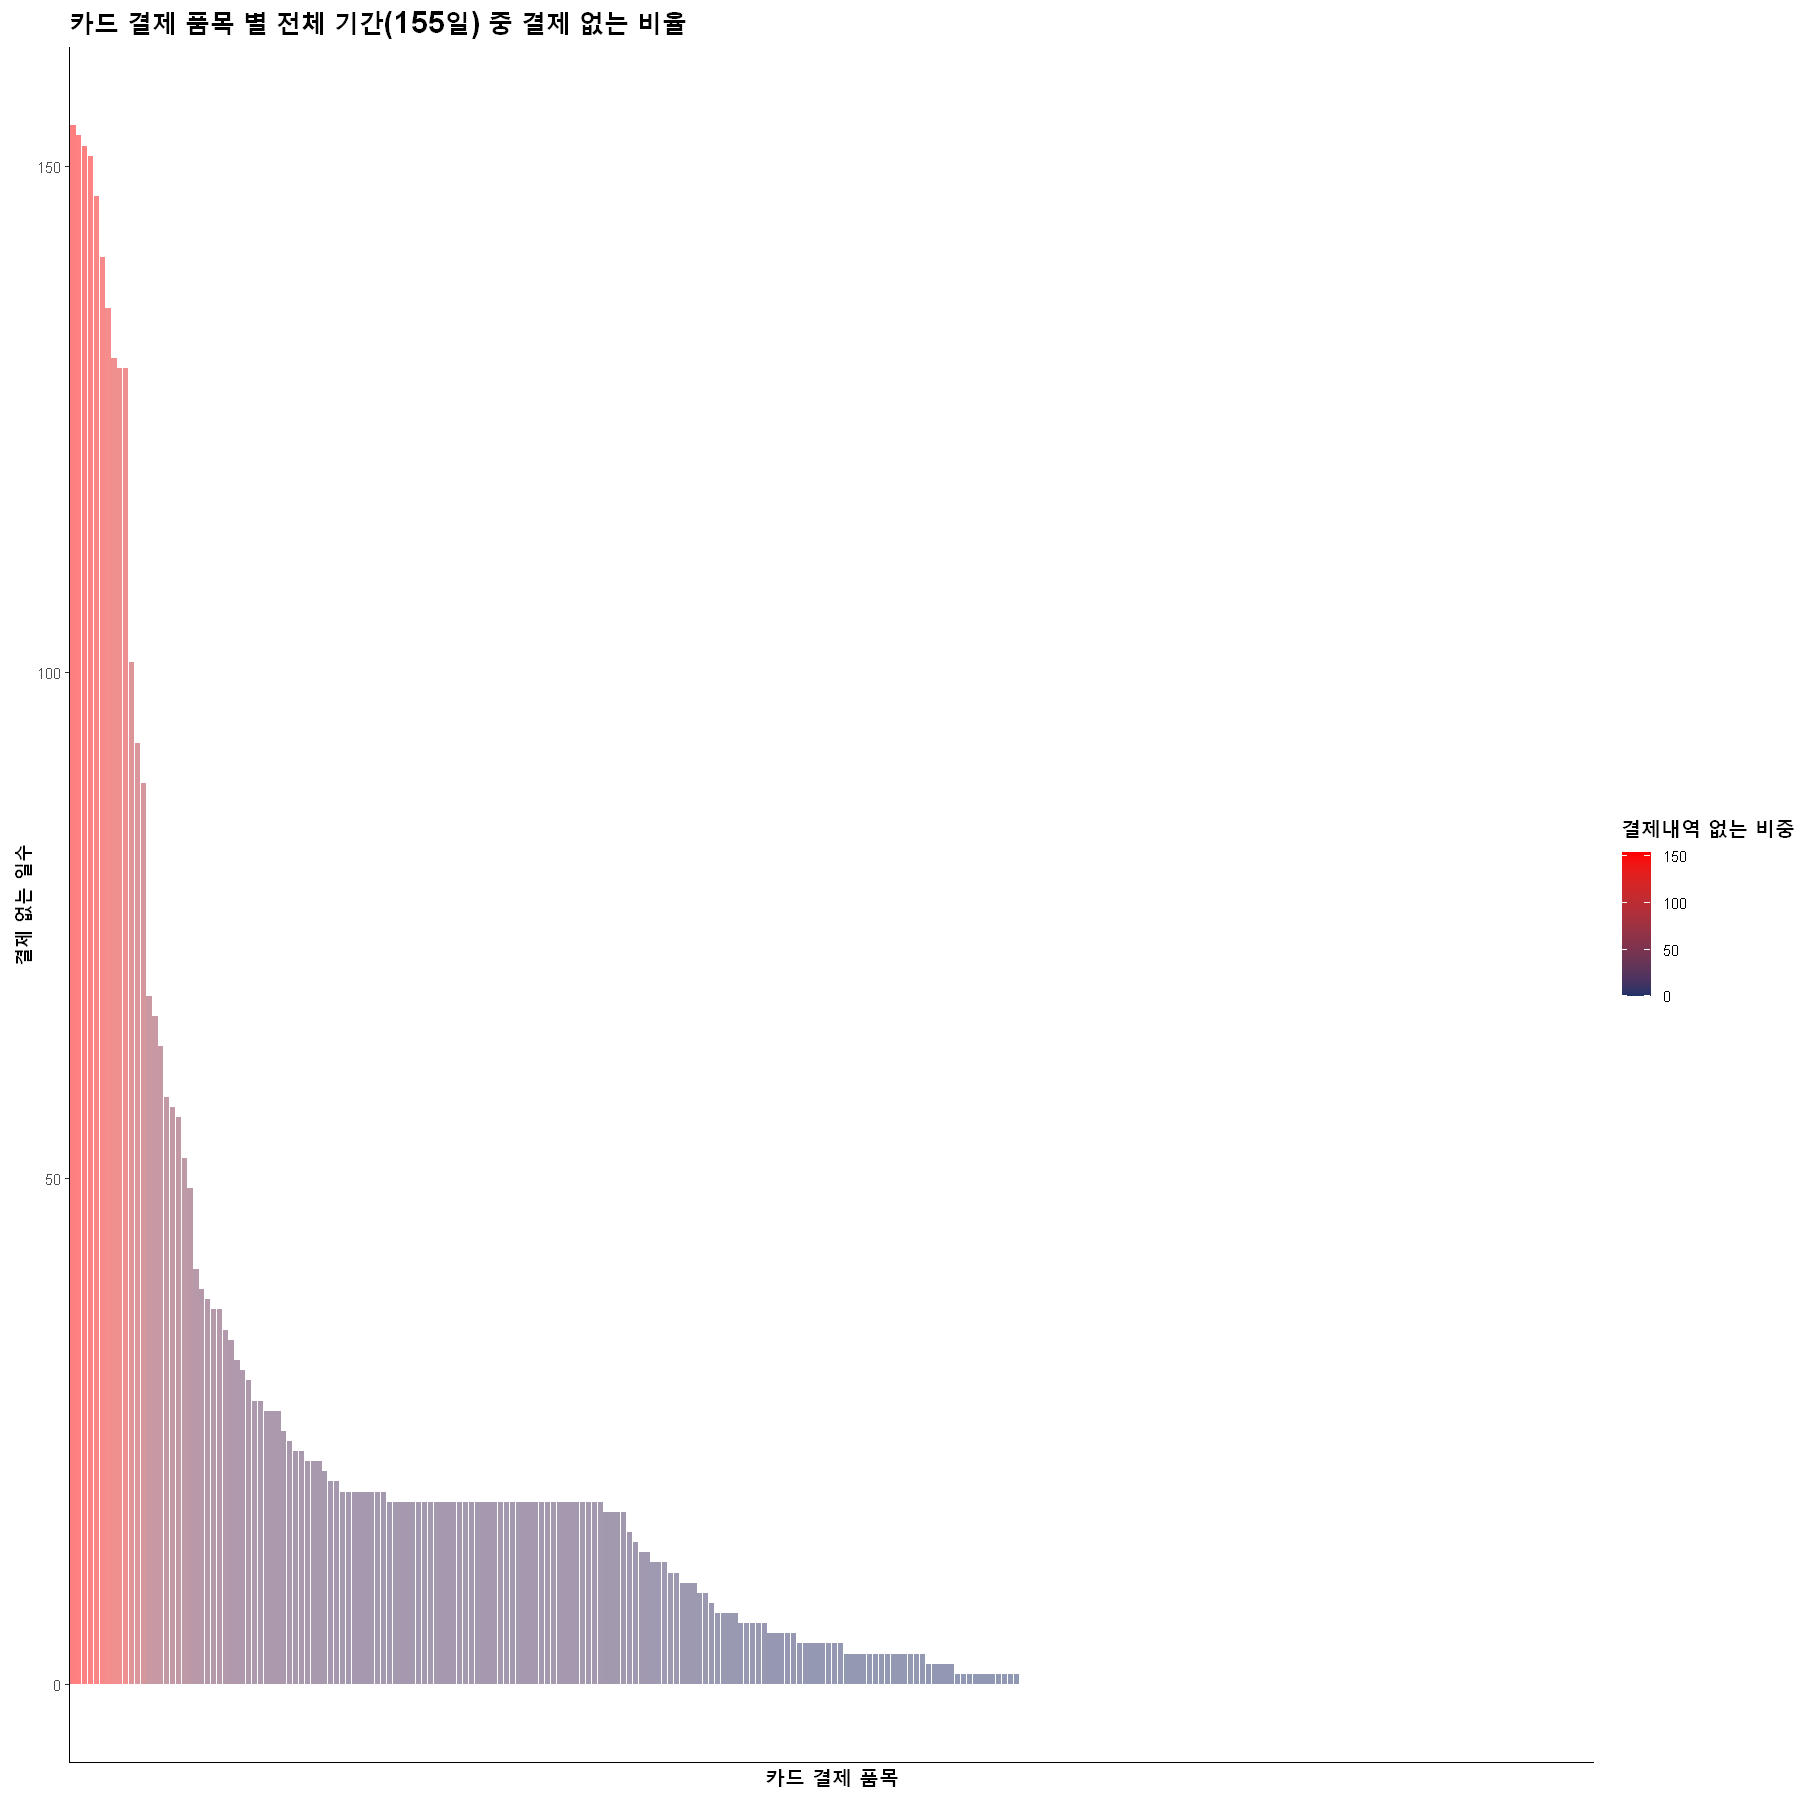

In [250]:
data_missing %>% 
  ggplot(aes(x = reorder(name, -num_missing), y = num_missing)) +
  geom_col(aes(fill = num_missing), alpha = 0.5) +
  scale_fill_gradient('결제내역 없는 비중', low = "#1E3269", high = "red") +
      scale_x_discrete(breaks = NULL) +
      labs(x = '카드 결제 품목', y = '결제 없는 일수') +
      ggtitle('카드 결제 품목 별 전체 기간(155일) 중 결제 없는 비율') +
      theme_classic() +
      theme(title = element_text(size = 15, face = 'bold'))

시계열 FA 를 시작하기 앞서, 분석에 Noise가 될 수 있는 품목들을 추려 보았습니다

전체 155일 기간중 NA가 큰 품목은 155일 중 결제 기록이 상당 부분 없다 는 것을 의미합니다.

이에 저희는 적합한 분석을 위해 NA가 많은 품목들은 제외하고 시계열 FA를 진행했습니다.

사실상 NA는 0으로 간주하는 것이 타당할 수 있으나, 시계열 FA의 경우 0이 많은 품목들은 Noise로 작용해 분석이 올바르게 진행되지 않을 수 있고 전체 기간 중 결제 기록이 많이 없는 품목은 유망 품목이라 보기 어려우므로 제거하고 진행했습니다.

##  CARD 품목별 Time Series Plot

In [251]:
## NA 비중 큰 품목 제거 및 시계열 데이터 화 ##
card_amount = card_amount[colSums(is.na(card_amount)) < 10] # NA값이 10개 미만인 애들
card_amount[is.na(card_amount)] <- 0 #na 값은 0으로
card_day <- card_amount[,-1] %>% ts(freq = 365.25)

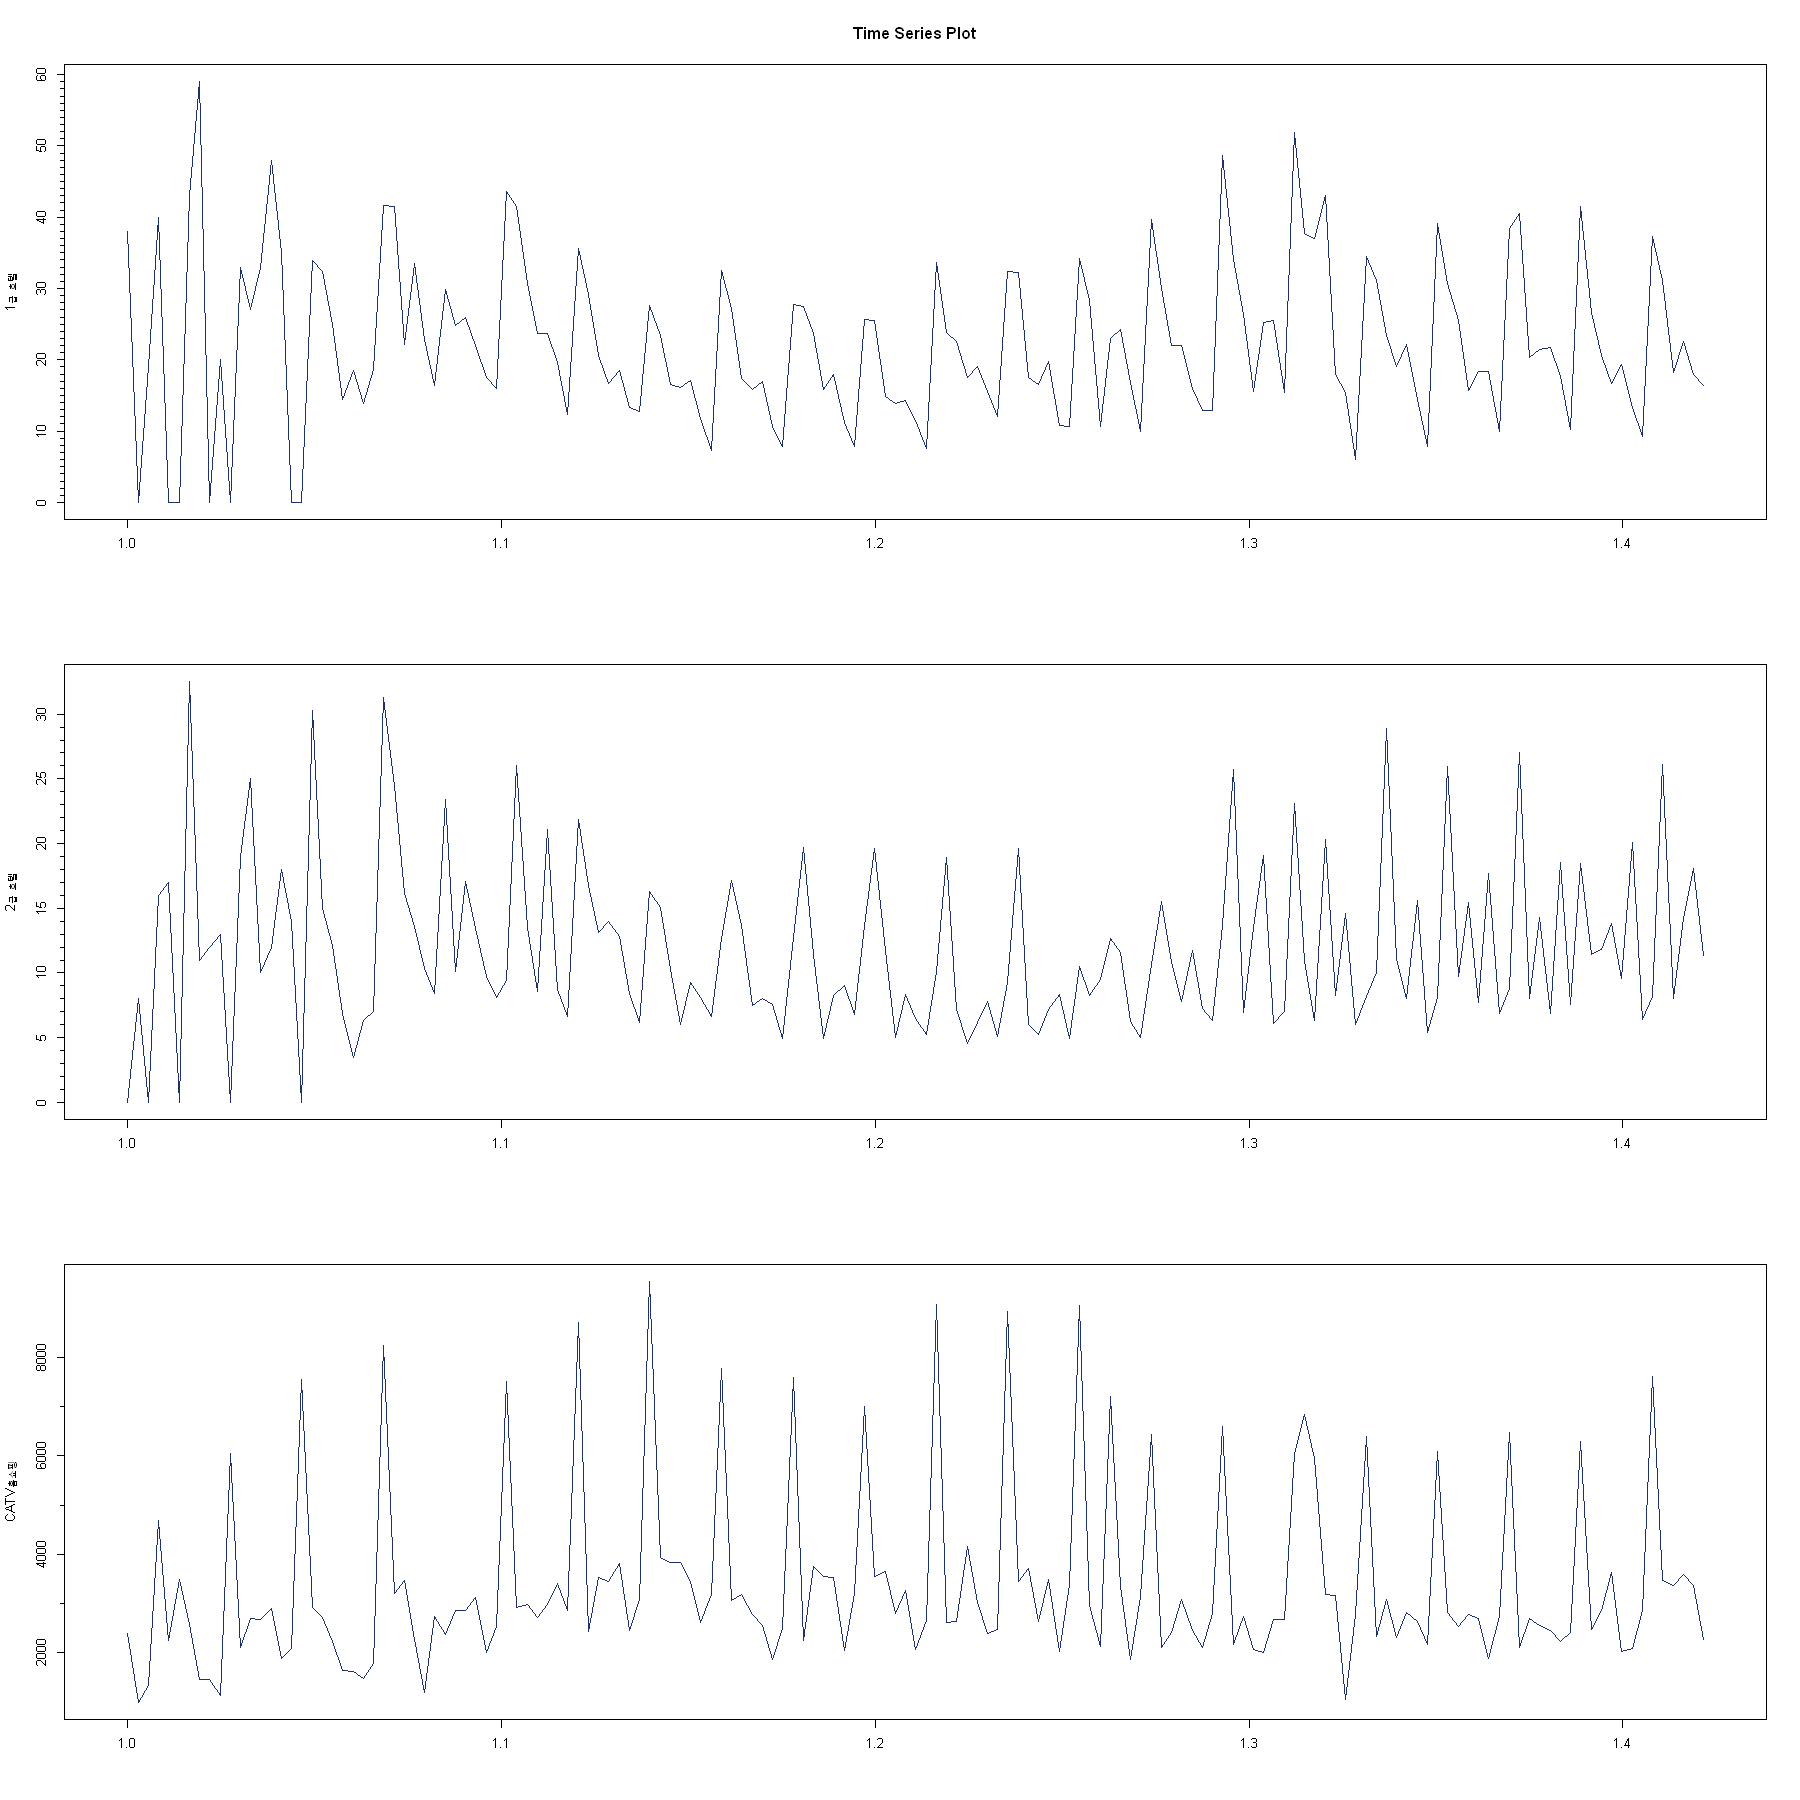

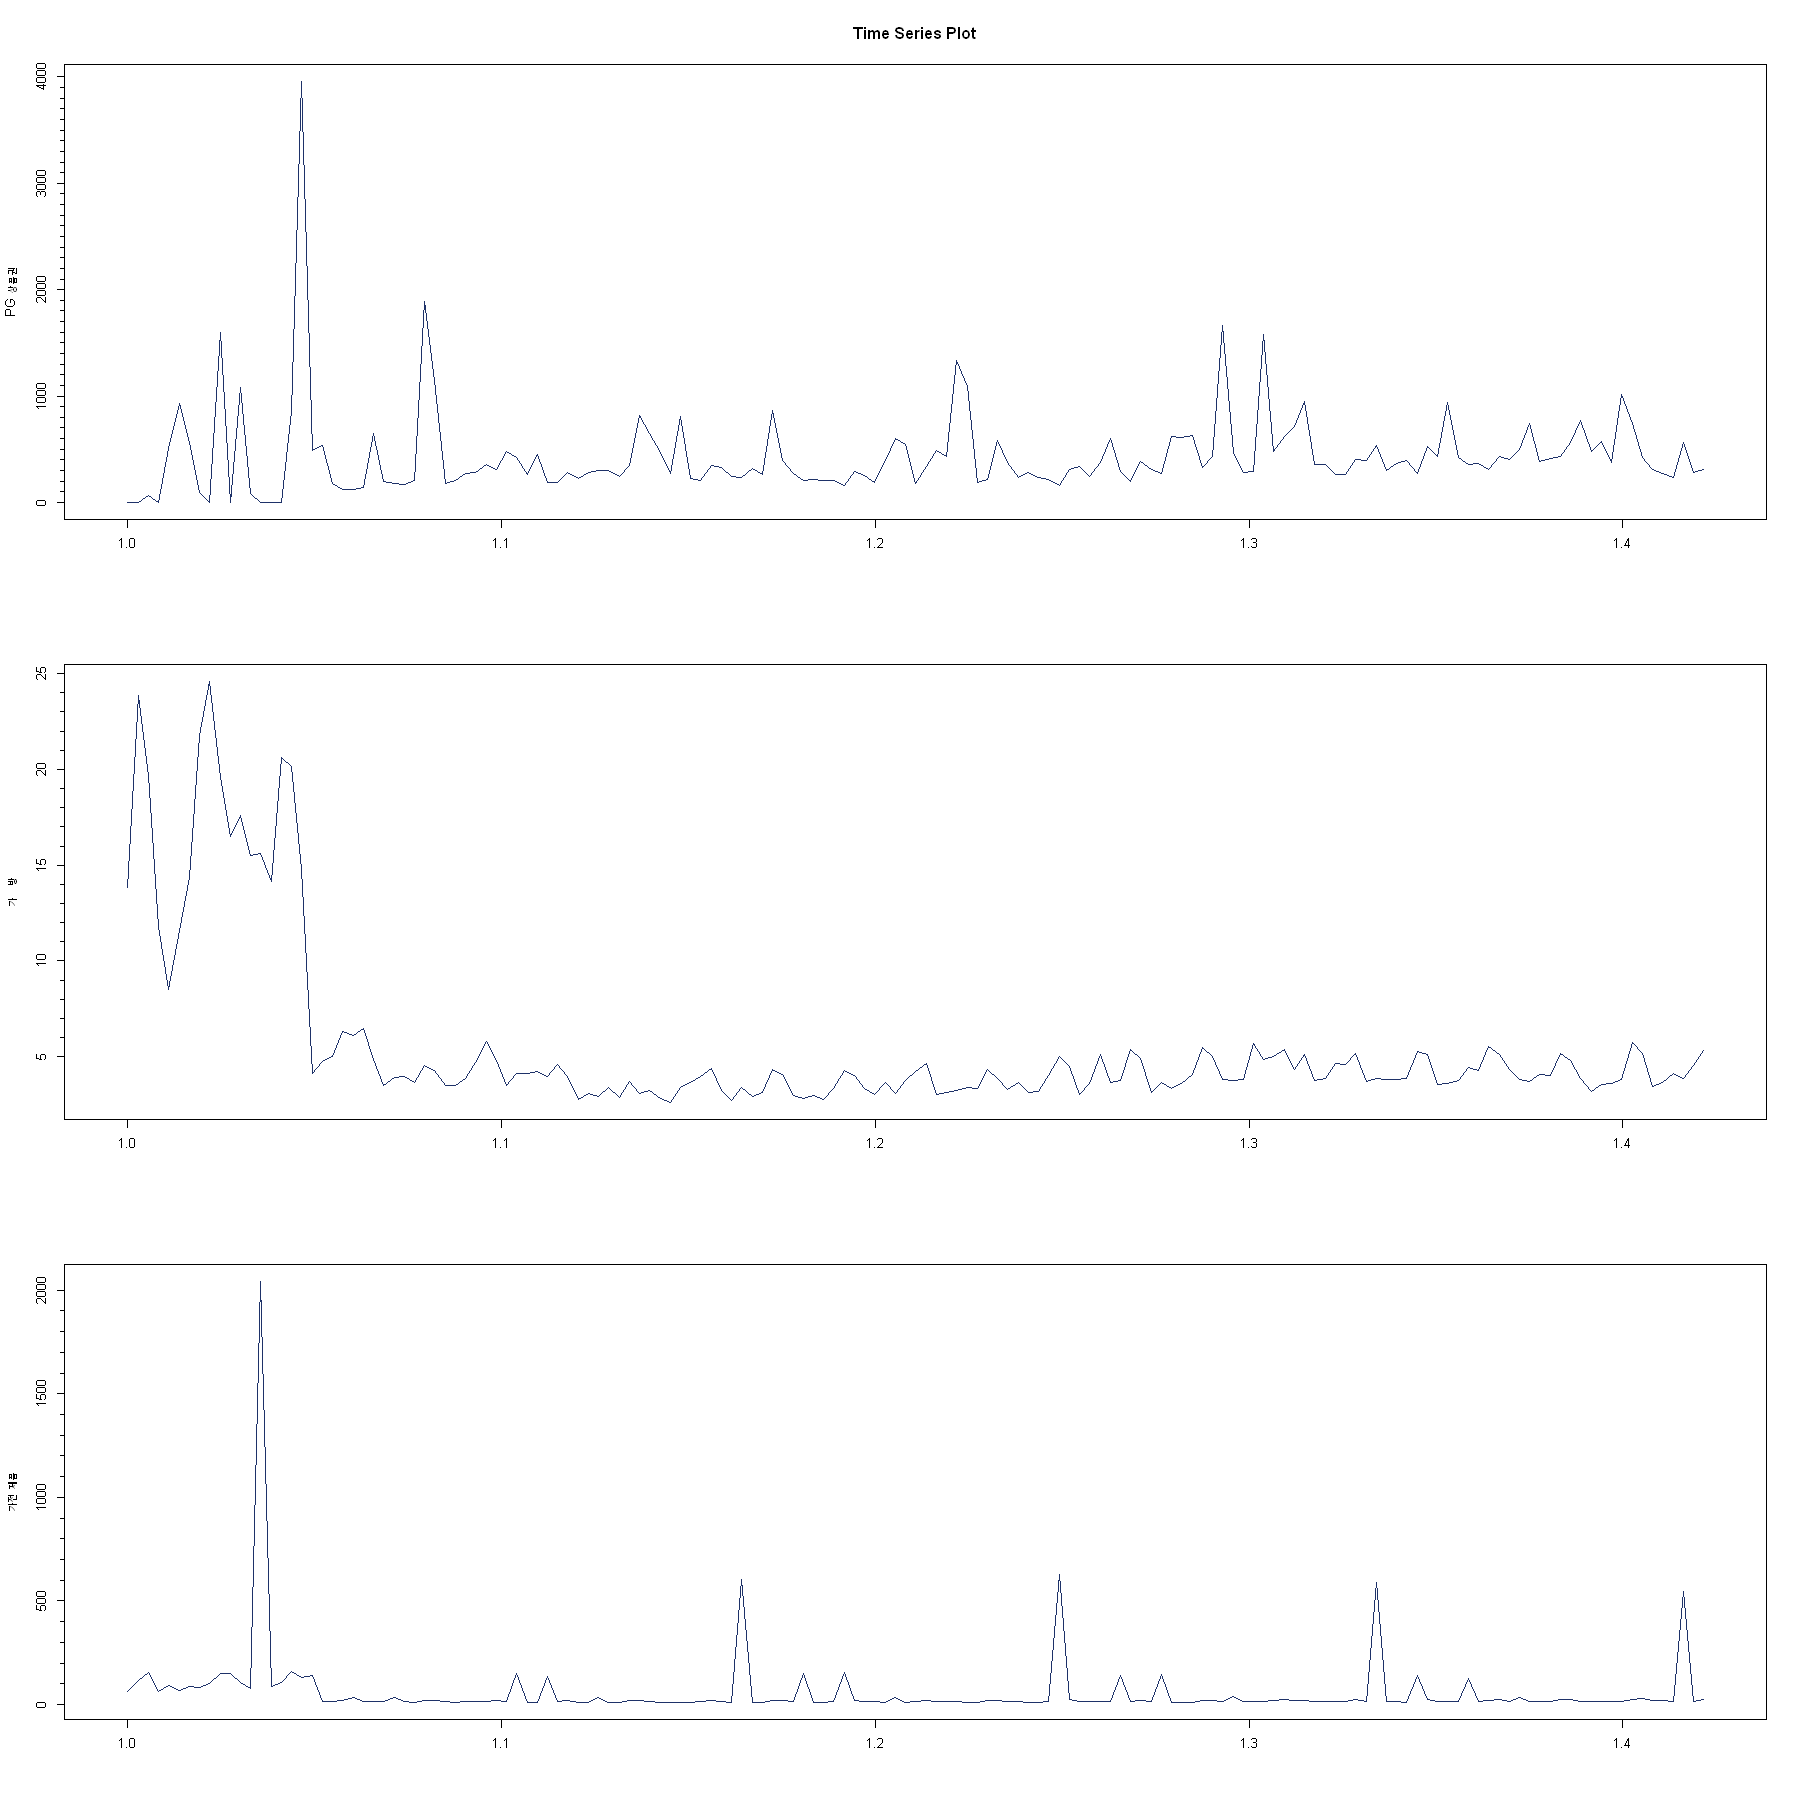

In [252]:
## Time Series Plot 확인 ##
par(mfrow = c(1,2))
tfplot(card_day[,1:3], graphs.per.page = 3, Title = "Time Series Plot",col = c("#1E3269"))
tfplot(card_day[,4:6], graphs.per.page = 3, Title = "Time Series Plot",col = c("#1E3269"))

## Eigen value를 통한 Factor 개수 결정

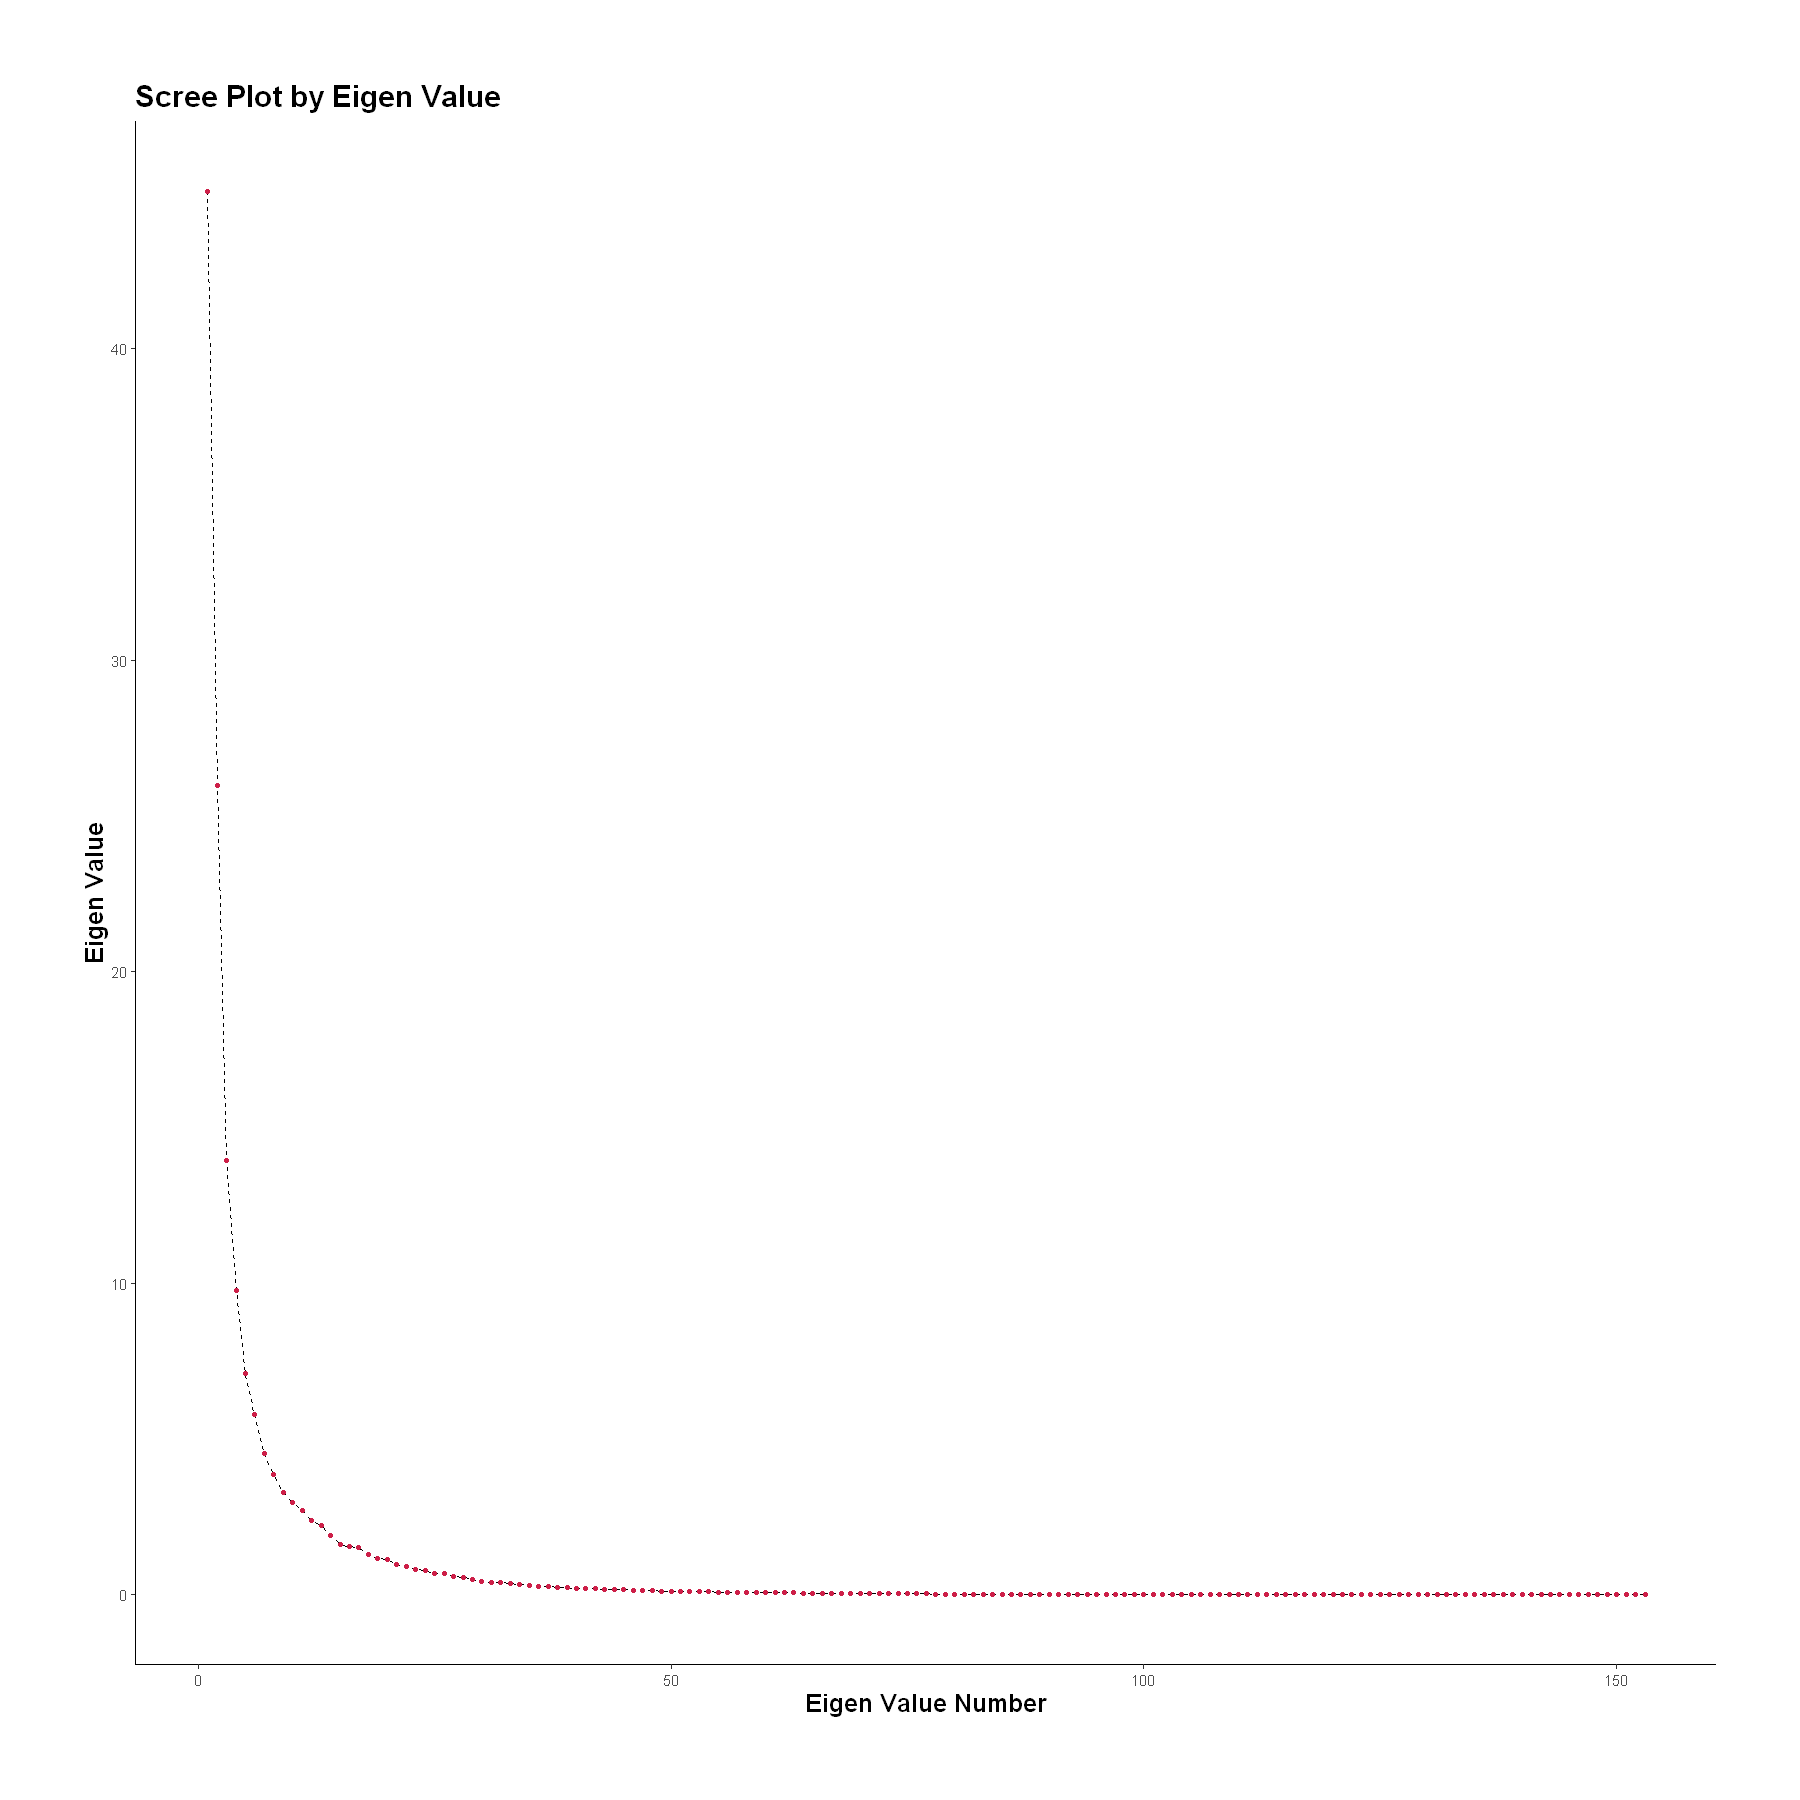

In [253]:
## Eigen value를 통한 Factor 개수 결정 ## 
DX <- diff(card_day, lag = 1)
xx <- eigen(cor(diff(card_day, lag = 1)), symmetric = TRUE)[["values"]]
data.frame('eigen_value' = xx, 'index' = 1:153) %>% 
  ggplot(aes(x = index, y = xx)) + 
  geom_line(linetype = 'dashed', color = 'black', size = 0.5) +
  geom_point(col = '#CD1F48', size = 1.2) + 
  labs(x = 'Eigen Value Number', y = 'Eigen Value') +
  ggtitle('Scree Plot by Eigen Value') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold'),plot.margin = margin(50,50,50,50))

Factor의 개수를 정하기 위해 각 품목별 Eigen Value 값들을 확인햇습니다.
저희는 9개의 Factor를 사용하기로 결정했습니다.

## 시계열 Factor Analysis(요인분석) 시각화

In [254]:
card_fa <- estTSF.ML(card_day, 9, rotation = "quartimin", normalize =  TRUE)

Warning message in estFAmodel(Sigma, p, n.obs = (Tobs(y) - diff.), est = "factanal", :
"Data variances are very different. Consider rescaling some indicators."
Warning message in GPFoblq(L, Tmat = Tmat, method = "quartimin", normalize = normalize, :
"convergence not obtained in GPFoblq. 1000 iterations used."


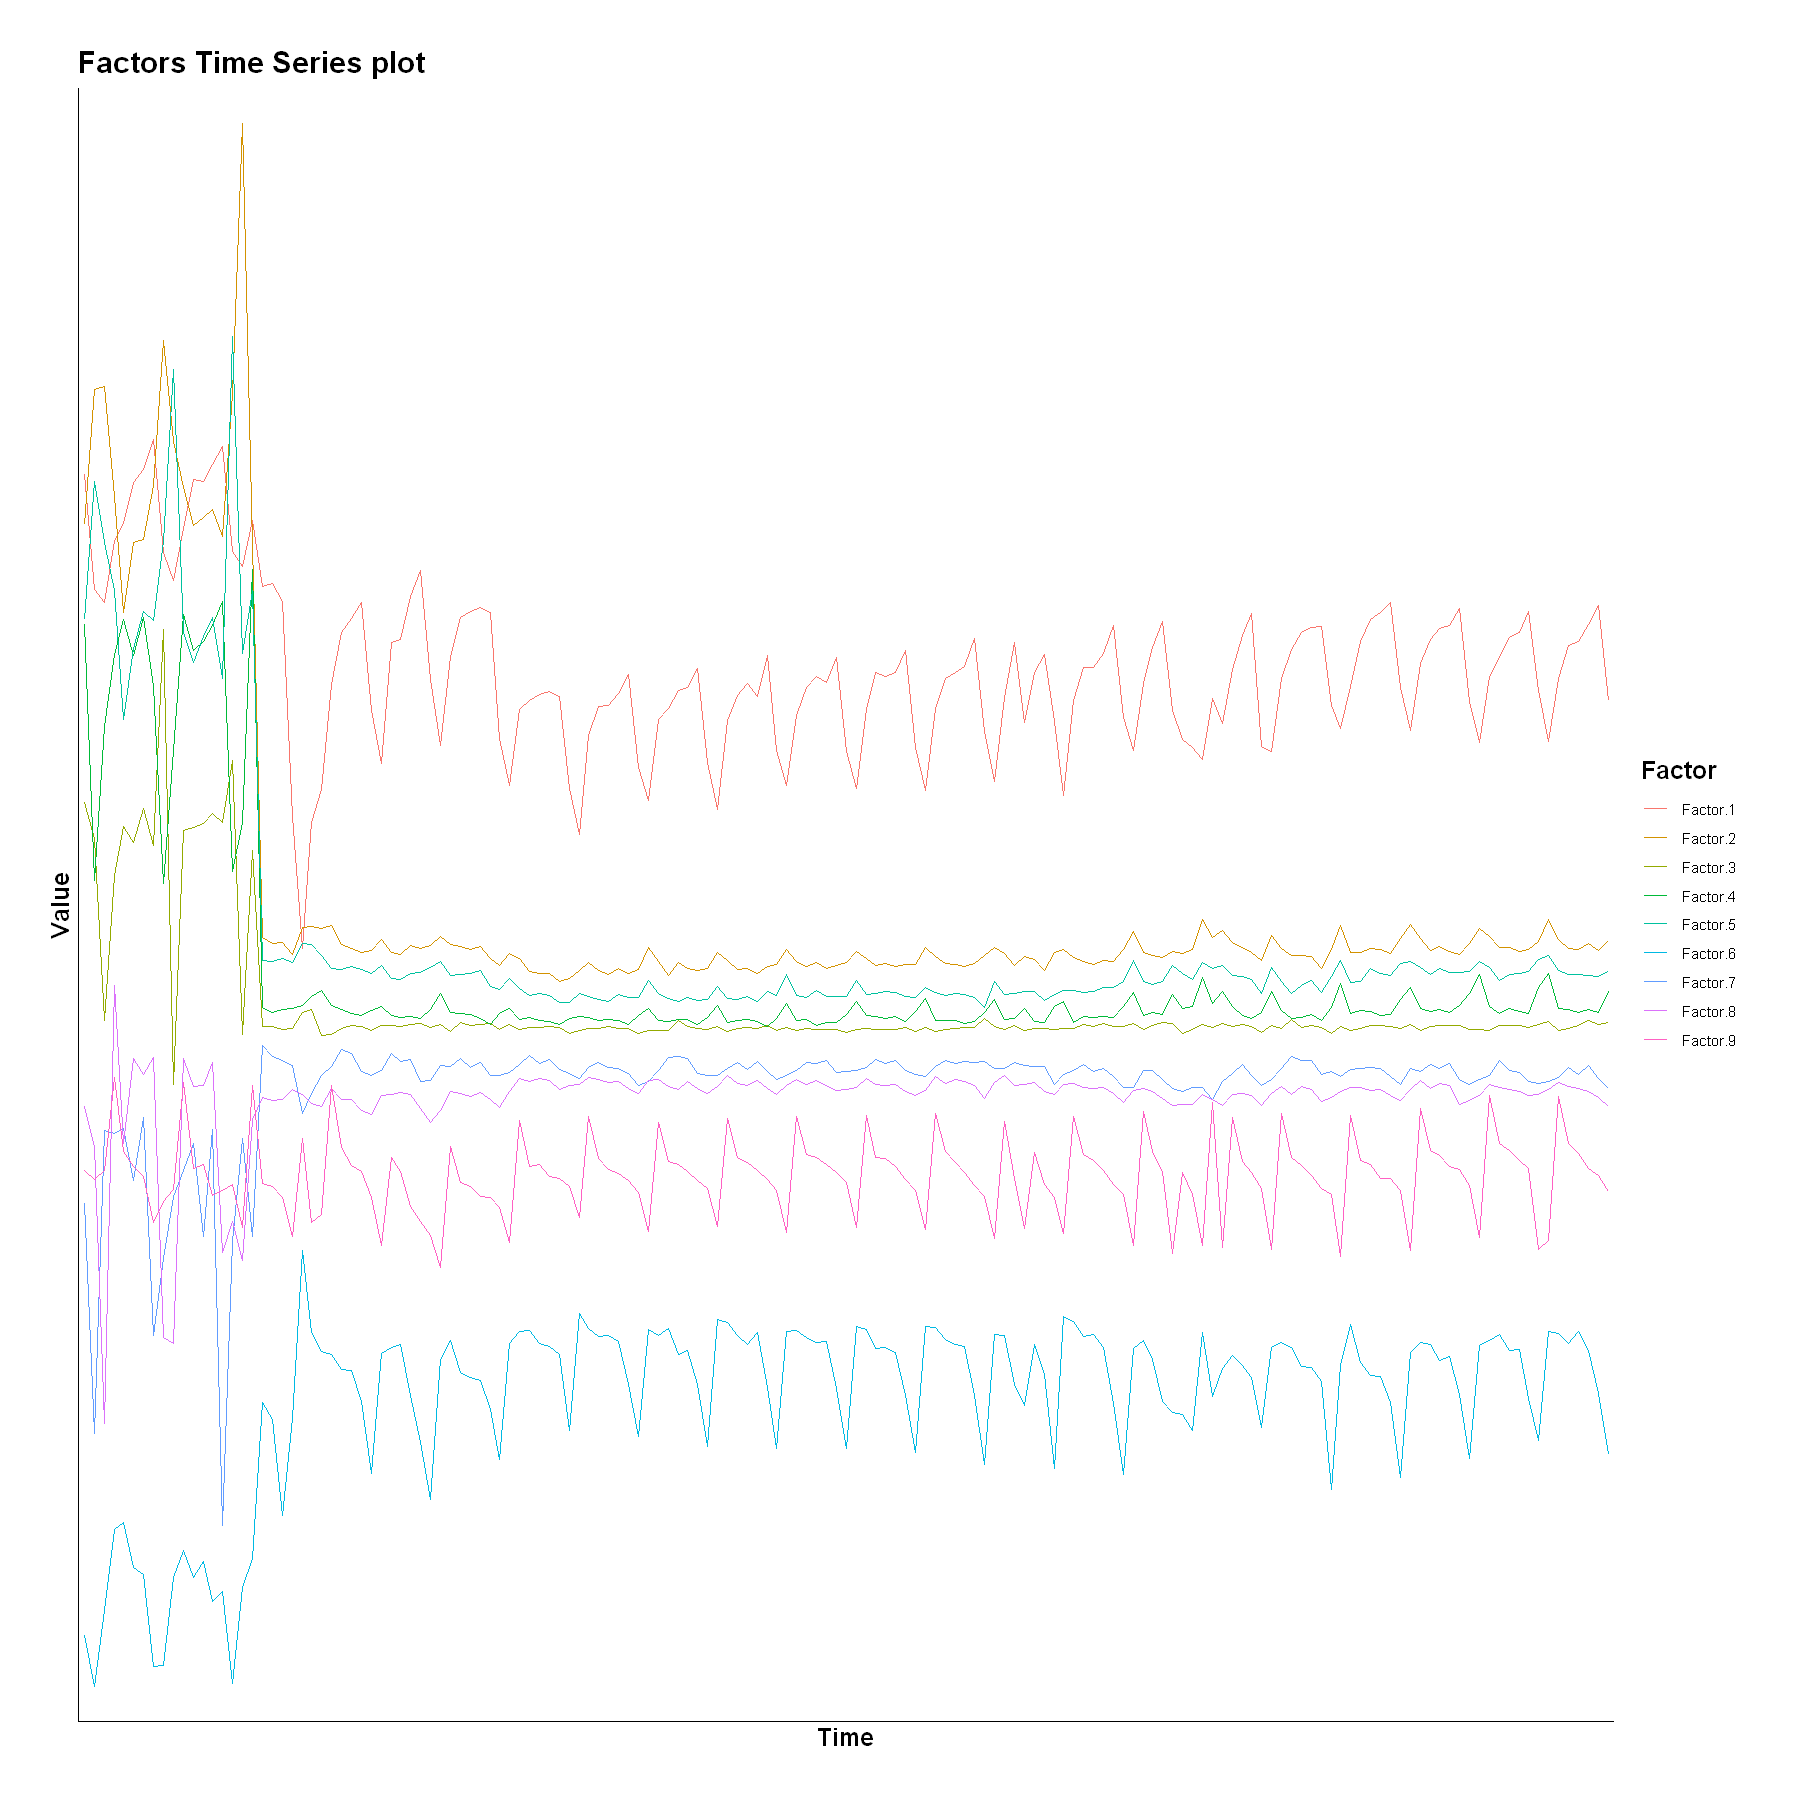

In [255]:
data.frame(factors(card_fa), 'time' = 1:155) %>% 
  gather(key = 'Factor', value = 'value', -time) %>% 
  ggplot(aes(x = time, y = value, color = Factor)) + 
  geom_line() +
  labs(x = 'Time', y = 'Value') +
  ggtitle('Factors Time Series plot') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold'),plot.margin =margin(30,30,30,30)) +
  scale_x_discrete(breaks = NULL) +
  scale_y_discrete(breaks = NULL)

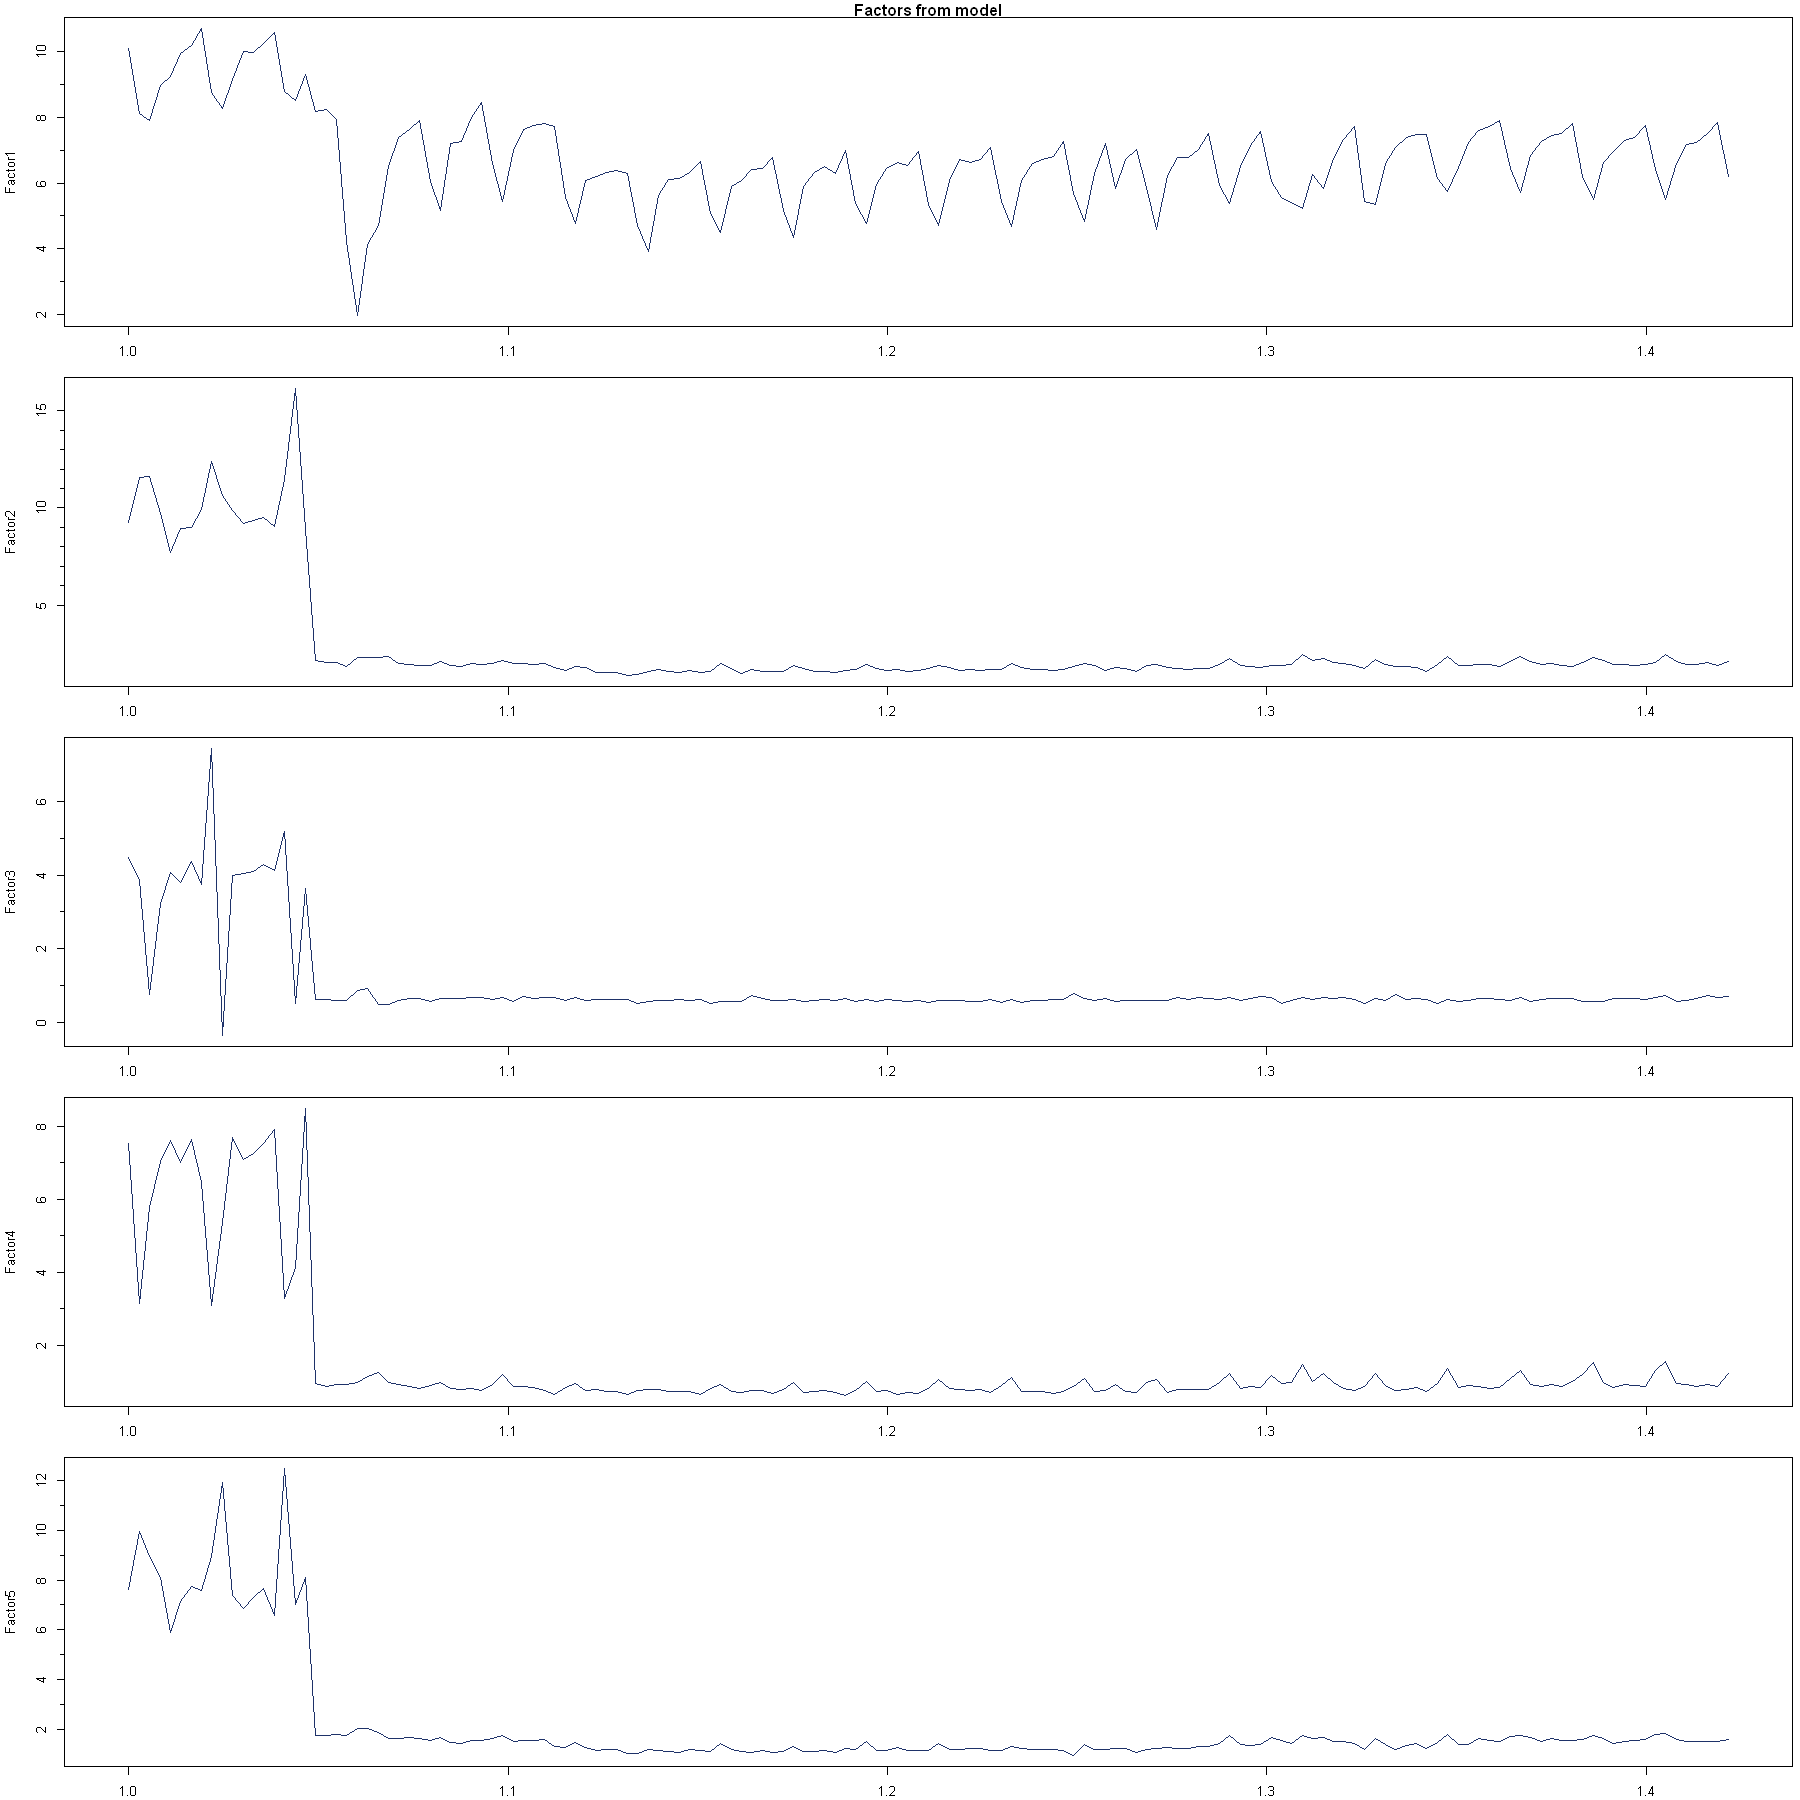

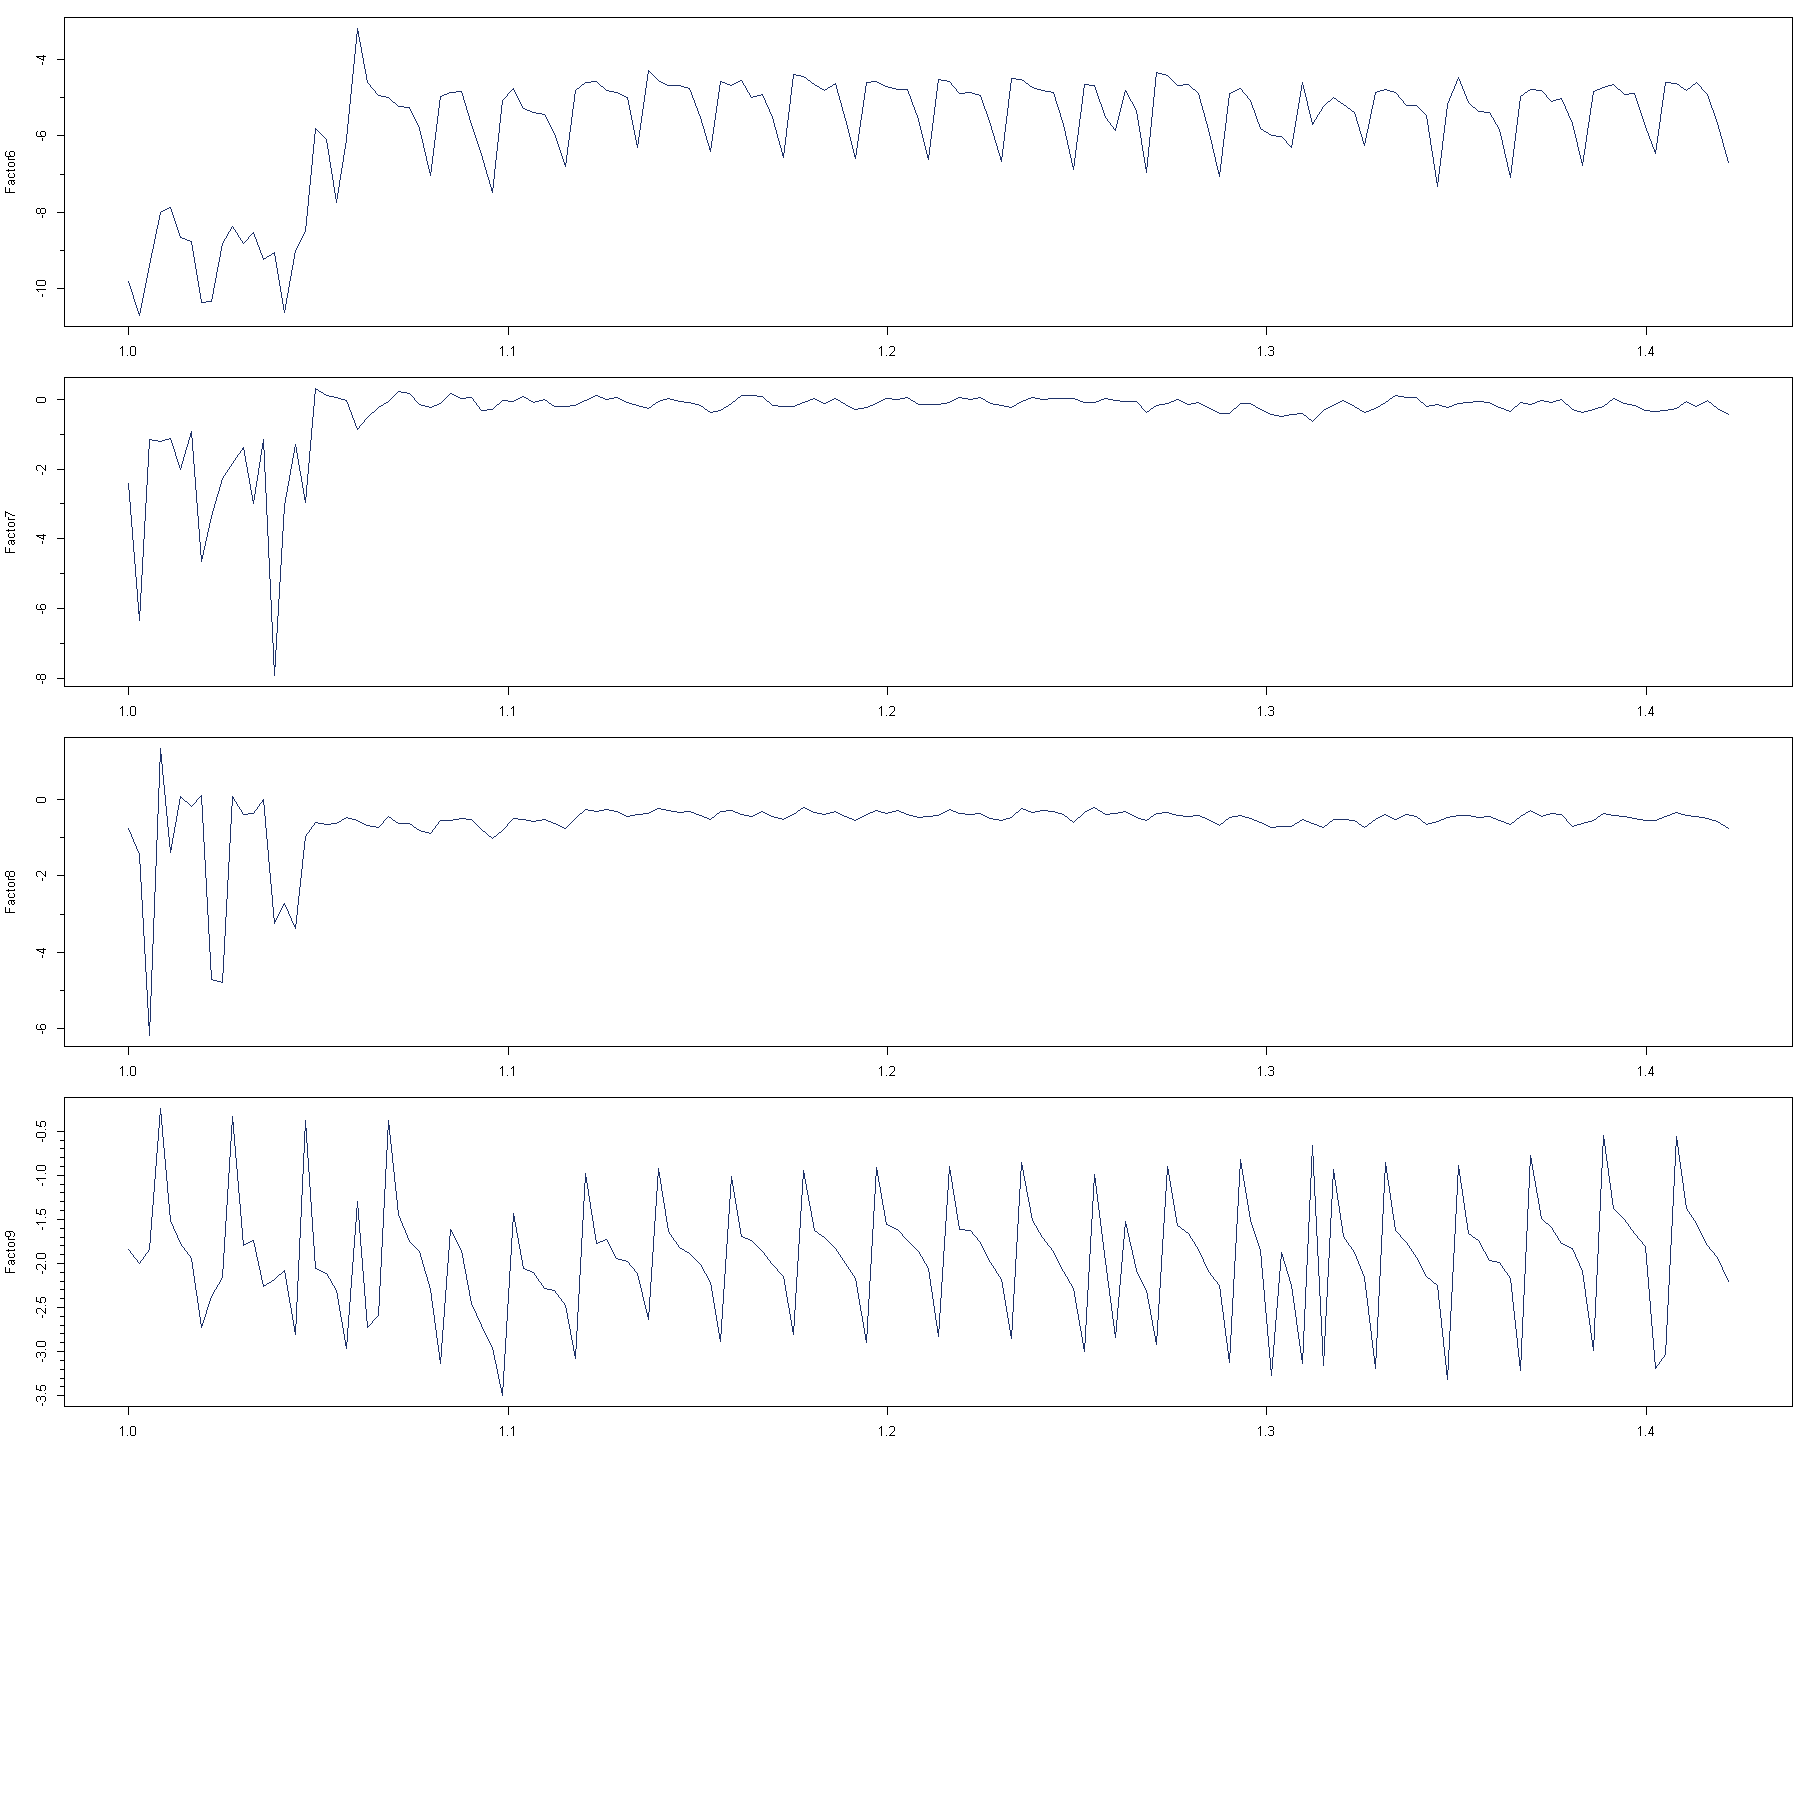

In [256]:
tfplot(factors(card_fa),
       Title = "Factors from model", lty = c("solid"), col = c("#1E3269"),
       xlab = c(""), ylab = c("Factor1", "Factor2", "Factor3", "Factor4",
                              "Factor5", "Factor6", "Factor7", "Factor8", "Factor9"),
       par = list(mar = c(2.1, 4.1, 1.1, 0.5)), reset.screen = TRUE)

시계열 FA 를 통해 공통된 9개의 잠재적인 시계열 요인들을 추출해 냈습니다.

저희는 9개의 잠재적 요인 중 증가하는 추세를 가진 Factor6과 Factor7 를 좀 더 면밀히 살펴봤습니다.

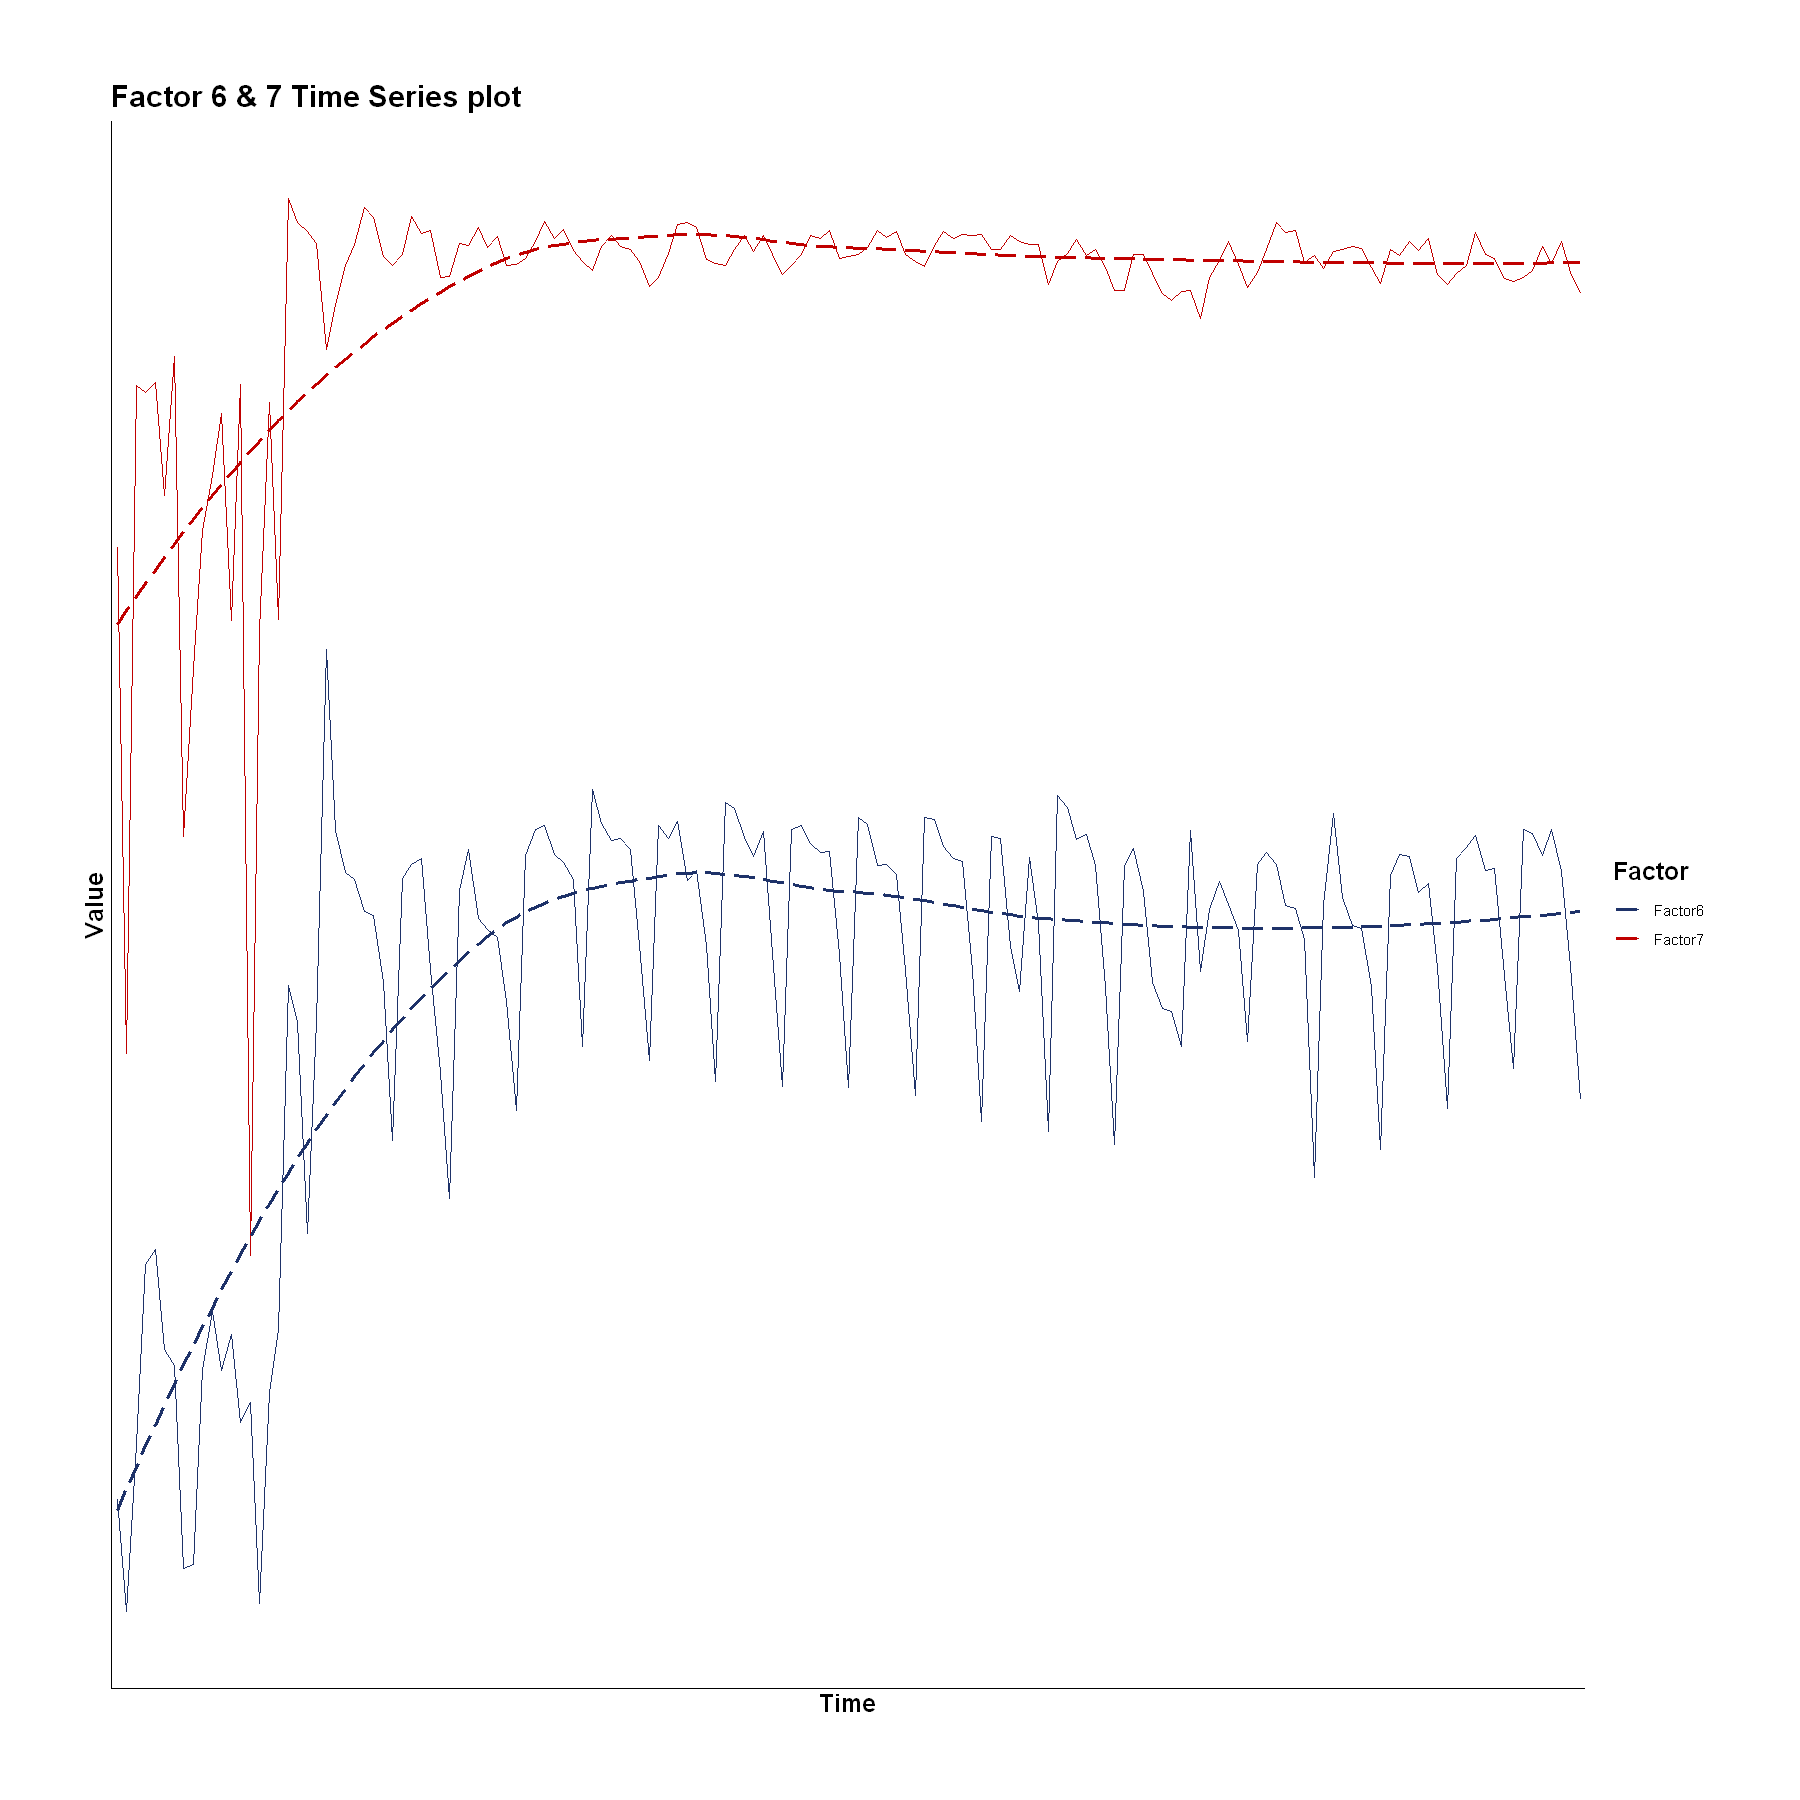

In [257]:
data.frame(factors(card_fa), 'time' = 1:155) %>% 
  gather(key = 'Factor', value = 'value', -time) %>% 
  filter(Factor %in% c('Factor.6', 'Factor.7')) %>% 
  ggplot(aes(x = time, y = value, color = Factor)) + 
  geom_line() +
  geom_smooth(method = 'loess', formula = y~x, se = FALSE, linetype = 'longdash') +
  labs(x = 'Time', y = 'Value') +
  ggtitle('Factor 6 & 7 Time Series plot') +
  theme_classic() +
  theme(title = element_text(size = 15, face = 'bold'),plot.margin = margin(50,50,50,50)) +
  scale_x_discrete(breaks = NULL) +
  scale_y_discrete(breaks = NULL)+scale_color_manual(values=c( "#1E3269","#c00000"),labels =c('Factor6', 'Factor7'))

Factor 6와 7 은 확실히 증가하는 추세 를 확인할 수 있습니다.

Loading Matrix 값을 통해 어떤 품목이 해당 Factor들에 큰 영향을 끼쳤는지 확인 해보겠습니다.

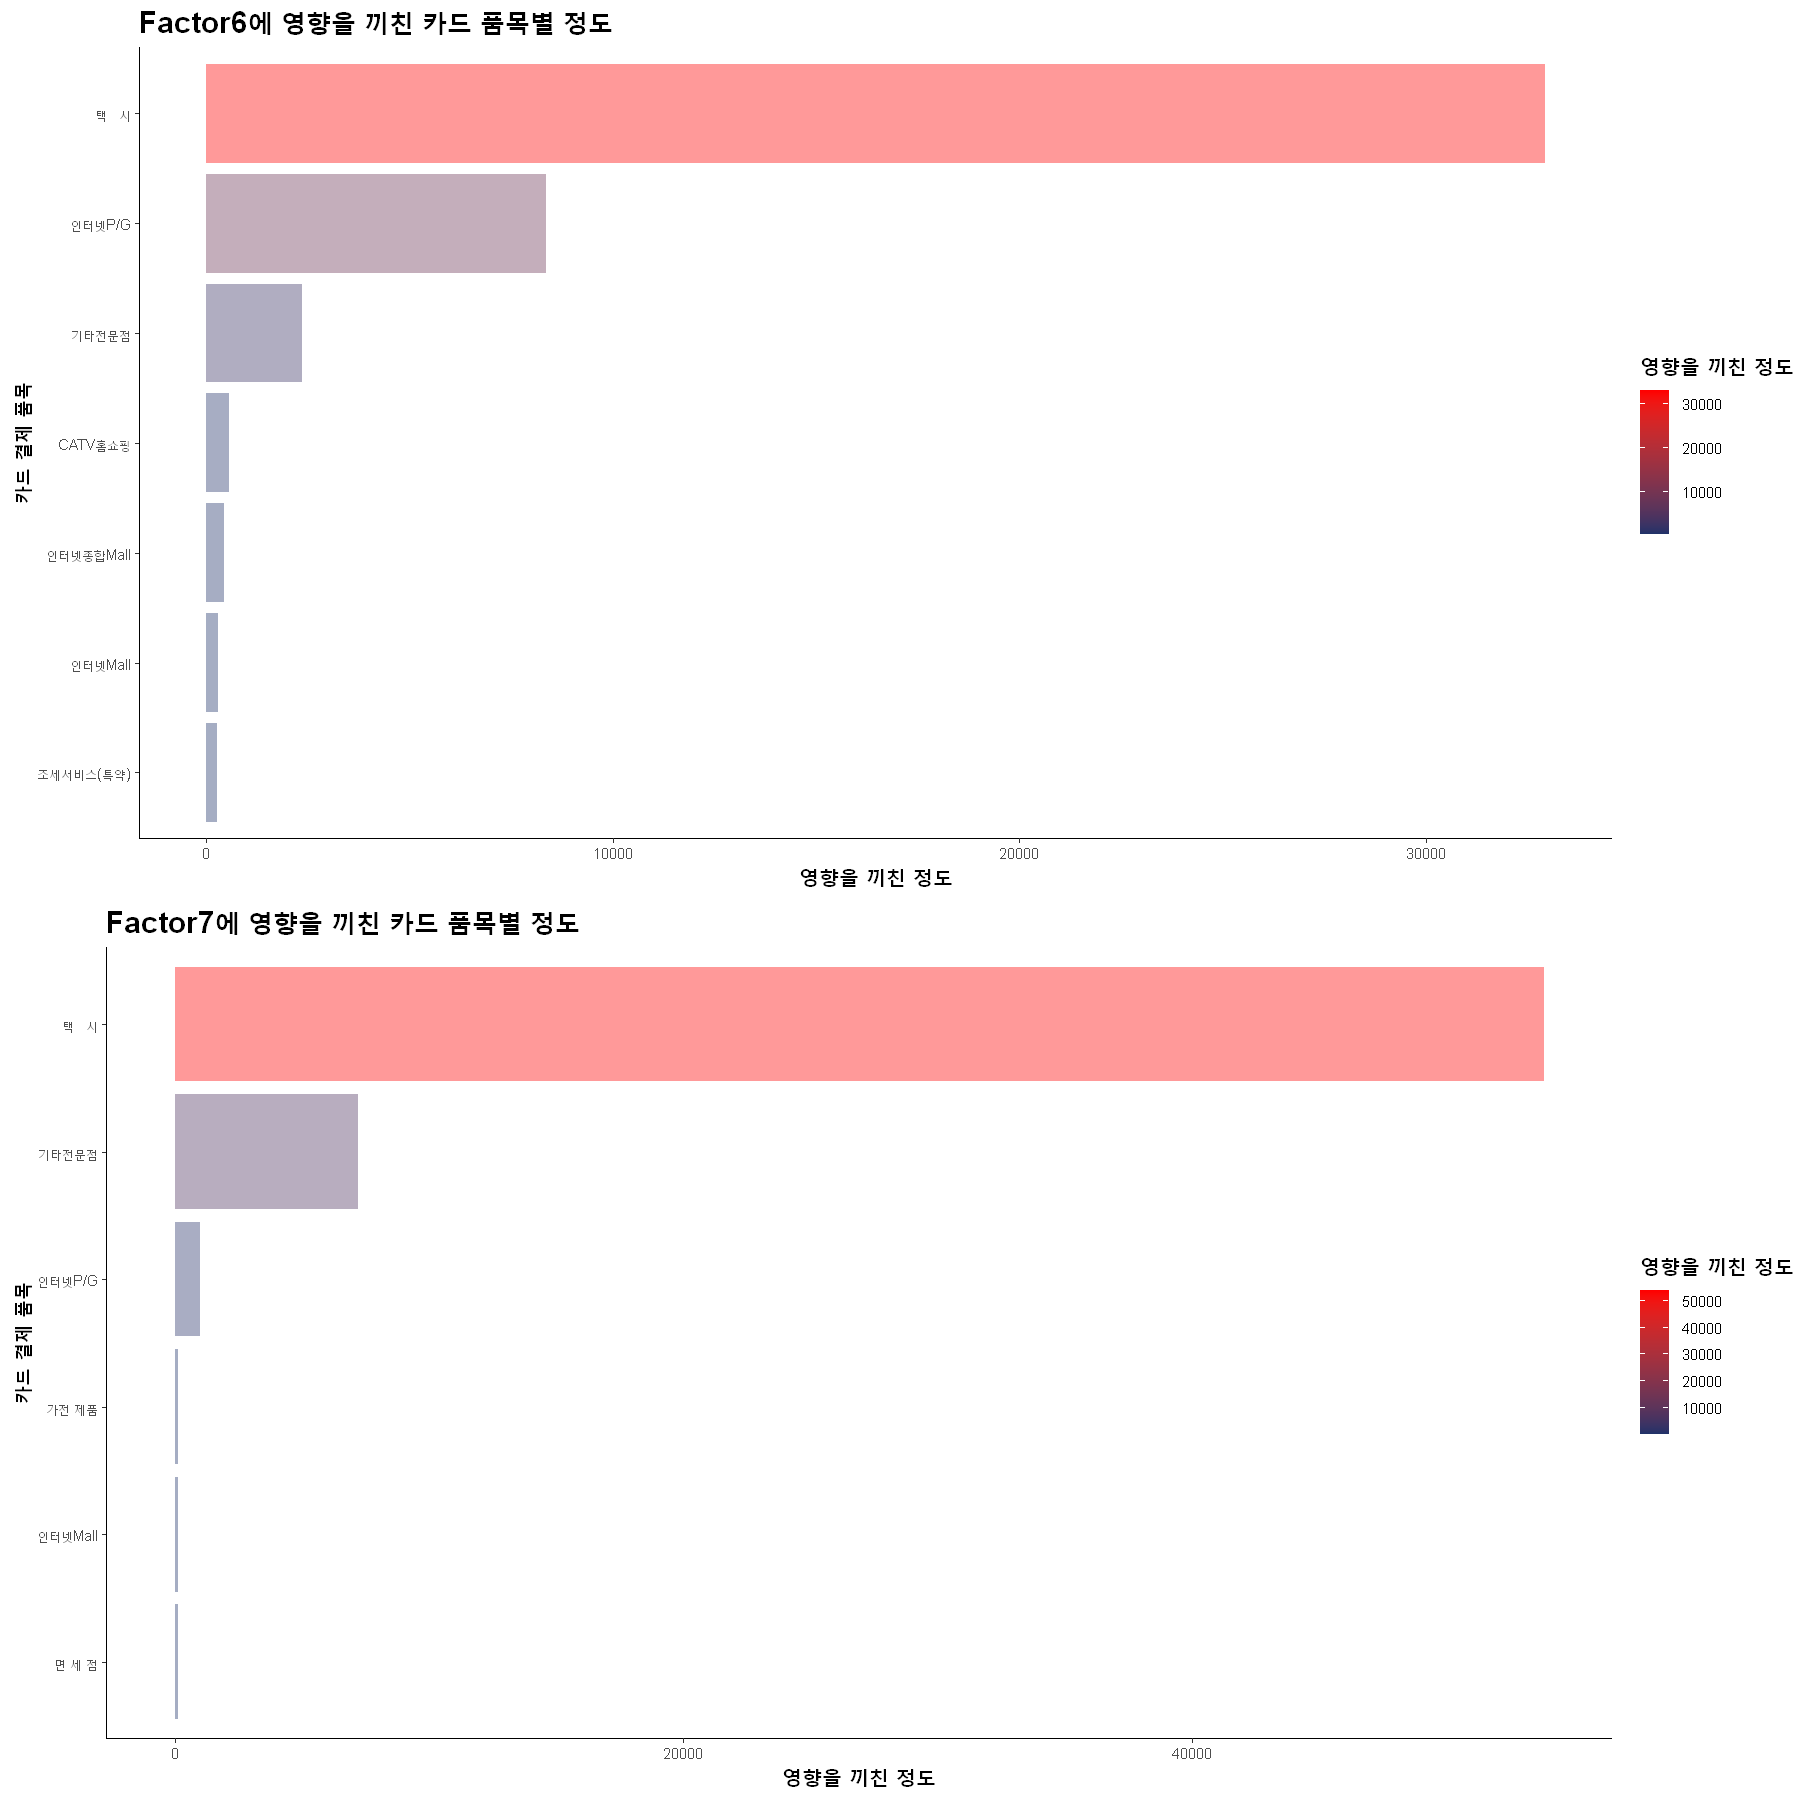

In [271]:

factor_6=card_fa$loadings[,6][which(card_fa$loadings[,6] > 100)] %>% data.frame()  %>% data.frame() # 영향을 100이상 준 애들만
factor_6 = data.frame('name' = row.names(factor_6), 'value' = factor_6[,1]) 
p1 <- factor_6 %>% ggplot(aes(x = reorder(name, value), y = value)) + 
geom_col(aes(fill = value), alpha = 0.4,) + 
scale_fill_gradient('영향을 끼친 정도', low = "#1E3269", high = "red") + 
labs(x = '카드 결제 품목', y = '영향을 끼친 정도') + ggtitle('Factor6에 영향을 끼친 카드 품목별 정도') + 
theme_classic() + theme(title = element_text(size = 15, face = 'bold')) + coord_flip() 


factor_7 = card_fa$loadings[,7][which(card_fa$loadings[,7] > 100)] %>% data.frame() 

factor_7 = data.frame('name' = row.names(factor_7), 'value' = factor_7[,1]) 
p2 <- factor_7 %>% ggplot(aes(x = reorder(name, value), y = value)) + geom_col(aes(fill = value), alpha = 0.4,) + 
scale_fill_gradient('영향을 끼친 정도', low = "#1E3269", high = "red") + labs(x = '카드 결제 품목', y = '영향을 끼친 정도') + 
ggtitle('Factor7에 영향을 끼친 카드 품목별 정도') + theme_classic() + theme(title = element_text(size = 15, face = 'bold')) + 
coord_flip() 
grid.arrange(p1, p2, ncol = 1)


Factor 6 에서는 택시, 인터넷 관련 품목, CATV 홈쇼핑 등 'Untact' 시대를 대변해주는 품목을 확인 할 수 있습니다.

Factor 7 에서도 역시 택시, 인터넷 관련 품목 등을 확인할 수 있습니다.

Factor 7 에서 가전제품 품목 은 사람들의 외출이 적어지면서 인테리어에 조금 관심을 가지게 되었다고 유추 할 수 있습니다.

결론적으로 코로나가 심각해짐에 따라 사람과의 대면이 적은 결제 품목(ex. 택시, 인터넷 관련 품목)들은 매출이 증가했다 고 볼 수 있겠습니다.

기타전문점의 경우 BC카드에서 해당 업종 코드 확인 결과, 기타 품목에 해당하는 것을 확인할 수 있었습니다. 기타라는 범주가 포괄적이라 나타난 결과라고 생각합니다.

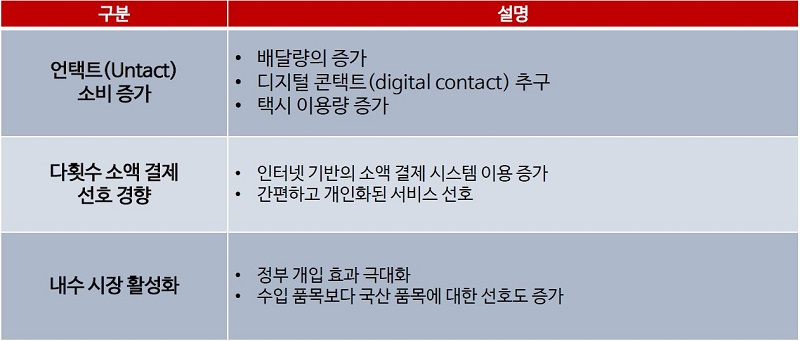

m 첫째로, '언택트(Untact)' 한 소비 경향성입니다. 이는 앞서 정의한 코로나 사태의 시작인 '기' 시기부터 두드러지게 나타나는 특성입니다. '언택트'란 직역하면 '접촉하지 않은' 이라는 뜻으로, 이는 전염성이 강력한 코로나바이러스의 특성상 생활의 모든 부분에서 다수와의 접촉을 꺼리게 된 대중의 행동 패턴을 시사합니다.

 우선, 코로나 사태 이후 배달을 선호하는 경향 이 짙게 드러났습니다. 본론 A에서 살펴보았듯, 코로나 확진자 수가 상대적으로 적었던 지역에 비해 코로나 심각지역(서울, 경기도, 경상북도, 대구)에서 배달 건수의 증가 추세가 눈에 띄게 가파른 것을 볼 수 있었고, 양쪽 모두 기-승-전 의 시기를 거차면서 증가하는 추세를 보였습니다.

 다음으로, 디지털 콘택트(digital contact) 를 추구하는 경향이 짙게 드러났습니다. '디지털 콘택트(digital contact)'는 '언택트(Untact)' 경향의 일종으로, 직접적인 접촉을 피하고 디지털 통신을 이용하여 타인과 접촉하고 생활의 여러 문제를 해결하려는 경향성을 말합니다. 앞서 본론 B에서, 품목 별 소비지수(index)데이터를 FA하여 화장품,건강관리용품,애완동물용품 카테고리의 cgi 변화 추이와 40대의 소비 변화율 추이가 비슷한 특성을 가지고 있다는 인사이트를 얻었습니다. 특히 화장품 산업의 경우 최근 오프라인 매장이 감소하고 온라인 매장이 증가하는 추이를 보이고 있습니다. 화장품 산업은 앞서 정의한 코로나 시기의 '승'단계에서 면세점 수익의 감소로 매출이 크게 떨어지는 경향성을 보였으나, '전'시기 이후로 빠르게 회복하는 모습을 보이고 있습니다. 온라인 매장 수가 급격히 증가하고 있다는 점과, '디지털 콘택트(digital contact)'라는 포스트 코로나 시대의 대표적인 소비 트렌드를 고려했을 때, 온라인 시스템을 기반으로 한 화장품 산업 은 더욱 성장할 전망입니다.

 디지털 콘택트(digital contact)를 추구하는 경향은 업종 별 결제금액 데이터(card)에서도 드러났습니다. 앞서 k-means 클러스터링 기법을 통해 데이터의 군집을 4개의 클러스터로 분류하였습니다. 특히 클러스터 1과 4에서, 인터넷 결제 시스템 과 이동통신 산업 의 경우 포스트 코로나 시기의 유망 산업으로 볼 수 있었는데, 이는 모두 디지털 콘택트(digital contact)를 추구하는 대중의 행동양식을 대변합니다. 또한, 시계열 FA를 통해 잠재요인을 분석한 결과도 마찬가지로 인터넷 기반의 범주들(인터넷 P/G,인터넷 Mall) 과 역시 디지털 통신을 기반으로 하는 'CATV홈쇼핑' 범주가 증가 추세에 큰 영향을 끼친 것으로 보아 디지털 통신 기반의 산업들이 유망할 것으로 예상됩니다.

 언택트(Untact)소비 트렌드에서 또 눈여겨볼만한 것은 택시 산업의 성장 입니다. 업종 별 결제금액 데이터를 클러스터링했을 때, 클러스터4에서 택시 산업이 '승'시기에 평균 매출이 급격히 증가하고, 포스트 코로나로 정의될 수 있는 '전' 시기 이후에 평균 매출은 떨어졌으나 일정한 평균 판매량을 유지하고 있는 것으로 보아, 대중교통을 이용하던 사람들이 다수와의 접촉이 적은 택시를 더 많이 이용하게 되었음을 추론할 수 있습니다. 특히, 시계열 FA결과 증가 추세에 가장 큰 영향을 미친 것이 택시 산업이었습니다. 이를 통해, '언택트(Untact)'키워드로 대표되는 포스트 코로나 시대에 택시와 같은 이동 서비스뿐 아니라 다수와의 접촉을 최소화하는 '개인화' 된 서비스가 유망할 것임 을 추론할 수 있습니다.

 둘째로, 포스트 코로나 시대의 대중은 '다횟수 소액결제' 를 선호하는 경향을 보입니다. 업종 별 결제금액 데이터 클러스터링 결과에서, 클러스터 4에 묶인 '인터넷 P/G'와 '택시'의 특징은 한 번에 결제하는 금액이 크지 않고, 평균 매출이 '전'시기 이후 상대적으로 떨어졌음에도 평균 판매량은 유지하고 있다는 점이었습니다. 이를 통해, 포스트 코로나 시대의 대중은 한 번에 큰 수요를 해결하기보다 그때그때 필요한 수요를 인터넷이나 택시와 같은 간편한 서비스를 이용해 해결하고자 함을 알 수 있었습니다.

 마지막으로, 코로나 19 사태로 내수 시장이 활성화 되었음을 엿볼 수 있었습니다. 이러한 경향성은 업종 별 결제금액 데이터 클러스터링 결과, 클러스터 2에 묶인 품목들에서 두드러지게 드러납니다. 우선, 정부가 소비 시장에 개입하여 경제를 활성화하고자 할 경우 그 효과가 이전보다 상대적으로 극대화된다는 점이 인상적입니다. 클러스터 2의 '국산 신차' 품목이 그 예시입니다. 코로나 19 사태 조기 극복을 위해 정부가 개소세 인하 정책을 추진하자, 국산 신차의 평균 매출이 증가하였습니다. 이는 코로나 19 사태의 조기 극복을 위해 내수 시장을 활성화해야 한다는 인식이 정부뿐 아니라 국민에게 공통됨을 의미합니다. 또한, 농축수산가공품 의 평균 매출 역시 상승하였는데, 코로나 19사태로 소위 '집밥족'이 증가하면서 국산 농산물에 대한 선호도가 높아졌다고 추론할 수 있습니다.

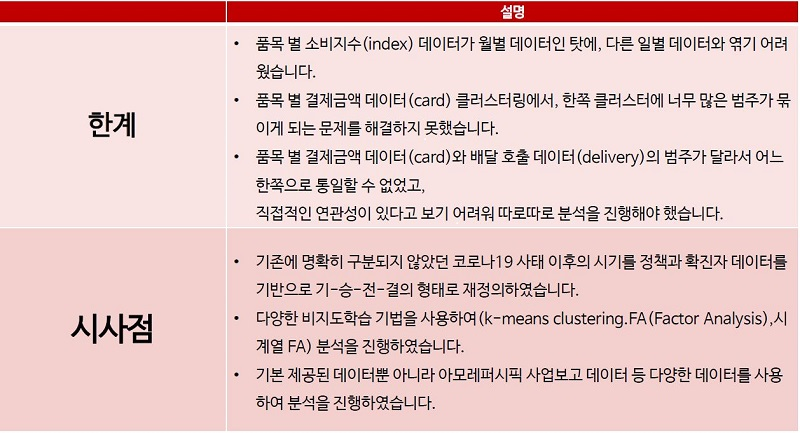

# 맺으며
 코로나19 사태 발발 이후 사회의 많은 부분들이 얼어붙었습니다. 확진자 수가 급격히 증가하던 '승'시기에 국가 경제의 대부분이 침체될 수밖에 없었던 것은 어쩌면 당연한 결과일지도 모릅니다. 현재 우리는 얼어붙은 것들이 서서히 풀리는 '전'시기의 한가운데에 있습니다. 권준옥 중앙방역대책본부 부본부장은 "코로나 19 발생 이전의 세상은 다시 오지 않는다" 며 일상 속에서 생활방역이 습관화되어야 한다고 강조한 바 있습니다. 물론, 앞으로 다가올 포스트 코로나의 모습이 여전히 '전'의 연속일지, 혹은 코로나의 종말, 즉 '결'이 다가올지는 명확하지 않습니다. 어떤 형태이든, 우리는 포스트 코로나 시대의 변화하는 소비패턴을 파악하고 이를 통해 더 나은 삶을 구축하기 위한 노력을 이어가야 할 것입니다.

지금까지 긴 글 읽어주셔서 감사합니다. 투표 부탁드립니다!